# Compare WG Simulated, Precipitation Depth to Data

In [1]:
%matplotlib inline

In [2]:
import os
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as sstats
import datetime as dt
import sqlalchemy
import seaborn as sns

In [3]:
# all months for prism
PRISM_IN_DIR = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochas' \
               r'tic_CC_Recharge\Data\JNotes\Processed\PRISM'
PRISM_JAN_IN = "Jan_WetDays_Grp_1981-2010.pickle"
PRISM_FEB_IN = "Feb_WetDays_Grp_1981-2010.pickle"
PRISM_MAR_IN = "Mar_WetDays_Grp_1981-2010.pickle"
PRISM_APR_IN = "Apr_WetDays_Grp_1981-2010.pickle"
PRISM_MAY_IN = "May_WetDays_Grp_1981-2010.pickle"
PRISM_JUN_IN = "Jun_WetDays_Grp_1981-2010.pickle"
PRISM_JUL_IN = "Jul_WetDays_Grp_1981-2010.pickle"
PRISM_AUG_IN = "Aug_WetDays_Grp_1981-2010.pickle"
PRISM_SEP_IN = "Sep_WetDays_Grp_1981-2010.pickle"
PRISM_OCT_IN = "Oct_WetDays_Grp_1981-2010.pickle"
PRISM_NOV_IN = "Nov_WetDays_Grp_1981-2010.pickle"
PRISM_DEC_IN = "Dec_WetDays_Grp_1981-2010.pickle"
WG_IN_DIR = r'C:\Temp\WG_Test_Out\Test3\Processed'
OUT_DIR = r'C:\Temp\WG_Test_Out\Test3\Processed\Comparison'
OUT_ROOT = "DC_WGMN3"
H0_ROOT = "H0_Data_Depth_G"

In [4]:
LOCA_GRID_MAP = { 137 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 1,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 4,
                          10 : 4,
                          11 : 1,
                          12 : 1,
                        },
                  120 : { 1 : 4,
                          2 : 3,
                          3 : 1,
                          4 : 4,
                          5 : 3,
                          6 : 4,
                          7 : 1,
                          8 : 1,
                          9 : 4,
                          10 : 4,
                          11 : 1,
                          12 : 4,
                        },
                  121 : { 1 : 4,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 1,
                          6 : 4,
                          7 : 1,
                          8 : 1,
                          9 : 4,
                          10 : 4,
                          11 : 1,
                          12 : 4,
                        },
                  122 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 1,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 4,
                          10 : 4,
                          11 : 1,
                          12 : 4,
                        },
                  123 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 1,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 1,
                          10 : 1,
                          11 : 1,
                          12 : 4,
                        },
                  104 : { 1 : 3,
                          2 : 3,
                          3 : 4,
                          4 : 4,
                          5 : 4,
                          6 : 3,
                          7 : 3,
                          8 : 4,
                          9 : 3,
                          10 : 3,
                          11 : 3,
                          12 : 3,
                        },
                  105 : { 1 : 4,
                          2 : 3,
                          3 : 4,
                          4 : 4,
                          5 : 3,
                          6 : 3,
                          7 : 1,
                          8 : 4,
                          9 : 3,
                          10 : 1,
                          11 : 4,
                          12 : 3,
                        },
                  106 : { 1 : 4,
                          2 : 1,
                          3 : 1,
                          4 : 4,
                          5 : 3,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 4,
                          10 : 1,
                          11 : 1,
                          12 : 4,
                        },
                  107 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 3,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 2,
                          10 : 1,
                          11 : 1,
                          12 : 4,
                        },
                  108 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 3,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 2,
                          10 : 1,
                          11 : 1,
                          12 : 4,
                        },
                  90 : { 1 : 3,
                          2 : 3,
                          3 : 4,
                          4 : 4,
                          5 : 4,
                          6 : 3,
                          7 : 3,
                          8 : 4,
                          9 : 3,
                          10 : 3,
                          11 : 3,
                          12 : 3,
                        },
                  91 : { 1 : 4,
                          2 : 3,
                          3 : 1,
                          4 : 4,
                          5 : 3,
                          6 : 3,
                          7 : 1,
                          8 : 4,
                          9 : 3,
                          10 : 1,
                          11 : 4,
                          12 : 3,
                        },
                  92 : { 1 : 4,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 3,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 3,
                          10 : 1,
                          11 : 1,
                          12 : 3,
                        },
                  93 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 3,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 2,
                          10 : 1,
                          11 : 1,
                          12 : 3,
                        },
                  94 : { 1 : 1,
                          2 : 1,
                          3 : 1,
                          4 : 1,
                          5 : 3,
                          6 : 1,
                          7 : 1,
                          8 : 1,
                          9 : 2,
                          10 : 1,
                          11 : 1,
                          12 : 1,
                        },
                  76 : { 1 : 3,
                          2 : 3,
                          3 : 4,
                          4 : 4,
                          5 : 4,
                          6 : 3,
                          7 : 3,
                          8 : 4,
                          9 : 3,
                          10 : 3,
                          11 : 3,
                          12 : 3,
                        },
                  77 : { 1 : 1,
                          2 : 3,
                          3 : 1,
                          4 : 1,
                          5 : 3,
                          6 : 3,
                          7 : 1,
                          8 : 4,
                          9 : 3,
                          10 : 1,
                          11 : 1,
                          12 : 3,
                        },
                  78 : { 1 : 1,
                          2 : 3,
                          3 : 1,
                          4 : 2,
                          5 : 3,
                          6 : 3,
                          7 : 1,
                          8 : 2,
                          9 : 2,
                          10 : 1,
                          11 : 1,
                          12 : 3,
                        },
                  79 : { 1 : 1,
                          2 : 1,
                          3 : 3,
                          4 : 1,
                          5 : 3,
                          6 : 3,
                          7 : 1,
                          8 : 2,
                          9 : 2,
                          10 : 1,
                          11 : 1,
                          12 : 1,
                        },
                  62 : { 1 : 3,
                          2 : 3,
                          3 : 4,
                          4 : 4,
                          5 : 4,
                          6 : 3,
                          7 : 3,
                          8 : 4,
                          9 : 3,
                          10 : 3,
                          11 : 3,
                          12 : 3,
                        },
                  63 : { 1 : 1,
                          2 : 3,
                          3 : 3,
                          4 : 3,
                          5 : 3,
                          6 : 3,
                          7 : 1,
                          8 : 4,
                          9 : 4,
                          10 : 2,
                          11 : 3,
                          12 : 3,
                        },
                  64 : { 1 : 1,
                          2 : 3,
                          3 : 3,
                          4 : 3,
                          5 : 3,
                          6 : 3,
                          7 : 1,
                          8 : 2,
                          9 : 4,
                          10 : 2,
                          11 : 1,
                          12 : 3,
                        },
                 }

In [5]:
LOCA_KEYS = sorted( LOCA_GRID_MAP.keys() )
NUM_LOCA_GRID = len( LOCA_KEYS )

Load all PRISM

In [6]:
InFile = os.path.normpath( os.path.join( PRISM_IN_DIR, PRISM_JAN_IN ) )
PRJanDF = pd.read_pickle( InFile )

In [7]:
InFile = os.path.normpath( os.path.join( PRISM_IN_DIR, PRISM_FEB_IN ) )
PRFebDF = pd.read_pickle( InFile )

In [8]:
InFile = os.path.normpath( os.path.join( PRISM_IN_DIR, PRISM_MAR_IN ) )
PRMarDF = pd.read_pickle( InFile )

In [9]:
InFile = os.path.normpath( os.path.join( PRISM_IN_DIR, PRISM_APR_IN ) )
PRAprDF = pd.read_pickle( InFile )

In [10]:
InFile = os.path.normpath( os.path.join( PRISM_IN_DIR, PRISM_MAY_IN ) )
PRMayDF = pd.read_pickle( InFile )

In [11]:
InFile = os.path.normpath( os.path.join( PRISM_IN_DIR, PRISM_JUN_IN ) )
PRJunDF = pd.read_pickle( InFile )

In [12]:
InFile = os.path.normpath( os.path.join( PRISM_IN_DIR, PRISM_JUL_IN ) )
PRJulDF = pd.read_pickle( InFile )

In [13]:
InFile = os.path.normpath( os.path.join( PRISM_IN_DIR, PRISM_AUG_IN ) )
PRAugDF = pd.read_pickle( InFile )

In [14]:
InFile = os.path.normpath( os.path.join( PRISM_IN_DIR, PRISM_SEP_IN ) )
PRSepDF = pd.read_pickle( InFile )

In [15]:
InFile = os.path.normpath( os.path.join( PRISM_IN_DIR, PRISM_OCT_IN ) )
PROctDF = pd.read_pickle( InFile )

In [16]:
InFile = os.path.normpath( os.path.join( PRISM_IN_DIR, PRISM_NOV_IN ) )
PRNovDF = pd.read_pickle( InFile )

In [17]:
InFile = os.path.normpath( os.path.join( PRISM_IN_DIR, PRISM_DEC_IN ) )
PRDecDF = pd.read_pickle( InFile )

In [18]:
display( HTML( PRJanDF.head().to_html() ))

In [19]:
display( HTML( PRJanDF.describe().to_html() ) )

Next load all grid cells and concatenate from the WG

In [20]:
LOCA_KEYS

[62,
 63,
 64,
 76,
 77,
 78,
 79,
 90,
 91,
 92,
 93,
 94,
 104,
 105,
 106,
 107,
 108,
 120,
 121,
 122,
 123,
 137]

In [21]:
DFDict = dict()

In [22]:
# need to make our month dataframes here
iCnt = 0
for gG in LOCA_KEYS:
    cFile = "%s%d.pickle" % ( H0_ROOT, gG )
    InFP = os.path.normpath( os.path.join( WG_IN_DIR, cFile ) )
    cDF = pd.read_pickle( InFP )
    cDF['Grid_Id'] = gG
    cDF.drop( columns=['Year', 'Day'], inplace=True )
    c1DF = cDF[cDF['Month'] == 1].copy()
    c2DF = cDF[cDF['Month'] == 2].copy()
    c3DF = cDF[cDF['Month'] == 3].copy()
    c4DF = cDF[cDF['Month'] == 4].copy()
    c5DF = cDF[cDF['Month'] == 5].copy()
    c6DF = cDF[cDF['Month'] == 6].copy()
    c7DF = cDF[cDF['Month'] == 7].copy()
    c8DF = cDF[cDF['Month'] == 8].copy()
    c9DF = cDF[cDF['Month'] == 9].copy()
    c10DF = cDF[cDF['Month'] == 10].copy()
    c11DF = cDF[cDF['Month'] == 11].copy()
    c12DF = cDF[cDF['Month'] == 12].copy()
    if iCnt == 0:
        DFDict[1] = [c1DF]
        DFDict[2] = [c2DF]
        DFDict[3] = [c3DF]
        DFDict[4] = [c4DF]
        DFDict[5] = [c5DF]
        DFDict[6] = [c6DF]
        DFDict[7] = [c7DF]
        DFDict[8] = [c8DF]
        DFDict[9] = [c9DF]
        DFDict[10] = [c10DF]
        DFDict[11] = [c11DF]
        DFDict[12] = [c12DF]
    else:
        DFDict[1].append( c1DF )
        DFDict[2].append( c2DF )
        DFDict[3].append( c3DF )
        DFDict[4].append( c4DF )
        DFDict[5].append( c5DF )
        DFDict[6].append( c6DF )
        DFDict[7].append( c7DF )
        DFDict[8].append( c8DF )
        DFDict[9].append( c9DF )
        DFDict[10].append( c10DF )
        DFDict[11].append( c11DF )
        DFDict[12].append( c12DF )
    # end of if
    iCnt += 1
# end of for

Now concatenate

In [23]:
H0JanDF = pd.concat( DFDict[1], ignore_index=True )
H0FebDF = pd.concat( DFDict[2], ignore_index=True )
H0MarDF = pd.concat( DFDict[3], ignore_index=True )
H0AprDF = pd.concat( DFDict[4], ignore_index=True )
H0MayDF = pd.concat( DFDict[5], ignore_index=True )
H0JunDF = pd.concat( DFDict[6], ignore_index=True )
H0JulDF = pd.concat( DFDict[7], ignore_index=True )
H0AugDF = pd.concat( DFDict[8], ignore_index=True )
H0SepDF = pd.concat( DFDict[9], ignore_index=True )
H0OctDF = pd.concat( DFDict[10], ignore_index=True )
H0NovDF = pd.concat( DFDict[11], ignore_index=True )
H0DecDF = pd.concat( DFDict[12], ignore_index=True )

In [24]:
# remove the main dictionary to try to free up some memory
del DFDict

In [25]:
display( HTML( H0JanDF.head().to_html() ) )

In [26]:
display( HTML( H0JanDF.describe().to_html() ) )

Can now drop some columns

In [27]:
PRJanDF.drop( columns=['Grid_Id'], inplace=True )
PRFebDF.drop( columns=['Grid_Id'], inplace=True )
PRMarDF.drop( columns=['Grid_Id'], inplace=True )
PRAprDF.drop( columns=['Grid_Id'], inplace=True )
PRMayDF.drop( columns=['Grid_Id'], inplace=True )
PRJunDF.drop( columns=['Grid_Id'], inplace=True )
PRJulDF.drop( columns=['Grid_Id'], inplace=True )
PRAugDF.drop( columns=['Grid_Id'], inplace=True )
PRSepDF.drop( columns=['Grid_Id'], inplace=True )
PROctDF.drop( columns=['Grid_Id'], inplace=True )
PRNovDF.drop( columns=['Grid_Id'], inplace=True )
PRDecDF.drop( columns=['Grid_Id'], inplace=True )

In [28]:
display(HTML( PRJanDF.head().to_html()))

In [29]:
MonthLister = [ "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", 
                 "Sep", "Oct", "Nov", "Dec" ]
AveLister = list()
VarLister = list()
SkewLister = list()
KurtLister = list()
CntLister = list()
MedianLister = list()
MaxLister = list()
MinLister = list()

In [30]:
OurQList = [ round( 0.01 * x, 2 ) for x in range(100) ]
OurQList.append( 0.995 )
OurQList.append( 0.999 )
OurQList.append( 0.9999 )
OurQList.append( 1.0 )
OurQList[95:]

[0.95, 0.96, 0.97, 0.98, 0.99, 0.995, 0.999, 0.9999, 1.0]

In [31]:
OurQs = np.array( OurQList, dtype=np.float32 )
NumQs = len( OurQs )
NumQs

104

## Full Dataset Quantiles

Need the full dataset quantiles

In [32]:
DataDict = { MonthLister[0] : np.array( H0JanDF['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[1] : np.array( H0FebDF['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[2] : np.array( H0MarDF['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[3] : np.array( H0AprDF['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[4] : np.array( H0MayDF['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[5] : np.array( H0JunDF['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[6] : np.array( H0JulDF['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[7] : np.array( H0AugDF['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[8] : np.array( H0SepDF['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[9] : np.array( H0OctDF['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[10] : np.array( H0NovDF['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[11] : np.array( H0DecDF['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ), }
H0MonthPercsDF = pd.DataFrame( index=OurQs, data=DataDict )

In [33]:
DataDict = { MonthLister[0] : np.array( PRJanDF['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[1] : np.array( PRFebDF['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[2] : np.array( PRMarDF['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[3] : np.array( PRAprDF['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[4] : np.array( PRMayDF['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[5] : np.array( PRJunDF['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[6] : np.array( PRJulDF['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[7] : np.array( PRAugDF['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[8] : np.array( PRSepDF['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[9] : np.array( PROctDF['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[10] : np.array( PRNovDF['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[11] : np.array( PRDecDF['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ), }
PRMonthPercsDF = pd.DataFrame( index=OurQs, data=DataDict )

In [34]:
OutFileFP = os.path.normpath( os.path.join( OUT_DIR, "%s_WG_PDepth_Verification.xlsx" % OUT_ROOT ) )
with pd.ExcelWriter( OutFileFP, engine="openpyxl" ) as writer:
    H0MonthPercsDF.to_excel( writer, sheet_name="H0_ptiles" )
    PRMonthPercsDF.to_excel( writer, sheet_name="PRISM_ptiles" )

## Jan

Need to divide up our input sets into the four regions

In [35]:
MonthInd = 1

In [36]:
# get lists of CMIP5 grid cells for this month
JanR1List = list()
JanR2List = list()
JanR3List = list()
JanR4List = list()
for gG in LOCA_KEYS:
    MonDict = LOCA_GRID_MAP[gG]
    tRegion = MonDict[MonthInd]
    if tRegion == 1:
        JanR1List.append( gG )
    elif tRegion == 2:
        JanR2List.append( gG )
    elif tRegion == 3:
        JanR3List.append( gG )
    elif tRegion == 4:
        JanR4List.append( gG )
#end for

In [37]:
PrJan1 = PRJanDF[PRJanDF['Region_Id'] == 1].copy()
PrJan2 = PRJanDF[PRJanDF['Region_Id'] == 2].copy()
PrJan3 = PRJanDF[PRJanDF['Region_Id'] == 3].copy()
PrJan4 = PRJanDF[PRJanDF['Region_Id'] == 4].copy()

In [38]:
H0Jan1 = H0JanDF[H0JanDF['Grid_Id'].isin(JanR1List)].copy()
H0Jan2 = H0JanDF[H0JanDF['Grid_Id'].isin(JanR2List)].copy()
H0Jan3 = H0JanDF[H0JanDF['Grid_Id'].isin(JanR3List)].copy()
H0Jan4 = H0JanDF[H0JanDF['Grid_Id'].isin(JanR4List)].copy()

In [39]:
len( H0JanDF ), len( H0Jan1 ) + len( H0Jan2 ) + len( H0Jan3 ) + len( H0Jan4 )

(37459884, 37459884)

In [40]:
len( PRJanDF ), len( PrJan1 ) + len( PrJan2 ) + len( PrJan3 ) + len( PrJan4 )

(31710, 31710)

First get our overall tracking values

In [41]:
AveLister.append( [ PRJanDF['Precip_mm'].mean(), H0JanDF['PDepth_mm'].mean(), 
                    PrJan1['Precip_mm'].mean(), H0Jan1['PDepth_mm'].mean(),
                    PrJan2['Precip_mm'].mean(), H0Jan2['PDepth_mm'].mean(),
                    PrJan3['Precip_mm'].mean(), H0Jan3['PDepth_mm'].mean(),
                    PrJan4['Precip_mm'].mean(), H0Jan4['PDepth_mm'].mean() ] )
VarLister.append( [ PRJanDF['Precip_mm'].var(), H0JanDF['PDepth_mm'].var(),
                    PrJan1['Precip_mm'].var(), H0Jan1['PDepth_mm'].var(),
                    PrJan2['Precip_mm'].var(), H0Jan2['PDepth_mm'].var(),
                    PrJan3['Precip_mm'].var(), H0Jan3['PDepth_mm'].var(),
                    PrJan4['Precip_mm'].var(), H0Jan4['PDepth_mm'].var() ] )
SkewLister.append( [ PRJanDF['Precip_mm'].skew(), H0JanDF['PDepth_mm'].skew(),
                    PrJan1['Precip_mm'].skew(), H0Jan1['PDepth_mm'].skew(),
                    PrJan2['Precip_mm'].skew(), H0Jan2['PDepth_mm'].skew(),
                    PrJan3['Precip_mm'].skew(), H0Jan3['PDepth_mm'].skew(),
                    PrJan4['Precip_mm'].skew(), H0Jan4['PDepth_mm'].skew() ] )
KurtLister.append( [ PRJanDF['Precip_mm'].kurtosis(), H0JanDF['PDepth_mm'].kurtosis(),
                    PrJan1['Precip_mm'].kurtosis(), H0Jan1['PDepth_mm'].kurtosis(),
                    PrJan2['Precip_mm'].kurtosis(), H0Jan2['PDepth_mm'].kurtosis(),
                    PrJan3['Precip_mm'].kurtosis(), H0Jan3['PDepth_mm'].kurtosis(),
                    PrJan4['Precip_mm'].kurtosis(), H0Jan4['PDepth_mm'].kurtosis() ] )
CntLister.append( [ PRJanDF['Precip_mm'].count(), H0JanDF['PDepth_mm'].count(), 
                    PrJan1['Precip_mm'].count(), H0Jan1['PDepth_mm'].count(),
                    PrJan2['Precip_mm'].count(), H0Jan2['PDepth_mm'].count(),
                    PrJan3['Precip_mm'].count(), H0Jan3['PDepth_mm'].count(),
                    PrJan4['Precip_mm'].count(), H0Jan4['PDepth_mm'].count() ] )
MedianLister.append( [ PRJanDF['Precip_mm'].median(), H0JanDF['PDepth_mm'].median(), 
                    PrJan1['Precip_mm'].median(), H0Jan1['PDepth_mm'].median(),
                    PrJan2['Precip_mm'].median(), H0Jan2['PDepth_mm'].median(),
                    PrJan3['Precip_mm'].median(), H0Jan3['PDepth_mm'].median(),
                    PrJan4['Precip_mm'].median(), H0Jan4['PDepth_mm'].median() ] )
MaxLister.append( [ PRJanDF['Precip_mm'].max(), H0JanDF['PDepth_mm'].max(), 
                    PrJan1['Precip_mm'].max(), H0Jan1['PDepth_mm'].max(),
                    PrJan2['Precip_mm'].max(), H0Jan2['PDepth_mm'].max(),
                    PrJan3['Precip_mm'].max(), H0Jan3['PDepth_mm'].max(),
                    PrJan4['Precip_mm'].max(), H0Jan4['PDepth_mm'].max() ] )
MinLister.append( [ PRJanDF['Precip_mm'].min(), H0JanDF['PDepth_mm'].min(), 
                    PrJan1['Precip_mm'].min(), H0Jan1['PDepth_mm'].min(),
                    PrJan2['Precip_mm'].min(), H0Jan2['PDepth_mm'].min(),
                    PrJan3['Precip_mm'].min(), H0Jan3['PDepth_mm'].min(),
                    PrJan4['Precip_mm'].min(), H0Jan4['PDepth_mm'].min() ] )

In [42]:
NumPR1 = len( PrJan1 )
NumH01 = len( H0Jan1 )
NumPR1, NumH01

(12996, 20432664)

In [43]:
NumPR2 = len( PrJan2 )
NumH02 = len( H0Jan2 )
NumPR2, NumH02

(4696, 0)

In [44]:
NumPR3 = len( PrJan3 )
NumH03 = len( H0Jan3 )
NumPR3, NumH03

(7766, 6810888)

In [45]:
NumPR4 = len( PrJan4 )
NumH04 = len( H0Jan4 )
NumPR4, NumH04

(6252, 10216332)

In [46]:
CompJan1 = pd.DataFrame( data={ 'PRISM' : np.array( PrJan1['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Jan1['PDepth_mm'].sample(n=NumPR1), 
                                                  dtype=np.int32 ), } )

In [47]:
#CompJan2 = pd.DataFrame( data={ 'PRISM' : np.array( PrJan2['Precip_mm'], dtype=np.int32),
#                                "WG H0" : np.array( H0Jan2['PDepth_mm'].sample(n=NumPR2), 
#                                                  dtype=np.int32 ), } )

In [48]:
CompJan3 = pd.DataFrame( data={ 'PRISM' : np.array( PrJan3['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Jan3['PDepth_mm'].sample(n=NumPR3), 
                                                  dtype=np.int32 ), } )

In [49]:
CompJan4 = pd.DataFrame( data={ 'PRISM' : np.array( PrJan4['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Jan4['PDepth_mm'].sample(n=NumPR4), 
                                                  dtype=np.int32 ), } )

In [50]:
display( HTML( CompJan1.describe().to_html() ) )

In [51]:
#display( HTML( CompJan2.describe().to_html() ) )

In [52]:
display( HTML( CompJan3.describe().to_html() ) )

In [53]:
display( HTML( CompJan4.describe().to_html() ) )

In [54]:
PRQs1 = CompJan1['PRISM'].quantile( q=OurQs )
H0Qs1 = CompJan1['WG H0'].quantile( q=OurQs )

In [55]:
#PRQs2 = CompJan2['PRISM'].quantile( q=OurQs )
#H0Qs2 = CompJan2['WG H0'].quantile( q=OurQs )

In [56]:
PRQs3 = CompJan3['PRISM'].quantile( q=OurQs )
H0Qs3 = CompJan3['WG H0'].quantile( q=OurQs )

In [57]:
PRQs4 = CompJan4['PRISM'].quantile( q=OurQs )
H0Qs4 = CompJan4['WG H0'].quantile( q=OurQs )

### R1 Plots

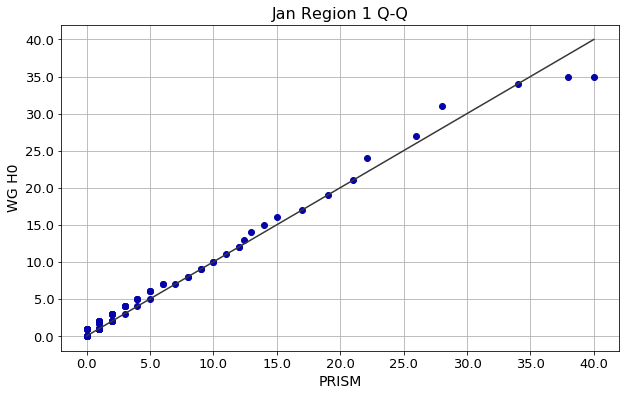

In [58]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs1.values, H0Qs1.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs1.values.max(), H0Qs1.values.max())], 
           [0.0, max( PRQs1.values.max(), H0Qs1.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Jan Region 1 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [59]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

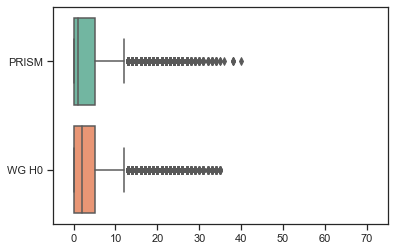

In [60]:
ax = sns.boxplot(data=CompJan1, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [61]:
sns.set(style="white", color_codes=True)

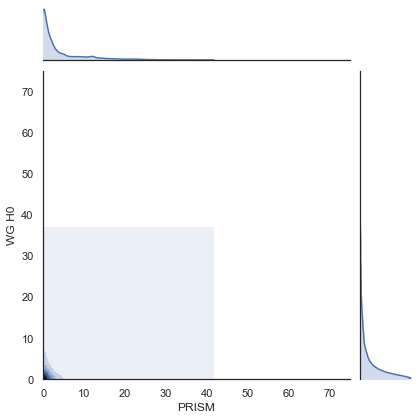

In [62]:
JanG1 = sns.jointplot(x='PRISM', y='WG H0', data=CompJan1, kind="kde", xlim=(0,75), ylim=(0,75))

### R2 Plots

### R3 Plots

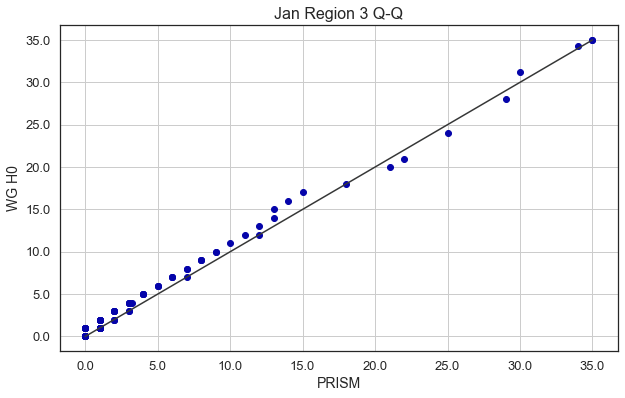

In [63]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs3.values, H0Qs3.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs3.values.max(), H0Qs3.values.max())], 
           [0.0, max( PRQs3.values.max(), H0Qs3.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Jan Region 3 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [64]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

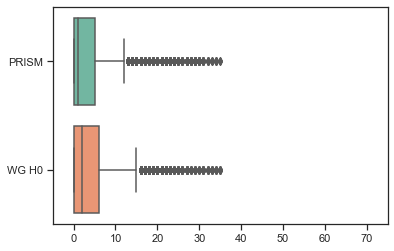

In [65]:
ax = sns.boxplot(data=CompJan3, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [66]:
sns.set(style="white", color_codes=True)

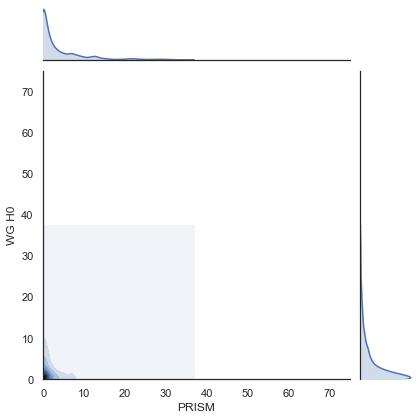

In [67]:
JanG3 = sns.jointplot(x='PRISM', y='WG H0', data=CompJan3, kind="kde", xlim=(0,75), ylim=(0,75))

### R4 Plots

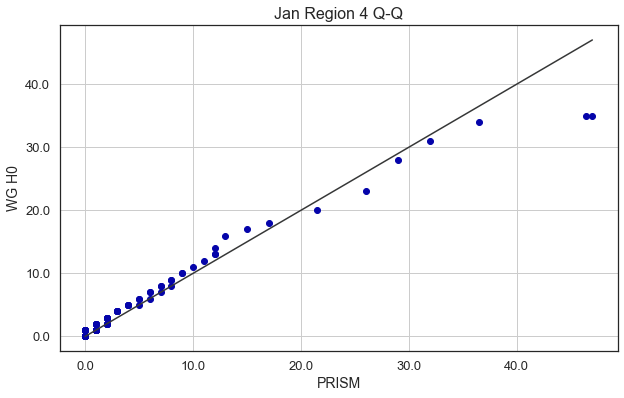

In [68]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs4.values, H0Qs4.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs4.values.max(), H0Qs4.values.max())], 
           [0.0, max( PRQs4.values.max(), H0Qs4.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Jan Region 4 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [69]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

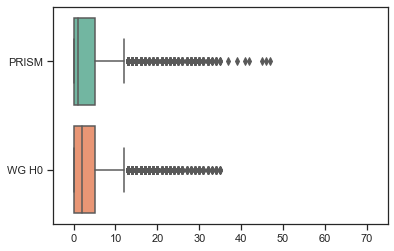

In [70]:
ax = sns.boxplot(data=CompJan4, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [71]:
sns.set(style="white", color_codes=True)

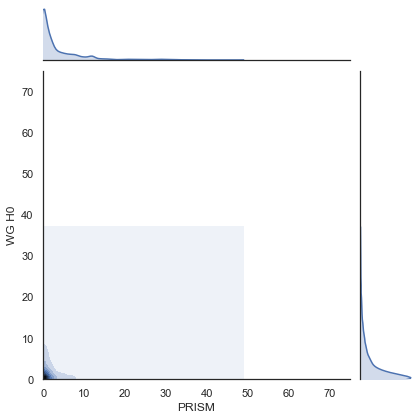

In [72]:
JanG4 = sns.jointplot(x='PRISM', y='WG H0', data=CompJan4, kind="kde", xlim=(0,75), ylim=(0,75))

## Feb

In [73]:
MonthInd = 2

In [74]:
# get lists of CMIP5 grid cells for this month
FebR1List = list()
FebR2List = list()
FebR3List = list()
FebR4List = list()
for gG in LOCA_KEYS:
    MonDict = LOCA_GRID_MAP[gG]
    tRegion = MonDict[MonthInd]
    if tRegion == 1:
        FebR1List.append( gG )
    elif tRegion == 2:
        FebR2List.append( gG )
    elif tRegion == 3:
        FebR3List.append( gG )
    elif tRegion == 4:
        FebR4List.append( gG )
#end for

In [75]:
PrFeb1 = PRFebDF[PRFebDF['Region_Id'] == 1].copy()
PrFeb2 = PRFebDF[PRFebDF['Region_Id'] == 2].copy()
PrFeb3 = PRFebDF[PRFebDF['Region_Id'] == 3].copy()
PrFeb4 = PRFebDF[PRFebDF['Region_Id'] == 4].copy()

In [76]:
H0Feb1 = H0FebDF[H0FebDF['Grid_Id'].isin(FebR1List)].copy()
H0Feb2 = H0FebDF[H0FebDF['Grid_Id'].isin(FebR2List)].copy()
H0Feb3 = H0FebDF[H0FebDF['Grid_Id'].isin(FebR3List)].copy()
H0Feb4 = H0FebDF[H0FebDF['Grid_Id'].isin(FebR4List)].copy()

In [77]:
len( H0FebDF ), len( H0Feb1 ) + len( H0Feb2 ) + len( H0Feb3 ) + len( H0Feb4 )

(37357914, 37357914)

In [78]:
len( PRFebDF ), len( PrFeb1 ) + len( PrFeb2 ) + len( PrFeb3 ) + len( PrFeb4 )

(31218, 31218)

First get our overall tracking values

In [79]:
AveLister.append( [ PRFebDF['Precip_mm'].mean(), H0FebDF['PDepth_mm'].mean(), 
                    PrFeb1['Precip_mm'].mean(), H0Feb1['PDepth_mm'].mean(),
                    PrFeb2['Precip_mm'].mean(), H0Feb2['PDepth_mm'].mean(),
                    PrFeb3['Precip_mm'].mean(), H0Feb3['PDepth_mm'].mean(),
                    PrFeb4['Precip_mm'].mean(), H0Feb4['PDepth_mm'].mean() ] )
VarLister.append( [ PRFebDF['Precip_mm'].var(), H0FebDF['PDepth_mm'].var(),
                    PrFeb1['Precip_mm'].var(), H0Feb1['PDepth_mm'].var(),
                    PrFeb2['Precip_mm'].var(), H0Feb2['PDepth_mm'].var(),
                    PrFeb3['Precip_mm'].var(), H0Feb3['PDepth_mm'].var(),
                    PrFeb4['Precip_mm'].var(), H0Feb4['PDepth_mm'].var() ] )
SkewLister.append( [ PRFebDF['Precip_mm'].skew(), H0FebDF['PDepth_mm'].skew(),
                    PrFeb1['Precip_mm'].skew(), H0Feb1['PDepth_mm'].skew(),
                    PrFeb2['Precip_mm'].skew(), H0Feb2['PDepth_mm'].skew(),
                    PrFeb3['Precip_mm'].skew(), H0Feb3['PDepth_mm'].skew(),
                    PrFeb4['Precip_mm'].skew(), H0Feb4['PDepth_mm'].skew() ] )
KurtLister.append( [ PRFebDF['Precip_mm'].kurtosis(), H0FebDF['PDepth_mm'].kurtosis(),
                    PrFeb1['Precip_mm'].kurtosis(), H0Feb1['PDepth_mm'].kurtosis(),
                    PrFeb2['Precip_mm'].kurtosis(), H0Feb2['PDepth_mm'].kurtosis(),
                    PrFeb3['Precip_mm'].kurtosis(), H0Feb3['PDepth_mm'].kurtosis(),
                    PrFeb4['Precip_mm'].kurtosis(), H0Feb4['PDepth_mm'].kurtosis() ] )
CntLister.append( [ PRFebDF['Precip_mm'].count(), H0FebDF['PDepth_mm'].count(), 
                    PrFeb1['Precip_mm'].count(), H0Feb1['PDepth_mm'].count(),
                    PrFeb2['Precip_mm'].count(), H0Feb2['PDepth_mm'].count(),
                    PrFeb3['Precip_mm'].count(), H0Feb3['PDepth_mm'].count(),
                    PrFeb4['Precip_mm'].count(), H0Feb4['PDepth_mm'].count() ] )
MedianLister.append( [ PRFebDF['Precip_mm'].median(), H0FebDF['PDepth_mm'].median(), 
                    PrFeb1['Precip_mm'].median(), H0Feb1['PDepth_mm'].median(),
                    PrFeb2['Precip_mm'].median(), H0Feb2['PDepth_mm'].median(),
                    PrFeb3['Precip_mm'].median(), H0Feb3['PDepth_mm'].median(),
                    PrFeb4['Precip_mm'].median(), H0Feb4['PDepth_mm'].median() ] )
MaxLister.append( [ PRFebDF['Precip_mm'].max(), H0FebDF['PDepth_mm'].max(), 
                    PrFeb1['Precip_mm'].max(), H0Feb1['PDepth_mm'].max(),
                    PrFeb2['Precip_mm'].max(), H0Feb2['PDepth_mm'].max(),
                    PrFeb3['Precip_mm'].max(), H0Feb3['PDepth_mm'].max(),
                    PrFeb4['Precip_mm'].max(), H0Feb4['PDepth_mm'].max() ] )
MinLister.append( [ PRFebDF['Precip_mm'].min(), H0FebDF['PDepth_mm'].min(), 
                    PrFeb1['Precip_mm'].min(), H0Feb1['PDepth_mm'].min(),
                    PrFeb2['Precip_mm'].min(), H0Feb2['PDepth_mm'].min(),
                    PrFeb3['Precip_mm'].min(), H0Feb3['PDepth_mm'].min(),
                    PrFeb4['Precip_mm'].min(), H0Feb4['PDepth_mm'].min() ] )

In [80]:
NumPR1 = len( PrFeb1 )
NumH01 = len( H0Feb1 )
NumPR1, NumH01

(13239, 18678957)

In [81]:
NumPR2 = len( PrFeb2 )
NumH02 = len( H0Feb2 )
NumPR2, NumH02

(3996, 0)

In [82]:
NumPR3 = len( PrFeb3 )
NumH03 = len( H0Feb3 )
NumPR3, NumH03

(12963, 18678957)

In [83]:
NumPR4 = len( PrFeb4 )
NumH04 = len( H0Feb4 )
NumPR4, NumH04

(1020, 0)

In [84]:
CompFeb1 = pd.DataFrame( data={ 'PRISM' : np.array( PrFeb1['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Feb1['PDepth_mm'].sample(n=NumPR1), 
                                                  dtype=np.int32 ), } )

In [85]:
#CompFeb2 = pd.DataFrame( data={ 'PRISM' : np.array( PrFeb2['Precip_mm'], dtype=np.int32),
#                                "WG H0" : np.array( H0Feb2['PDepth_mm'].sample(n=NumPR2), 
#                                                  dtype=np.int32 ), } )

In [86]:
CompFeb3 = pd.DataFrame( data={ 'PRISM' : np.array( PrFeb3['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Feb3['PDepth_mm'].sample(n=NumPR3), 
                                                  dtype=np.int32 ), } )

In [87]:
#CompFeb4 = pd.DataFrame( data={ 'PRISM' : np.array( PrFeb4['Precip_mm'], dtype=np.int32),
#                                "WG H0" : np.array( H0Feb4['PDepth_mm'].sample(n=NumPR4), 
#                                                  dtype=np.int32 ), } )

In [88]:
display( HTML( CompFeb1.describe().to_html() ) )

In [89]:
#display( HTML( CompFeb2.describe().to_html() ) )

In [90]:
display( HTML( CompFeb3.describe().to_html() ) )

In [91]:
#display( HTML( CompFeb4.describe().to_html() ) )

In [92]:
PRQs1 = CompFeb1['PRISM'].quantile( q=OurQs )
H0Qs1 = CompFeb1['WG H0'].quantile( q=OurQs )

In [93]:
#PRQs2 = CompFeb2['PRISM'].quantile( q=OurQs )
#H0Qs2 = CompFeb2['WG H0'].quantile( q=OurQs )

In [94]:
PRQs3 = CompFeb3['PRISM'].quantile( q=OurQs )
H0Qs3 = CompFeb3['WG H0'].quantile( q=OurQs )

In [95]:
#PRQs4 = CompFeb4['PRISM'].quantile( q=OurQs )
#H0Qs4 = CompFeb4['WG H0'].quantile( q=OurQs )

### R1 Plots

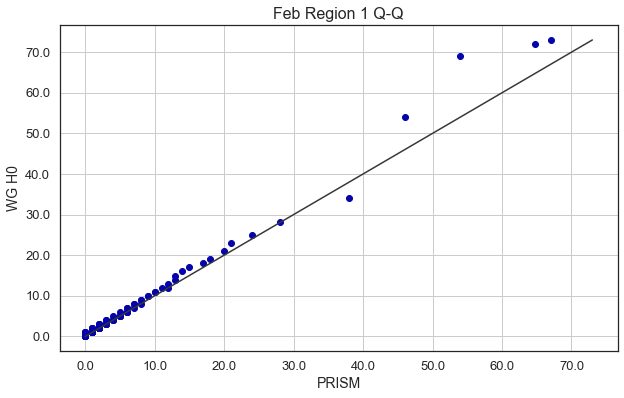

In [96]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs1.values, H0Qs1.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs1.values.max(), H0Qs1.values.max())], 
           [0.0, max( PRQs1.values.max(), H0Qs1.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Feb Region 1 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [97]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

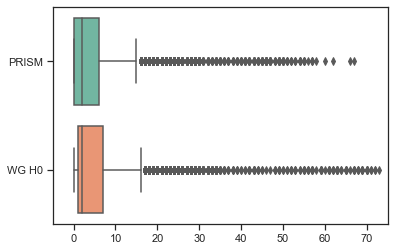

In [98]:
ax = sns.boxplot(data=CompFeb1, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [99]:
sns.set(style="white", color_codes=True)

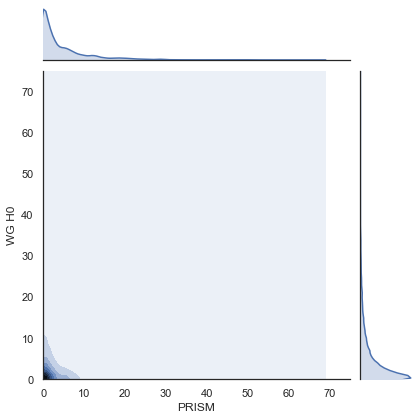

In [100]:
FebG1 = sns.jointplot(x='PRISM', y='WG H0', data=CompFeb1, kind="kde", xlim=(0,75), ylim=(0,75))

### R2 Plots

### R3 Plots

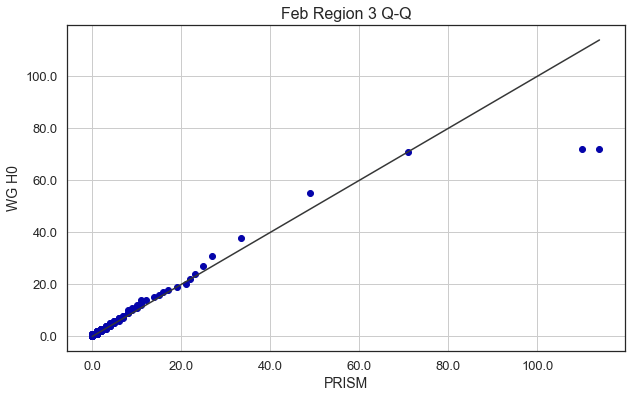

In [101]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs3.values, H0Qs3.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs3.values.max(), H0Qs3.values.max())], 
           [0.0, max( PRQs3.values.max(), H0Qs3.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Feb Region 3 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [102]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

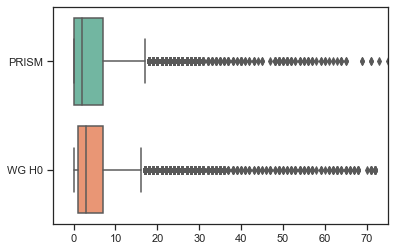

In [103]:
ax = sns.boxplot(data=CompFeb3, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [104]:
sns.set(style="white", color_codes=True)

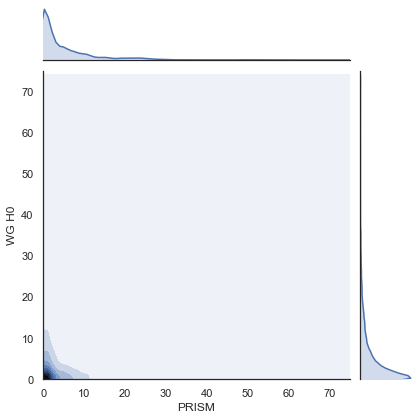

In [105]:
FebG3 = sns.jointplot(x='PRISM', y='WG H0', data=CompFeb3, kind="kde", xlim=(0,75), ylim=(0,75))

### R4 Plots

## Mar

In [106]:
MonthInd = 3

In [107]:
# get lists of CMIP5 grid cells for this month
MarR1List = list()
MarR2List = list()
MarR3List = list()
MarR4List = list()
for gG in LOCA_KEYS:
    MonDict = LOCA_GRID_MAP[gG]
    tRegion = MonDict[MonthInd]
    if tRegion == 1:
        MarR1List.append( gG )
    elif tRegion == 2:
        MarR2List.append( gG )
    elif tRegion == 3:
        MarR3List.append( gG )
    elif tRegion == 4:
        MarR4List.append( gG )
#end for

In [108]:
PrMar1 = PRMarDF[PRMarDF['Region_Id'] == 1].copy()
PrMar2 = PRMarDF[PRMarDF['Region_Id'] == 2].copy()
PrMar3 = PRMarDF[PRMarDF['Region_Id'] == 3].copy()
PrMar4 = PRMarDF[PRMarDF['Region_Id'] == 4].copy()

In [109]:
H0Mar1 = H0MarDF[H0MarDF['Grid_Id'].isin(MarR1List)].copy()
H0Mar2 = H0MarDF[H0MarDF['Grid_Id'].isin(MarR2List)].copy()
H0Mar3 = H0MarDF[H0MarDF['Grid_Id'].isin(MarR3List)].copy()
H0Mar4 = H0MarDF[H0MarDF['Grid_Id'].isin(MarR4List)].copy()

In [110]:
len( H0MarDF ), len( H0Mar1 ) + len( H0Mar2 ) + len( H0Mar3 ) + len( H0Mar4 )

(40911904, 40911904)

In [111]:
len( PRMarDF ), len( PrMar1 ) + len( PrMar2 ) + len( PrMar3 ) + len( PrMar4 )

(36839, 36839)

First get our overall tracking values

In [112]:
AveLister.append( [ PRMarDF['Precip_mm'].mean(), H0MarDF['PDepth_mm'].mean(), 
                    PrMar1['Precip_mm'].mean(), H0Mar1['PDepth_mm'].mean(),
                    PrMar2['Precip_mm'].mean(), H0Mar2['PDepth_mm'].mean(),
                    PrMar3['Precip_mm'].mean(), H0Mar3['PDepth_mm'].mean(),
                    PrMar4['Precip_mm'].mean(), H0Mar4['PDepth_mm'].mean() ] )
VarLister.append( [ PRMarDF['Precip_mm'].var(), H0MarDF['PDepth_mm'].var(),
                    PrMar1['Precip_mm'].var(), H0Mar1['PDepth_mm'].var(),
                    PrMar2['Precip_mm'].var(), H0Mar2['PDepth_mm'].var(),
                    PrMar3['Precip_mm'].var(), H0Mar3['PDepth_mm'].var(),
                    PrMar4['Precip_mm'].var(), H0Mar4['PDepth_mm'].var() ] )
SkewLister.append( [ PRMarDF['Precip_mm'].skew(), H0MarDF['PDepth_mm'].skew(),
                    PrMar1['Precip_mm'].skew(), H0Mar1['PDepth_mm'].skew(),
                    PrMar2['Precip_mm'].skew(), H0Mar2['PDepth_mm'].skew(),
                    PrMar3['Precip_mm'].skew(), H0Mar3['PDepth_mm'].skew(),
                    PrMar4['Precip_mm'].skew(), H0Mar4['PDepth_mm'].skew() ] )
KurtLister.append( [ PRMarDF['Precip_mm'].kurtosis(), H0MarDF['PDepth_mm'].kurtosis(),
                    PrMar1['Precip_mm'].kurtosis(), H0Mar1['PDepth_mm'].kurtosis(),
                    PrMar2['Precip_mm'].kurtosis(), H0Mar2['PDepth_mm'].kurtosis(),
                    PrMar3['Precip_mm'].kurtosis(), H0Mar3['PDepth_mm'].kurtosis(),
                    PrMar4['Precip_mm'].kurtosis(), H0Mar4['PDepth_mm'].kurtosis() ] )
CntLister.append( [ PRMarDF['Precip_mm'].count(), H0MarDF['PDepth_mm'].count(), 
                    PrMar1['Precip_mm'].count(), H0Mar1['PDepth_mm'].count(),
                    PrMar2['Precip_mm'].count(), H0Mar2['PDepth_mm'].count(),
                    PrMar3['Precip_mm'].count(), H0Mar3['PDepth_mm'].count(),
                    PrMar4['Precip_mm'].count(), H0Mar4['PDepth_mm'].count() ] )
MedianLister.append( [ PRMarDF['Precip_mm'].median(), H0MarDF['PDepth_mm'].median(), 
                    PrMar1['Precip_mm'].median(), H0Mar1['PDepth_mm'].median(),
                    PrMar2['Precip_mm'].median(), H0Mar2['PDepth_mm'].median(),
                    PrMar3['Precip_mm'].median(), H0Mar3['PDepth_mm'].median(),
                    PrMar4['Precip_mm'].median(), H0Mar4['PDepth_mm'].median() ] )
MaxLister.append( [ PRMarDF['Precip_mm'].max(), H0MarDF['PDepth_mm'].max(), 
                    PrMar1['Precip_mm'].max(), H0Mar1['PDepth_mm'].max(),
                    PrMar2['Precip_mm'].max(), H0Mar2['PDepth_mm'].max(),
                    PrMar3['Precip_mm'].max(), H0Mar3['PDepth_mm'].max(),
                    PrMar4['Precip_mm'].max(), H0Mar4['PDepth_mm'].max() ] )
MinLister.append( [ PRMarDF['Precip_mm'].min(), H0MarDF['PDepth_mm'].min(), 
                    PrMar1['Precip_mm'].min(), H0Mar1['PDepth_mm'].min(),
                    PrMar2['Precip_mm'].min(), H0Mar2['PDepth_mm'].min(),
                    PrMar3['Precip_mm'].min(), H0Mar3['PDepth_mm'].min(),
                    PrMar4['Precip_mm'].min(), H0Mar4['PDepth_mm'].min() ] )

In [113]:
NumPR1 = len( PrMar1 )
NumH01 = len( H0Mar1 )
NumPR1, NumH01

(15974, 26034848)

In [114]:
NumPR2 = len( PrMar2 )
NumH02 = len( H0Mar2 )
NumPR2, NumH02

(5544, 0)

In [115]:
NumPR3 = len( PrMar3 )
NumH03 = len( H0Mar3 )
NumPR3, NumH03

(5525, 5578896)

In [116]:
NumPR4 = len( PrMar4 )
NumH04 = len( H0Mar4 )
NumPR4, NumH04

(9796, 9298160)

In [117]:
CompMar1 = pd.DataFrame( data={ 'PRISM' : np.array( PrMar1['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Mar1['PDepth_mm'].sample(n=NumPR1), 
                                                  dtype=np.int32 ), } )

In [118]:
#CompMar2 = pd.DataFrame( data={ 'PRISM' : np.array( PrMar2['Precip_mm'], dtype=np.int32),
#                                "WG H0" : np.array( H0Mar2['PDepth_mm'].sample(n=NumPR2), 
#                                                  dtype=np.int32 ), } )

In [119]:
CompMar3 = pd.DataFrame( data={ 'PRISM' : np.array( PrMar3['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Mar3['PDepth_mm'].sample(n=NumPR3), 
                                                  dtype=np.int32 ), } )

In [120]:
CompMar4 = pd.DataFrame( data={ 'PRISM' : np.array( PrMar4['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Mar4['PDepth_mm'].sample(n=NumPR4), 
                                                  dtype=np.int32 ), } )

In [121]:
display( HTML( CompMar1.describe().to_html() ) )

In [122]:
#display( HTML( CompMar2.describe().to_html() ) )

In [123]:
display( HTML( CompMar3.describe().to_html() ) )

In [124]:
display( HTML( CompMar4.describe().to_html() ) )

In [125]:
PRQs1 = CompMar1['PRISM'].quantile( q=OurQs )
H0Qs1 = CompMar1['WG H0'].quantile( q=OurQs )

In [126]:
#PRQs2 = CompMar2['PRISM'].quantile( q=OurQs )
#H0Qs2 = CompMar2['WG H0'].quantile( q=OurQs )

In [127]:
PRQs3 = CompMar3['PRISM'].quantile( q=OurQs )
H0Qs3 = CompMar3['WG H0'].quantile( q=OurQs )

In [128]:
PRQs4 = CompMar4['PRISM'].quantile( q=OurQs )
H0Qs4 = CompMar4['WG H0'].quantile( q=OurQs )

### R1 Plots

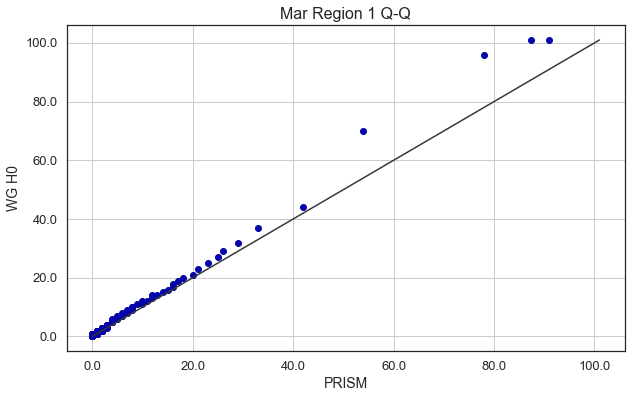

In [129]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs1.values, H0Qs1.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs1.values.max(), H0Qs1.values.max())], 
           [0.0, max( PRQs1.values.max(), H0Qs1.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Mar Region 1 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [130]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

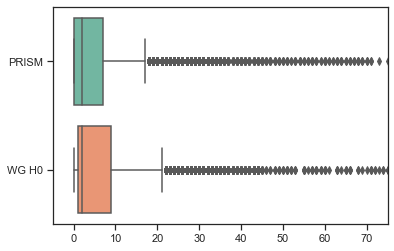

In [131]:
ax = sns.boxplot(data=CompMar1, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [132]:
sns.set(style="white", color_codes=True)

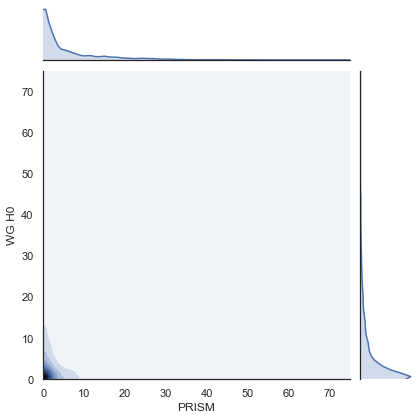

In [133]:
MarG1 = sns.jointplot(x='PRISM', y='WG H0', data=CompMar1, kind="kde", xlim=(0,75), ylim=(0,75))

### R2 Plots

### R3 Plots

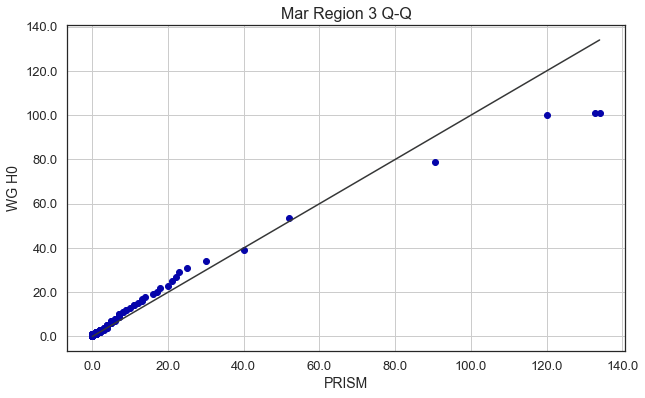

In [134]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs3.values, H0Qs3.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs3.values.max(), H0Qs3.values.max())], 
           [0.0, max( PRQs3.values.max(), H0Qs3.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Mar Region 3 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [135]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

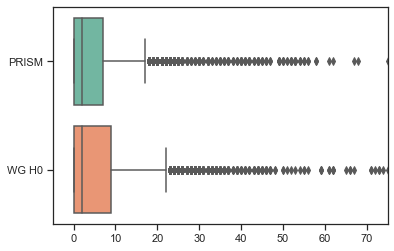

In [136]:
ax = sns.boxplot(data=CompMar3, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [137]:
sns.set(style="white", color_codes=True)

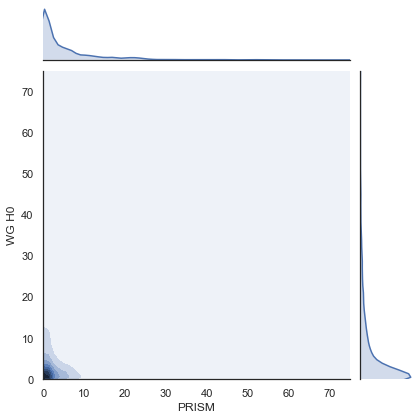

In [138]:
MarG3 = sns.jointplot(x='PRISM', y='WG H0', data=CompMar3, kind="kde", xlim=(0,75), ylim=(0,75))

### R4 Plots

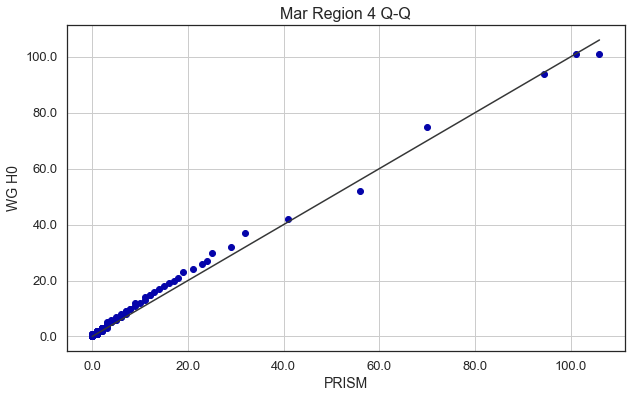

In [139]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs4.values, H0Qs4.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs4.values.max(), H0Qs4.values.max())], 
           [0.0, max( PRQs4.values.max(), H0Qs4.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Mar Region 4 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [140]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

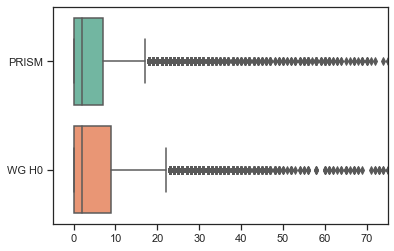

In [141]:
ax = sns.boxplot(data=CompMar4, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [142]:
sns.set(style="white", color_codes=True)

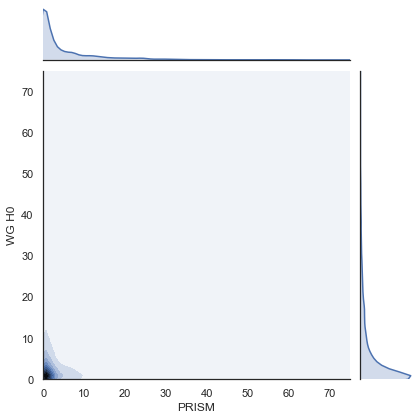

In [143]:
MarG4 = sns.jointplot(x='PRISM', y='WG H0', data=CompMar4, kind="kde", xlim=(0,75), ylim=(0,75))

## Apr

In [144]:
MonthInd = 4

In [145]:
# get lists of CMIP5 grid cells for this month
AprR1List = list()
AprR2List = list()
AprR3List = list()
AprR4List = list()
for gG in LOCA_KEYS:
    MonDict = LOCA_GRID_MAP[gG]
    tRegion = MonDict[MonthInd]
    if tRegion == 1:
        AprR1List.append( gG )
    elif tRegion == 2:
        AprR2List.append( gG )
    elif tRegion == 3:
        AprR3List.append( gG )
    elif tRegion == 4:
        AprR4List.append( gG )
#end for

In [146]:
PrApr1 = PRAprDF[PRAprDF['Region_Id'] == 1].copy()
PrApr2 = PRAprDF[PRAprDF['Region_Id'] == 2].copy()
PrApr3 = PRAprDF[PRAprDF['Region_Id'] == 3].copy()
PrApr4 = PRAprDF[PRAprDF['Region_Id'] == 4].copy()

In [147]:
H0Apr1 = H0AprDF[H0AprDF['Grid_Id'].isin(AprR1List)].copy()
H0Apr2 = H0AprDF[H0AprDF['Grid_Id'].isin(AprR2List)].copy()
H0Apr3 = H0AprDF[H0AprDF['Grid_Id'].isin(AprR3List)].copy()
H0Apr4 = H0AprDF[H0AprDF['Grid_Id'].isin(AprR4List)].copy()

In [148]:
len( H0AprDF ), len( H0Apr1 ) + len( H0Apr2 ) + len( H0Apr3 ) + len( H0Apr4 )

(41449738, 41449738)

In [149]:
len( PRAprDF ), len( PrApr1 ) + len( PrApr2 ) + len( PrApr3 ) + len( PrApr4 )

(32742, 32742)

First get our overall tracking values

In [150]:
AveLister.append( [ PRAprDF['Precip_mm'].mean(), H0AprDF['PDepth_mm'].mean(), 
                    PrApr1['Precip_mm'].mean(), H0Apr1['PDepth_mm'].mean(),
                    PrApr2['Precip_mm'].mean(), H0Apr2['PDepth_mm'].mean(),
                    PrApr3['Precip_mm'].mean(), H0Apr3['PDepth_mm'].mean(),
                    PrApr4['Precip_mm'].mean(), H0Apr4['PDepth_mm'].mean() ] )
VarLister.append( [ PRAprDF['Precip_mm'].var(), H0AprDF['PDepth_mm'].var(),
                    PrApr1['Precip_mm'].var(), H0Apr1['PDepth_mm'].var(),
                    PrApr2['Precip_mm'].var(), H0Apr2['PDepth_mm'].var(),
                    PrApr3['Precip_mm'].var(), H0Apr3['PDepth_mm'].var(),
                    PrApr4['Precip_mm'].var(), H0Apr4['PDepth_mm'].var() ] )
SkewLister.append( [ PRAprDF['Precip_mm'].skew(), H0AprDF['PDepth_mm'].skew(),
                    PrApr1['Precip_mm'].skew(), H0Apr1['PDepth_mm'].skew(),
                    PrApr2['Precip_mm'].skew(), H0Apr2['PDepth_mm'].skew(),
                    PrApr3['Precip_mm'].skew(), H0Apr3['PDepth_mm'].skew(),
                    PrApr4['Precip_mm'].skew(), H0Apr4['PDepth_mm'].skew() ] )
KurtLister.append( [ PRAprDF['Precip_mm'].kurtosis(), H0AprDF['PDepth_mm'].kurtosis(),
                    PrApr1['Precip_mm'].kurtosis(), H0Apr1['PDepth_mm'].kurtosis(),
                    PrApr2['Precip_mm'].kurtosis(), H0Apr2['PDepth_mm'].kurtosis(),
                    PrApr3['Precip_mm'].kurtosis(), H0Apr3['PDepth_mm'].kurtosis(),
                    PrApr4['Precip_mm'].kurtosis(), H0Apr4['PDepth_mm'].kurtosis() ] )
CntLister.append( [ PRAprDF['Precip_mm'].count(), H0AprDF['PDepth_mm'].count(), 
                    PrApr1['Precip_mm'].count(), H0Apr1['PDepth_mm'].count(),
                    PrApr2['Precip_mm'].count(), H0Apr2['PDepth_mm'].count(),
                    PrApr3['Precip_mm'].count(), H0Apr3['PDepth_mm'].count(),
                    PrApr4['Precip_mm'].count(), H0Apr4['PDepth_mm'].count() ] )
MedianLister.append( [ PRAprDF['Precip_mm'].median(), H0AprDF['PDepth_mm'].median(), 
                    PrApr1['Precip_mm'].median(), H0Apr1['PDepth_mm'].median(),
                    PrApr2['Precip_mm'].median(), H0Apr2['PDepth_mm'].median(),
                    PrApr3['Precip_mm'].median(), H0Apr3['PDepth_mm'].median(),
                    PrApr4['Precip_mm'].median(), H0Apr4['PDepth_mm'].median() ] )
MaxLister.append( [ PRAprDF['Precip_mm'].max(), H0AprDF['PDepth_mm'].max(), 
                    PrApr1['Precip_mm'].max(), H0Apr1['PDepth_mm'].max(),
                    PrApr2['Precip_mm'].max(), H0Apr2['PDepth_mm'].max(),
                    PrApr3['Precip_mm'].max(), H0Apr3['PDepth_mm'].max(),
                    PrApr4['Precip_mm'].max(), H0Apr4['PDepth_mm'].max() ] )
MinLister.append( [ PRAprDF['Precip_mm'].min(), H0AprDF['PDepth_mm'].min(), 
                    PrApr1['Precip_mm'].min(), H0Apr1['PDepth_mm'].min(),
                    PrApr2['Precip_mm'].min(), H0Apr2['PDepth_mm'].min(),
                    PrApr3['Precip_mm'].min(), H0Apr3['PDepth_mm'].min(),
                    PrApr4['Precip_mm'].min(), H0Apr4['PDepth_mm'].min() ] )

In [151]:
NumPR1 = len( PrApr1 )
NumH01 = len( H0Apr1 )
NumPR1, NumH01

(15487, 20724869)

In [152]:
NumPR2 = len( PrApr2 )
NumH02 = len( H0Apr2 )
NumPR2, NumH02

(5809, 1884079)

In [153]:
NumPR3 = len( PrApr3 )
NumH03 = len( H0Apr3 )
NumPR3, NumH03

(4512, 3768158)

In [154]:
NumPR4 = len( PrApr4 )
NumH04 = len( H0Apr4 )
NumPR4, NumH04

(6934, 15072632)

In [155]:
CompApr1 = pd.DataFrame( data={ 'PRISM' : np.array( PrApr1['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Apr1['PDepth_mm'].sample(n=NumPR1), 
                                                  dtype=np.int32 ), } )

In [156]:
CompApr2 = pd.DataFrame( data={ 'PRISM' : np.array( PrApr2['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Apr2['PDepth_mm'].sample(n=NumPR2), 
                                                  dtype=np.int32 ), } )

In [157]:
CompApr3 = pd.DataFrame( data={ 'PRISM' : np.array( PrApr3['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Apr3['PDepth_mm'].sample(n=NumPR3), 
                                                  dtype=np.int32 ), } )

In [158]:
CompApr4 = pd.DataFrame( data={ 'PRISM' : np.array( PrApr4['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Apr4['PDepth_mm'].sample(n=NumPR4), 
                                                  dtype=np.int32 ), } )

In [159]:
display( HTML( CompApr1.describe().to_html() ) )

In [160]:
display( HTML( CompApr2.describe().to_html() ) )

In [161]:
display( HTML( CompApr3.describe().to_html() ) )

In [162]:
display( HTML( CompApr4.describe().to_html() ) )

In [163]:
PRQs1 = CompApr1['PRISM'].quantile( q=OurQs )
H0Qs1 = CompApr1['WG H0'].quantile( q=OurQs )

In [164]:
PRQs2 = CompApr2['PRISM'].quantile( q=OurQs )
H0Qs2 = CompApr2['WG H0'].quantile( q=OurQs )

In [165]:
PRQs3 = CompApr3['PRISM'].quantile( q=OurQs )
H0Qs3 = CompApr3['WG H0'].quantile( q=OurQs )

In [166]:
PRQs4 = CompApr4['PRISM'].quantile( q=OurQs )
H0Qs4 = CompApr4['WG H0'].quantile( q=OurQs )

### R1 Plots

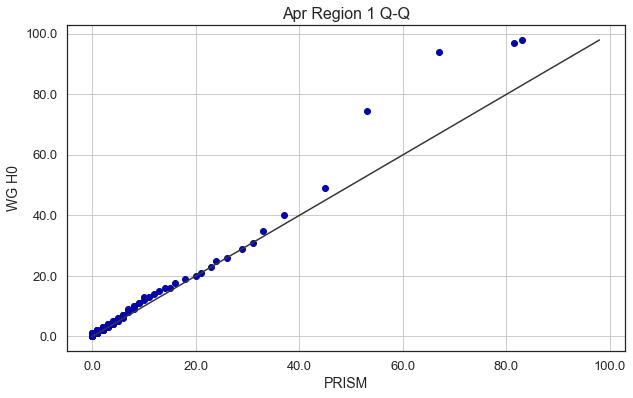

In [167]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs1.values, H0Qs1.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs1.values.max(), H0Qs1.values.max())], 
           [0.0, max( PRQs1.values.max(), H0Qs1.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Apr Region 1 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [168]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

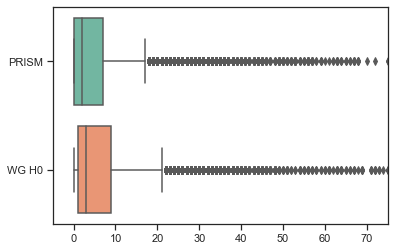

In [169]:
ax = sns.boxplot(data=CompApr1, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [170]:
sns.set(style="white", color_codes=True)

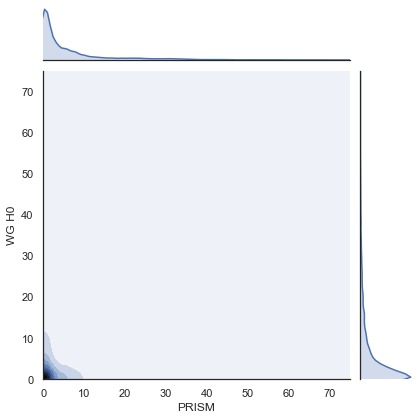

In [171]:
AprG1 = sns.jointplot(x='PRISM', y='WG H0', data=CompApr1, kind="kde", xlim=(0,75), ylim=(0,75))

### R2 Plots

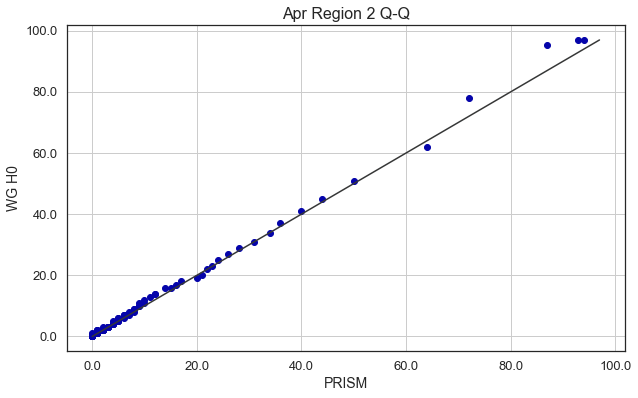

In [172]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs2.values, H0Qs2.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs2.values.max(), H0Qs2.values.max())], 
           [0.0, max( PRQs2.values.max(), H0Qs2.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Apr Region 2 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [173]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

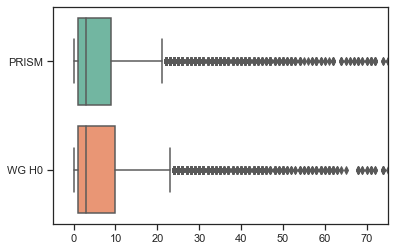

In [174]:
ax = sns.boxplot(data=CompApr2, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [175]:
sns.set(style="white", color_codes=True)

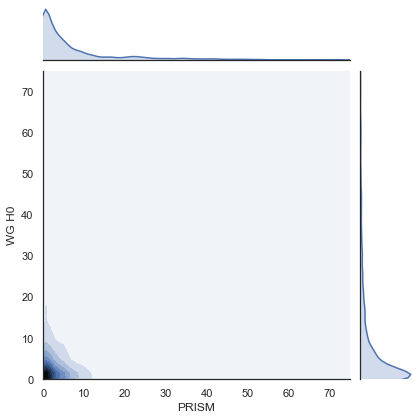

In [176]:
AprG2 = sns.jointplot(x='PRISM', y='WG H0', data=CompApr2, kind="kde", xlim=(0,75), ylim=(0,75))

### R3 Plots

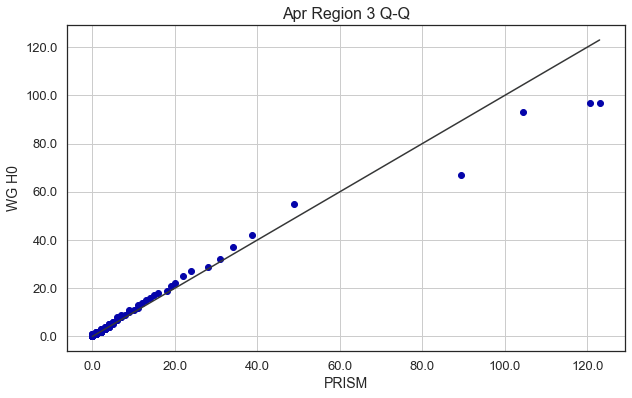

In [177]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs3.values, H0Qs3.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs3.values.max(), H0Qs3.values.max())], 
           [0.0, max( PRQs3.values.max(), H0Qs3.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Apr Region 3 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [178]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

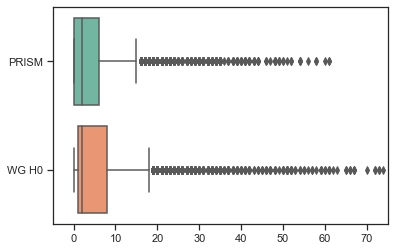

In [179]:
ax = sns.boxplot(data=CompApr3, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [180]:
sns.set(style="white", color_codes=True)

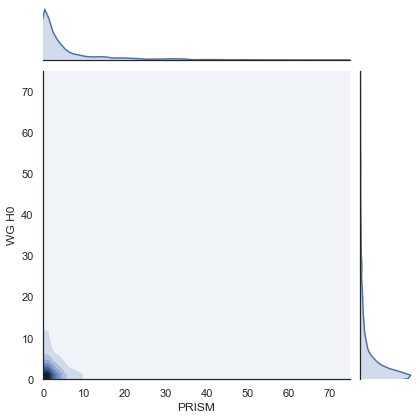

In [181]:
AprG3 = sns.jointplot(x='PRISM', y='WG H0', data=CompApr3, kind="kde", xlim=(0,75), ylim=(0,75))

### R4 Plots

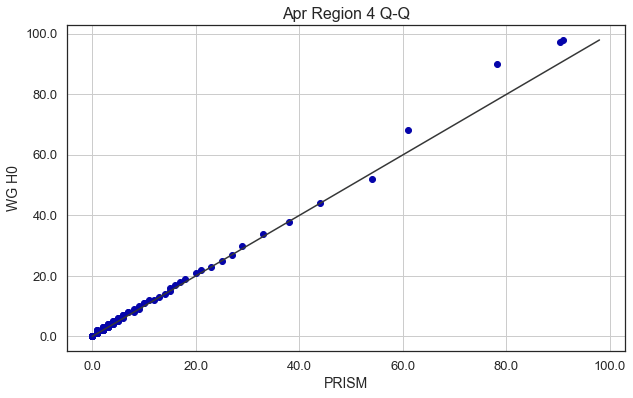

In [182]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs4.values, H0Qs4.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs4.values.max(), H0Qs4.values.max())], 
           [0.0, max( PRQs4.values.max(), H0Qs4.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Apr Region 4 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [183]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

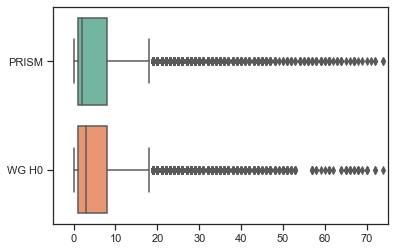

In [184]:
ax = sns.boxplot(data=CompApr4, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [185]:
sns.set(style="white", color_codes=True)

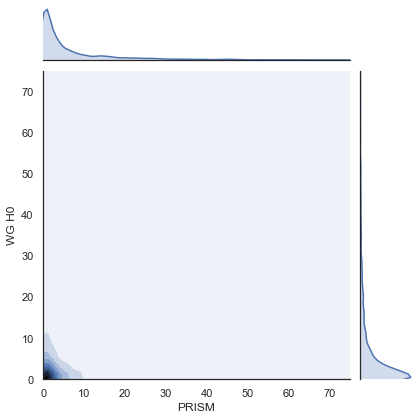

In [186]:
AprG4 = sns.jointplot(x='PRISM', y='WG H0', data=CompApr4, kind="kde", xlim=(0,75), ylim=(0,75))

## May

In [187]:
MonthInd = 5

In [188]:
# get lists of CMIP5 grid cells for this month
MayR1List = list()
MayR2List = list()
MayR3List = list()
MayR4List = list()
for gG in LOCA_KEYS:
    MonDict = LOCA_GRID_MAP[gG]
    tRegion = MonDict[MonthInd]
    if tRegion == 1:
        MayR1List.append( gG )
    elif tRegion == 2:
        MayR2List.append( gG )
    elif tRegion == 3:
        MayR3List.append( gG )
    elif tRegion == 4:
        MayR4List.append( gG )
#end for

In [189]:
PrMay1 = PRMayDF[PRMayDF['Region_Id'] == 1].copy()
PrMay2 = PRMayDF[PRMayDF['Region_Id'] == 2].copy()
PrMay3 = PRMayDF[PRMayDF['Region_Id'] == 3].copy()
PrMay4 = PRMayDF[PRMayDF['Region_Id'] == 4].copy()

In [190]:
H0May1 = H0MayDF[H0MayDF['Grid_Id'].isin(MayR1List)].copy()
H0May2 = H0MayDF[H0MayDF['Grid_Id'].isin(MayR2List)].copy()
H0May3 = H0MayDF[H0MayDF['Grid_Id'].isin(MayR3List)].copy()
H0May4 = H0MayDF[H0MayDF['Grid_Id'].isin(MayR4List)].copy()

In [191]:
len( H0MayDF ), len( H0May1 ) + len( H0May2 ) + len( H0May3 ) + len( H0May4 )

(51596512, 51596512)

In [192]:
len( PRMayDF ), len( PrMay1 ) + len( PrMay2 ) + len( PrMay3 ) + len( PrMay4 )

(46398, 46398)

First get our overall tracking values

In [193]:
AveLister.append( [ PRMayDF['Precip_mm'].mean(), H0MayDF['PDepth_mm'].mean(), 
                    PrMay1['Precip_mm'].mean(), H0May1['PDepth_mm'].mean(),
                    PrMay2['Precip_mm'].mean(), H0May2['PDepth_mm'].mean(),
                    PrMay3['Precip_mm'].mean(), H0May3['PDepth_mm'].mean(),
                    PrMay4['Precip_mm'].mean(), H0May4['PDepth_mm'].mean() ] )
VarLister.append( [ PRMayDF['Precip_mm'].var(), H0MayDF['PDepth_mm'].var(),
                    PrMay1['Precip_mm'].var(), H0May1['PDepth_mm'].var(),
                    PrMay2['Precip_mm'].var(), H0May2['PDepth_mm'].var(),
                    PrMay3['Precip_mm'].var(), H0May3['PDepth_mm'].var(),
                    PrMay4['Precip_mm'].var(), H0May4['PDepth_mm'].var() ] )
SkewLister.append( [ PRMayDF['Precip_mm'].skew(), H0MayDF['PDepth_mm'].skew(),
                    PrMay1['Precip_mm'].skew(), H0May1['PDepth_mm'].skew(),
                    PrMay2['Precip_mm'].skew(), H0May2['PDepth_mm'].skew(),
                    PrMay3['Precip_mm'].skew(), H0May3['PDepth_mm'].skew(),
                    PrMay4['Precip_mm'].skew(), H0May4['PDepth_mm'].skew() ] )
KurtLister.append( [ PRMayDF['Precip_mm'].kurtosis(), H0MayDF['PDepth_mm'].kurtosis(),
                    PrMay1['Precip_mm'].kurtosis(), H0May1['PDepth_mm'].kurtosis(),
                    PrMay2['Precip_mm'].kurtosis(), H0May2['PDepth_mm'].kurtosis(),
                    PrMay3['Precip_mm'].kurtosis(), H0May3['PDepth_mm'].kurtosis(),
                    PrMay4['Precip_mm'].kurtosis(), H0May4['PDepth_mm'].kurtosis() ] )
CntLister.append( [ PRMayDF['Precip_mm'].count(), H0MayDF['PDepth_mm'].count(), 
                    PrMay1['Precip_mm'].count(), H0May1['PDepth_mm'].count(),
                    PrMay2['Precip_mm'].count(), H0May2['PDepth_mm'].count(),
                    PrMay3['Precip_mm'].count(), H0May3['PDepth_mm'].count(),
                    PrMay4['Precip_mm'].count(), H0May4['PDepth_mm'].count() ] )
MedianLister.append( [ PRMayDF['Precip_mm'].median(), H0MayDF['PDepth_mm'].median(), 
                    PrMay1['Precip_mm'].median(), H0May1['PDepth_mm'].median(),
                    PrMay2['Precip_mm'].median(), H0May2['PDepth_mm'].median(),
                    PrMay3['Precip_mm'].median(), H0May3['PDepth_mm'].median(),
                    PrMay4['Precip_mm'].median(), H0May4['PDepth_mm'].median() ] )
MaxLister.append( [ PRMayDF['Precip_mm'].max(), H0MayDF['PDepth_mm'].max(), 
                    PrMay1['Precip_mm'].max(), H0May1['PDepth_mm'].max(),
                    PrMay2['Precip_mm'].max(), H0May2['PDepth_mm'].max(),
                    PrMay3['Precip_mm'].max(), H0May3['PDepth_mm'].max(),
                    PrMay4['Precip_mm'].max(), H0May4['PDepth_mm'].max() ] )
MinLister.append( [ PRMayDF['Precip_mm'].min(), H0MayDF['PDepth_mm'].min(), 
                    PrMay1['Precip_mm'].min(), H0May1['PDepth_mm'].min(),
                    PrMay2['Precip_mm'].min(), H0May2['PDepth_mm'].min(),
                    PrMay3['Precip_mm'].min(), H0May3['PDepth_mm'].min(),
                    PrMay4['Precip_mm'].min(), H0May4['PDepth_mm'].min() ] )

In [194]:
NumPR1 = len( PrMay1 )
NumH01 = len( H0May1 )
NumPR1, NumH01

(16354, 9381184)

In [195]:
NumPR2 = len( PrMay2 )
NumH02 = len( H0May2 )
NumPR2, NumH02

(6418, 0)

In [196]:
NumPR3 = len( PrMay3 )
NumH03 = len( H0May3 )
NumPR3, NumH03

(16981, 32834144)

In [197]:
NumPR4 = len( PrMay4 )
NumH04 = len( H0May4 )
NumPR4, NumH04

(6645, 9381184)

In [198]:
CompMay1 = pd.DataFrame( data={ 'PRISM' : np.array( PrMay1['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0May1['PDepth_mm'].sample(n=NumPR1), 
                                                  dtype=np.int32 ), } )

In [199]:
#CompMay2 = pd.DataFrame( data={ 'PRISM' : np.array( PrMay2['Precip_mm'], dtype=np.int32),
#                                "WG H0" : np.array( H0May2['PDepth_mm'].sample(n=NumPR2), 
#                                                  dtype=np.int32 ), } )

In [200]:
CompMay3 = pd.DataFrame( data={ 'PRISM' : np.array( PrMay3['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0May3['PDepth_mm'].sample(n=NumPR3), 
                                                  dtype=np.int32 ), } )

In [201]:
CompMay4 = pd.DataFrame( data={ 'PRISM' : np.array( PrMay4['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0May4['PDepth_mm'].sample(n=NumPR4), 
                                                  dtype=np.int32 ), } )

In [202]:
display( HTML( CompMay1.describe().to_html() ) )

In [203]:
#display( HTML( CompMay2.describe().to_html() ) )

In [204]:
display( HTML( CompMay3.describe().to_html() ) )

In [205]:
display( HTML( CompMay4.describe().to_html() ) )

In [206]:
PRQs1 = CompMay1['PRISM'].quantile( q=OurQs )
H0Qs1 = CompMay1['WG H0'].quantile( q=OurQs )

In [207]:
#PRQs2 = CompMay2['PRISM'].quantile( q=OurQs )
#H0Qs2 = CompMay2['WG H0'].quantile( q=OurQs )

In [208]:
PRQs3 = CompMay3['PRISM'].quantile( q=OurQs )
H0Qs3 = CompMay3['WG H0'].quantile( q=OurQs )

In [209]:
PRQs4 = CompMay4['PRISM'].quantile( q=OurQs )
H0Qs4 = CompMay4['WG H0'].quantile( q=OurQs )

### R1 Plots

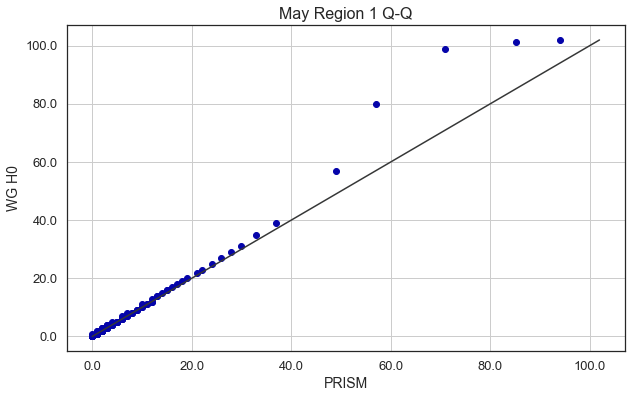

In [210]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs1.values, H0Qs1.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs1.values.max(), H0Qs1.values.max())], 
           [0.0, max( PRQs1.values.max(), H0Qs1.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("May Region 1 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [211]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

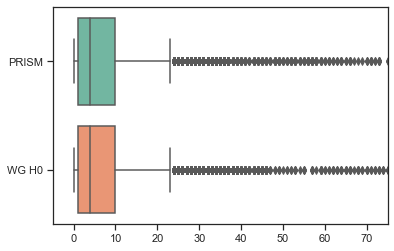

In [212]:
ax = sns.boxplot(data=CompMay1, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [213]:
sns.set(style="white", color_codes=True)

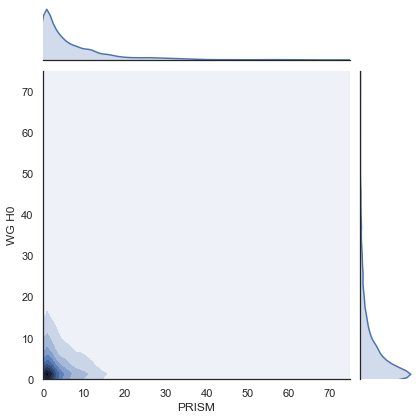

In [214]:
MayG1 = sns.jointplot(x='PRISM', y='WG H0', data=CompMay1, kind="kde", xlim=(0,75), ylim=(0,75))

### R2 Plots

### R3 Plots

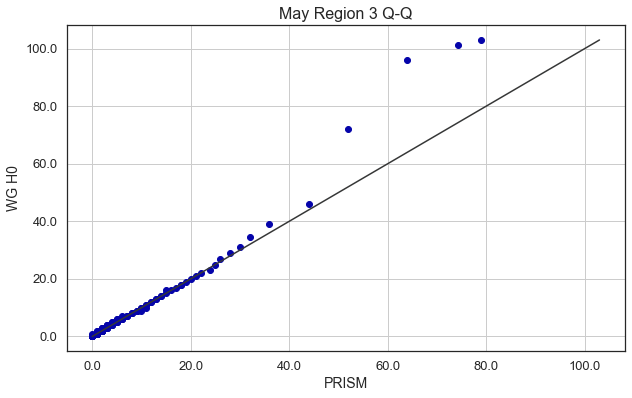

In [215]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs3.values, H0Qs3.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs3.values.max(), H0Qs3.values.max())], 
           [0.0, max( PRQs3.values.max(), H0Qs3.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("May Region 3 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [216]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

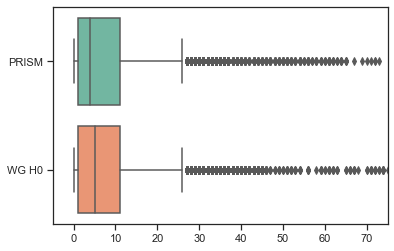

In [217]:
ax = sns.boxplot(data=CompMay3, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [218]:
sns.set(style="white", color_codes=True)

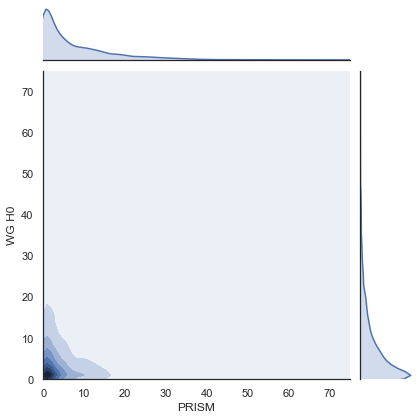

In [219]:
MayG3 = sns.jointplot(x='PRISM', y='WG H0', data=CompMay3, kind="kde", xlim=(0,75), ylim=(0,75))

### R4 Plots

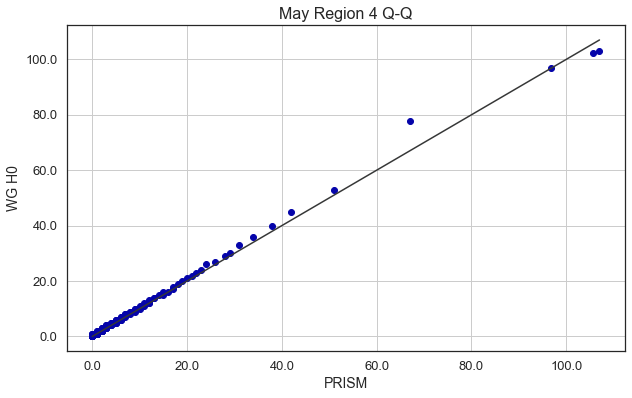

In [220]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs4.values, H0Qs4.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs4.values.max(), H0Qs4.values.max())], 
           [0.0, max( PRQs4.values.max(), H0Qs4.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("May Region 4 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [221]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

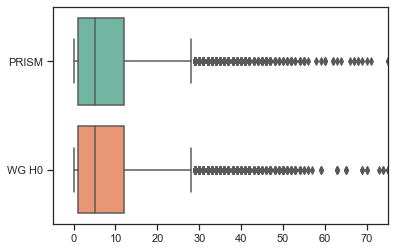

In [222]:
ax = sns.boxplot(data=CompMay4, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [223]:
sns.set(style="white", color_codes=True)

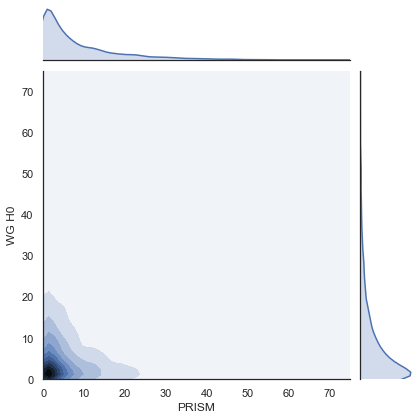

In [224]:
MayG4 = sns.jointplot(x='PRISM', y='WG H0', data=CompMay4, kind="kde", xlim=(0,75), ylim=(0,75))

## Jun

In [225]:
MonthInd = 6

In [226]:
# get lists of CMIP5 grid cells for this month
JunR1List = list()
JunR2List = list()
JunR3List = list()
JunR4List = list()
for gG in LOCA_KEYS:
    MonDict = LOCA_GRID_MAP[gG]
    tRegion = MonDict[MonthInd]
    if tRegion == 1:
        JunR1List.append( gG )
    elif tRegion == 2:
        JunR2List.append( gG )
    elif tRegion == 3:
        JunR3List.append( gG )
    elif tRegion == 4:
        JunR4List.append( gG )
#end for

In [227]:
PrJun1 = PRJunDF[PRJunDF['Region_Id'] == 1].copy()
PrJun2 = PRJunDF[PRJunDF['Region_Id'] == 2].copy()
PrJun3 = PRJunDF[PRJunDF['Region_Id'] == 3].copy()
PrJun4 = PRJunDF[PRJunDF['Region_Id'] == 4].copy()

In [228]:
H0Jun1 = H0JunDF[H0JunDF['Grid_Id'].isin(JunR1List)].copy()
H0Jun2 = H0JunDF[H0JunDF['Grid_Id'].isin(JunR2List)].copy()
H0Jun3 = H0JunDF[H0JunDF['Grid_Id'].isin(JunR3List)].copy()
H0Jun4 = H0JunDF[H0JunDF['Grid_Id'].isin(JunR4List)].copy()

In [229]:
len( H0JunDF ), len( H0Jun1 ) + len( H0Jun2 ) + len( H0Jun3 ) + len( H0Jun4 )

(51330048, 51330048)

In [230]:
len( PRJunDF ), len( PrJun1 ) + len( PrJun2 ) + len( PrJun3 ) + len( PrJun4 )

(47121, 47121)

First get our overall tracking values

In [231]:
AveLister.append( [ PRJunDF['Precip_mm'].mean(), H0JunDF['PDepth_mm'].mean(), 
                    PrJun1['Precip_mm'].mean(), H0Jun1['PDepth_mm'].mean(),
                    PrJun2['Precip_mm'].mean(), H0Jun2['PDepth_mm'].mean(),
                    PrJun3['Precip_mm'].mean(), H0Jun3['PDepth_mm'].mean(),
                    PrJun4['Precip_mm'].mean(), H0Jun4['PDepth_mm'].mean() ] )
VarLister.append( [ PRJunDF['Precip_mm'].var(), H0JunDF['PDepth_mm'].var(),
                    PrJun1['Precip_mm'].var(), H0Jun1['PDepth_mm'].var(),
                    PrJun2['Precip_mm'].var(), H0Jun2['PDepth_mm'].var(),
                    PrJun3['Precip_mm'].var(), H0Jun3['PDepth_mm'].var(),
                    PrJun4['Precip_mm'].var(), H0Jun4['PDepth_mm'].var() ] )
SkewLister.append( [ PRJunDF['Precip_mm'].skew(), H0JunDF['PDepth_mm'].skew(),
                    PrJun1['Precip_mm'].skew(), H0Jun1['PDepth_mm'].skew(),
                    PrJun2['Precip_mm'].skew(), H0Jun2['PDepth_mm'].skew(),
                    PrJun3['Precip_mm'].skew(), H0Jun3['PDepth_mm'].skew(),
                    PrJun4['Precip_mm'].skew(), H0Jun4['PDepth_mm'].skew() ] )
KurtLister.append( [ PRJunDF['Precip_mm'].kurtosis(), H0JunDF['PDepth_mm'].kurtosis(),
                    PrJun1['Precip_mm'].kurtosis(), H0Jun1['PDepth_mm'].kurtosis(),
                    PrJun2['Precip_mm'].kurtosis(), H0Jun2['PDepth_mm'].kurtosis(),
                    PrJun3['Precip_mm'].kurtosis(), H0Jun3['PDepth_mm'].kurtosis(),
                    PrJun4['Precip_mm'].kurtosis(), H0Jun4['PDepth_mm'].kurtosis() ] )
CntLister.append( [ PRJunDF['Precip_mm'].count(), H0JunDF['PDepth_mm'].count(), 
                    PrJun1['Precip_mm'].count(), H0Jun1['PDepth_mm'].count(),
                    PrJun2['Precip_mm'].count(), H0Jun2['PDepth_mm'].count(),
                    PrJun3['Precip_mm'].count(), H0Jun3['PDepth_mm'].count(),
                    PrJun4['Precip_mm'].count(), H0Jun4['PDepth_mm'].count() ] )
MedianLister.append( [ PRJunDF['Precip_mm'].median(), H0JunDF['PDepth_mm'].median(), 
                    PrJun1['Precip_mm'].median(), H0Jun1['PDepth_mm'].median(),
                    PrJun2['Precip_mm'].median(), H0Jun2['PDepth_mm'].median(),
                    PrJun3['Precip_mm'].median(), H0Jun3['PDepth_mm'].median(),
                    PrJun4['Precip_mm'].median(), H0Jun4['PDepth_mm'].median() ] )
MaxLister.append( [ PRJunDF['Precip_mm'].max(), H0JunDF['PDepth_mm'].max(), 
                    PrJun1['Precip_mm'].max(), H0Jun1['PDepth_mm'].max(),
                    PrJun2['Precip_mm'].max(), H0Jun2['PDepth_mm'].max(),
                    PrJun3['Precip_mm'].max(), H0Jun3['PDepth_mm'].max(),
                    PrJun4['Precip_mm'].max(), H0Jun4['PDepth_mm'].max() ] )
MinLister.append( [ PRJunDF['Precip_mm'].min(), H0JunDF['PDepth_mm'].min(), 
                    PrJun1['Precip_mm'].min(), H0Jun1['PDepth_mm'].min(),
                    PrJun2['Precip_mm'].min(), H0Jun2['PDepth_mm'].min(),
                    PrJun3['Precip_mm'].min(), H0Jun3['PDepth_mm'].min(),
                    PrJun4['Precip_mm'].min(), H0Jun4['PDepth_mm'].min() ] )

In [232]:
NumPR1 = len( PrJun1 )
NumH01 = len( H0Jun1 )
NumPR1, NumH01

(15467, 20998656)

In [233]:
NumPR2 = len( PrJun2 )
NumH02 = len( H0Jun2 )
NumPR2, NumH02

(6273, 0)

In [234]:
NumPR3 = len( PrJun3 )
NumH03 = len( H0Jun3 )
NumPR3, NumH03

(20947, 25665024)

In [235]:
NumPR4 = len( PrJun4 )
NumH04 = len( H0Jun4 )
NumPR4, NumH04

(4434, 4666368)

In [236]:
CompJun1 = pd.DataFrame( data={ 'PRISM' : np.array( PrJun1['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Jun1['PDepth_mm'].sample(n=NumPR1), 
                                                  dtype=np.int32 ), } )

In [237]:
#CompJun2 = pd.DataFrame( data={ 'PRISM' : np.array( PrJun2['Precip_mm'], dtype=np.int32),
#                                "WG H0" : np.array( H0Jun2['PDepth_mm'].sample(n=NumPR2), 
#                                                  dtype=np.int32 ), } )

In [238]:
CompJun3 = pd.DataFrame( data={ 'PRISM' : np.array( PrJun3['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Jun3['PDepth_mm'].sample(n=NumPR3), 
                                                  dtype=np.int32 ), } )

In [239]:
CompJun4 = pd.DataFrame( data={ 'PRISM' : np.array( PrJun4['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Jun4['PDepth_mm'].sample(n=NumPR4), 
                                                  dtype=np.int32 ), } )

In [240]:
display( HTML( CompJun1.describe().to_html() ) )

In [241]:
#display( HTML( CompJun2.describe().to_html() ) )

In [242]:
display( HTML( CompJun3.describe().to_html() ) )

In [243]:
display( HTML( CompJun4.describe().to_html() ) )

In [244]:
PRQs1 = CompJun1['PRISM'].quantile( q=OurQs )
H0Qs1 = CompJun1['WG H0'].quantile( q=OurQs )

In [245]:
#PRQs2 = CompJun2['PRISM'].quantile( q=OurQs )
#H0Qs2 = CompJun2['WG H0'].quantile( q=OurQs )

In [246]:
PRQs3 = CompJun3['PRISM'].quantile( q=OurQs )
H0Qs3 = CompJun3['WG H0'].quantile( q=OurQs )

In [247]:
PRQs4 = CompJun4['PRISM'].quantile( q=OurQs )
H0Qs4 = CompJun4['WG H0'].quantile( q=OurQs )

### R1 Plots

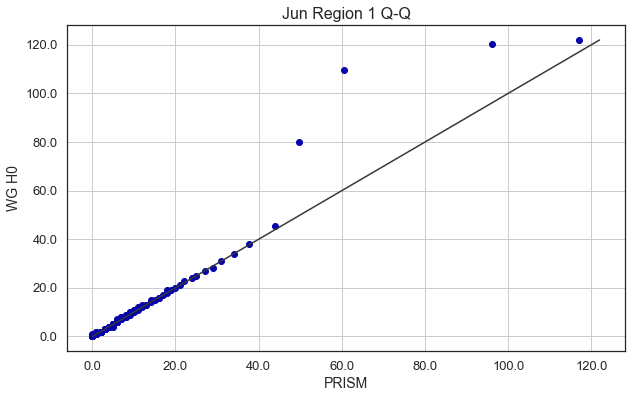

In [248]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs1.values, H0Qs1.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs1.values.max(), H0Qs1.values.max())], 
           [0.0, max( PRQs1.values.max(), H0Qs1.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Jun Region 1 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [249]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

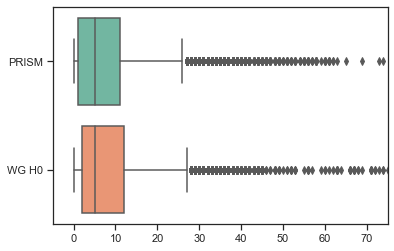

In [250]:
ax = sns.boxplot(data=CompJun1, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [251]:
sns.set(style="white", color_codes=True)

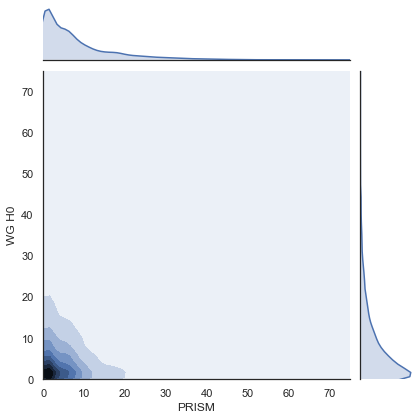

In [252]:
JunG1 = sns.jointplot(x='PRISM', y='WG H0', data=CompJun1, kind="kde", xlim=(0,75), ylim=(0,75))

### R2 Plots

### R3 Plots

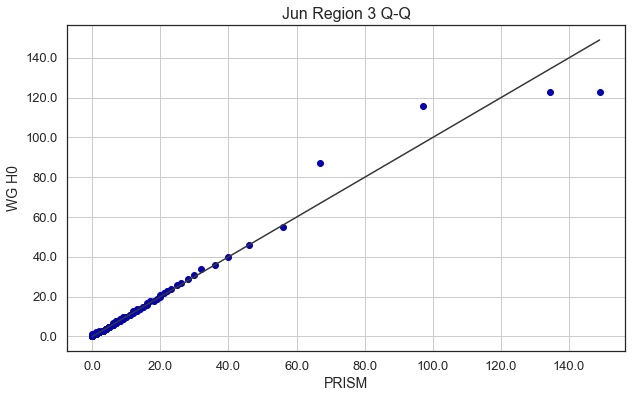

In [253]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs3.values, H0Qs3.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs3.values.max(), H0Qs3.values.max())], 
           [0.0, max( PRQs3.values.max(), H0Qs3.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Jun Region 3 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [254]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

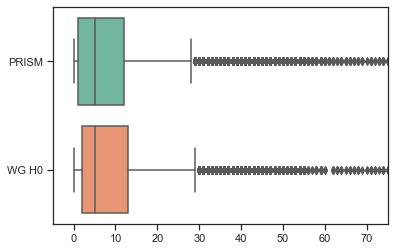

In [255]:
ax = sns.boxplot(data=CompJun3, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [256]:
sns.set(style="white", color_codes=True)

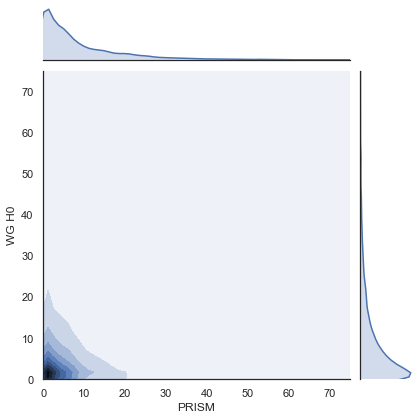

In [257]:
JunG3 = sns.jointplot(x='PRISM', y='WG H0', data=CompJun3, kind="kde", xlim=(0,75), ylim=(0,75))

### R4 Plots

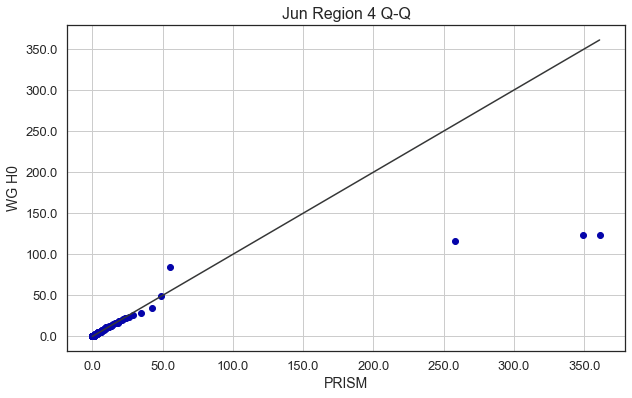

In [258]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs4.values, H0Qs4.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs4.values.max(), H0Qs4.values.max())], 
           [0.0, max( PRQs4.values.max(), H0Qs4.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Jun Region 4 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [259]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

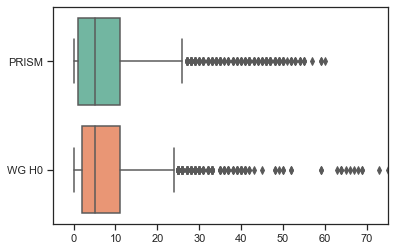

In [260]:
ax = sns.boxplot(data=CompJun4, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [261]:
sns.set(style="white", color_codes=True)

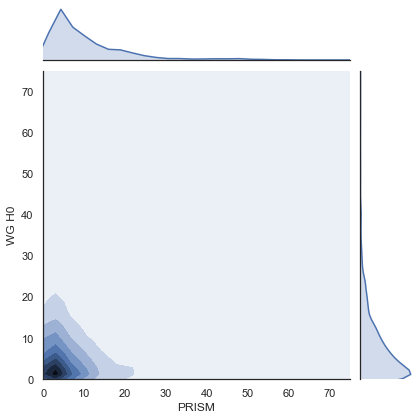

In [262]:
JunG4 = sns.jointplot(x='PRISM', y='WG H0', data=CompJun4, kind="kde", xlim=(0,75), ylim=(0,75))

## Jul

In [263]:
MonthInd = 7

In [264]:
# get lists of CMIP5 grid cells for this month
JulR1List = list()
JulR2List = list()
JulR3List = list()
JulR4List = list()
for gG in LOCA_KEYS:
    MonDict = LOCA_GRID_MAP[gG]
    tRegion = MonDict[MonthInd]
    if tRegion == 1:
        JulR1List.append( gG )
    elif tRegion == 2:
        JulR2List.append( gG )
    elif tRegion == 3:
        JulR3List.append( gG )
    elif tRegion == 4:
        JulR4List.append( gG )
#end for

In [265]:
PrJul1 = PRJulDF[PRJulDF['Region_Id'] == 1].copy()
PrJul2 = PRJulDF[PRJulDF['Region_Id'] == 2].copy()
PrJul3 = PRJulDF[PRJulDF['Region_Id'] == 3].copy()
PrJul4 = PRJulDF[PRJulDF['Region_Id'] == 4].copy()

In [266]:
H0Jul1 = H0JulDF[H0JulDF['Grid_Id'].isin(JulR1List)].copy()
H0Jul2 = H0JulDF[H0JulDF['Grid_Id'].isin(JulR2List)].copy()
H0Jul3 = H0JulDF[H0JulDF['Grid_Id'].isin(JulR3List)].copy()
H0Jul4 = H0JulDF[H0JulDF['Grid_Id'].isin(JulR4List)].copy()

In [267]:
len( H0JulDF ), len( H0Jul1 ) + len( H0Jul2 ) + len( H0Jul3 ) + len( H0Jul4 )

(43975448, 43975448)

In [268]:
len( PRJulDF ), len( PrJul1 ) + len( PrJul2 ) + len( PrJul3 ) + len( PrJul4 )

(35651, 35651)

First get our overall tracking values

In [269]:
AveLister.append( [ PRJulDF['Precip_mm'].mean(), H0JulDF['PDepth_mm'].mean(), 
                    PrJul1['Precip_mm'].mean(), H0Jul1['PDepth_mm'].mean(),
                    PrJul2['Precip_mm'].mean(), H0Jul2['PDepth_mm'].mean(),
                    PrJul3['Precip_mm'].mean(), H0Jul3['PDepth_mm'].mean(),
                    PrJul4['Precip_mm'].mean(), H0Jul4['PDepth_mm'].mean() ] )
VarLister.append( [ PRJulDF['Precip_mm'].var(), H0JulDF['PDepth_mm'].var(),
                    PrJul1['Precip_mm'].var(), H0Jul1['PDepth_mm'].var(),
                    PrJul2['Precip_mm'].var(), H0Jul2['PDepth_mm'].var(),
                    PrJul3['Precip_mm'].var(), H0Jul3['PDepth_mm'].var(),
                    PrJul4['Precip_mm'].var(), H0Jul4['PDepth_mm'].var() ] )
SkewLister.append( [ PRJulDF['Precip_mm'].skew(), H0JulDF['PDepth_mm'].skew(),
                    PrJul1['Precip_mm'].skew(), H0Jul1['PDepth_mm'].skew(),
                    PrJul2['Precip_mm'].skew(), H0Jul2['PDepth_mm'].skew(),
                    PrJul3['Precip_mm'].skew(), H0Jul3['PDepth_mm'].skew(),
                    PrJul4['Precip_mm'].skew(), H0Jul4['PDepth_mm'].skew() ] )
KurtLister.append( [ PRJulDF['Precip_mm'].kurtosis(), H0JulDF['PDepth_mm'].kurtosis(),
                    PrJul1['Precip_mm'].kurtosis(), H0Jul1['PDepth_mm'].kurtosis(),
                    PrJul2['Precip_mm'].kurtosis(), H0Jul2['PDepth_mm'].kurtosis(),
                    PrJul3['Precip_mm'].kurtosis(), H0Jul3['PDepth_mm'].kurtosis(),
                    PrJul4['Precip_mm'].kurtosis(), H0Jul4['PDepth_mm'].kurtosis() ] )
CntLister.append( [ PRJulDF['Precip_mm'].count(), H0JulDF['PDepth_mm'].count(), 
                    PrJul1['Precip_mm'].count(), H0Jul1['PDepth_mm'].count(),
                    PrJul2['Precip_mm'].count(), H0Jul2['PDepth_mm'].count(),
                    PrJul3['Precip_mm'].count(), H0Jul3['PDepth_mm'].count(),
                    PrJul4['Precip_mm'].count(), H0Jul4['PDepth_mm'].count() ] )
MedianLister.append( [ PRJulDF['Precip_mm'].median(), H0JulDF['PDepth_mm'].median(), 
                    PrJul1['Precip_mm'].median(), H0Jul1['PDepth_mm'].median(),
                    PrJul2['Precip_mm'].median(), H0Jul2['PDepth_mm'].median(),
                    PrJul3['Precip_mm'].median(), H0Jul3['PDepth_mm'].median(),
                    PrJul4['Precip_mm'].median(), H0Jul4['PDepth_mm'].median() ] )
MaxLister.append( [ PRJulDF['Precip_mm'].max(), H0JulDF['PDepth_mm'].max(), 
                    PrJul1['Precip_mm'].max(), H0Jul1['PDepth_mm'].max(),
                    PrJul2['Precip_mm'].max(), H0Jul2['PDepth_mm'].max(),
                    PrJul3['Precip_mm'].max(), H0Jul3['PDepth_mm'].max(),
                    PrJul4['Precip_mm'].max(), H0Jul4['PDepth_mm'].max() ] )
MinLister.append( [ PRJulDF['Precip_mm'].min(), H0JulDF['PDepth_mm'].min(), 
                    PrJul1['Precip_mm'].min(), H0Jul1['PDepth_mm'].min(),
                    PrJul2['Precip_mm'].min(), H0Jul2['PDepth_mm'].min(),
                    PrJul3['Precip_mm'].min(), H0Jul3['PDepth_mm'].min(),
                    PrJul4['Precip_mm'].min(), H0Jul4['PDepth_mm'].min() ] )

In [270]:
NumPR1 = len( PrJul1 )
NumH01 = len( H0Jul1 )
NumPR1, NumH01

(19032, 35979912)

In [271]:
NumPR2 = len( PrJul2 )
NumH02 = len( H0Jul2 )
NumPR2, NumH02

(5473, 0)

In [272]:
NumPR3 = len( PrJul3 )
NumH03 = len( H0Jul3 )
NumPR3, NumH03

(7785, 7995536)

In [273]:
NumPR4 = len( PrJul4 )
NumH04 = len( H0Jul4 )
NumPR4, NumH04

(3361, 0)

In [274]:
CompJul1 = pd.DataFrame( data={ 'PRISM' : np.array( PrJul1['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Jul1['PDepth_mm'].sample(n=NumPR1), 
                                                  dtype=np.int32 ), } )

In [275]:
#CompJul2 = pd.DataFrame( data={ 'PRISM' : np.array( PrJul2['Precip_mm'], dtype=np.int32),
#                                "WG H0" : np.array( H0Jul2['PDepth_mm'].sample(n=NumPR2), 
#                                                  dtype=np.int32 ), } )

In [276]:
CompJul3 = pd.DataFrame( data={ 'PRISM' : np.array( PrJul3['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Jul3['PDepth_mm'].sample(n=NumPR3), 
                                                  dtype=np.int32 ), } )

In [277]:
#CompJul4 = pd.DataFrame( data={ 'PRISM' : np.array( PrJul4['Precip_mm'], dtype=np.int32),
#                                "WG H0" : np.array( H0Jul4['PDepth_mm'].sample(n=NumPR4), 
#                                                  dtype=np.int32 ), } )

In [278]:
display( HTML( CompJul1.describe().to_html() ) )

In [279]:
#display( HTML( CompJul2.describe().to_html() ) )

In [280]:
display( HTML( CompJul3.describe().to_html() ) )

In [281]:
#display( HTML( CompJul4.describe().to_html() ) )

In [282]:
PRQs1 = CompJul1['PRISM'].quantile( q=OurQs )
H0Qs1 = CompJul1['WG H0'].quantile( q=OurQs )

In [283]:
#PRQs2 = CompJul2['PRISM'].quantile( q=OurQs )
#H0Qs2 = CompJul2['WG H0'].quantile( q=OurQs )

In [284]:
PRQs3 = CompJul3['PRISM'].quantile( q=OurQs )
H0Qs3 = CompJul3['WG H0'].quantile( q=OurQs )

In [285]:
#PRQs4 = CompJul4['PRISM'].quantile( q=OurQs )
#H0Qs4 = CompJul4['WG H0'].quantile( q=OurQs )

### R1 Plots

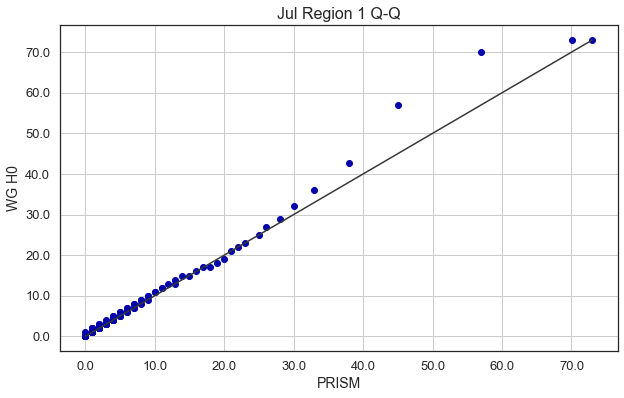

In [286]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs1.values, H0Qs1.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs1.values.max(), H0Qs1.values.max())], 
           [0.0, max( PRQs1.values.max(), H0Qs1.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Jul Region 1 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [287]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

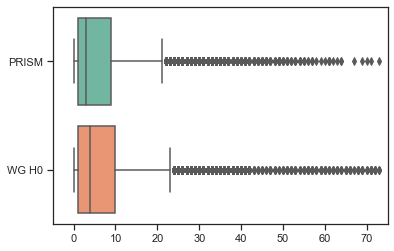

In [288]:
ax = sns.boxplot(data=CompJul1, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [289]:
sns.set(style="white", color_codes=True)

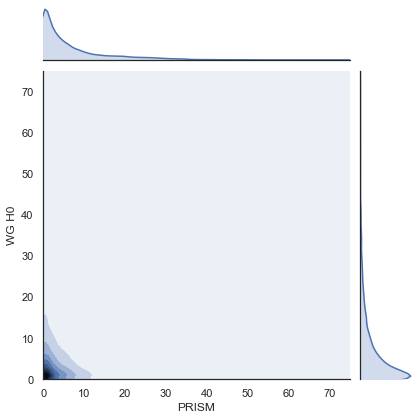

In [290]:
JulG1 = sns.jointplot(x='PRISM', y='WG H0', data=CompJul1, kind="kde", xlim=(0,75), ylim=(0,75))

### R2 Plots

### R3 Plots

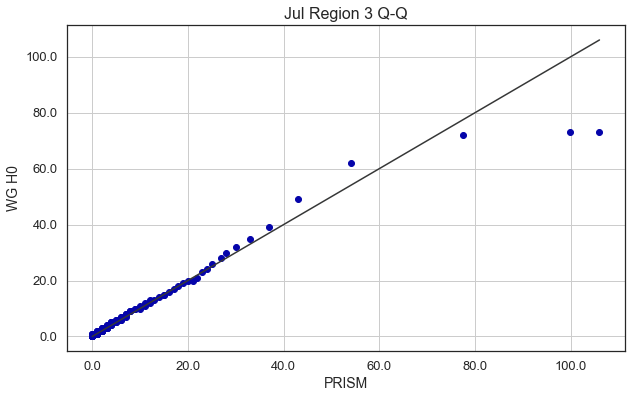

In [291]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs3.values, H0Qs3.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs3.values.max(), H0Qs3.values.max())], 
           [0.0, max( PRQs3.values.max(), H0Qs3.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Jul Region 3 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [292]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

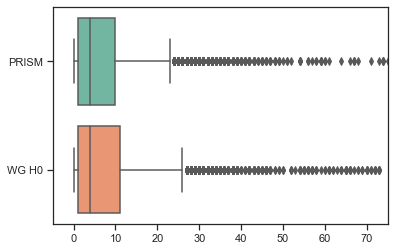

In [293]:
ax = sns.boxplot(data=CompJul3, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [294]:
sns.set(style="white", color_codes=True)

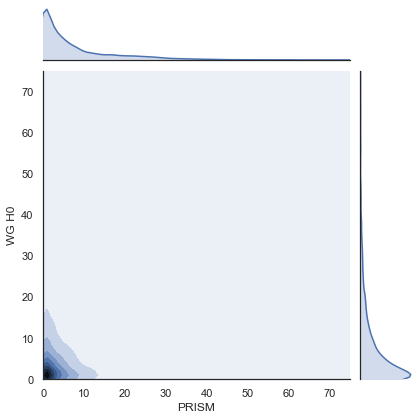

In [295]:
JulG3 = sns.jointplot(x='PRISM', y='WG H0', data=CompJul3, kind="kde", xlim=(0,75), ylim=(0,75))

### R4 Plots

## Aug

In [296]:
MonthInd = 8

In [297]:
# get lists of CMIP5 grid cells for this month
AugR1List = list()
AugR2List = list()
AugR3List = list()
AugR4List = list()
for gG in LOCA_KEYS:
    MonDict = LOCA_GRID_MAP[gG]
    tRegion = MonDict[MonthInd]
    if tRegion == 1:
        AugR1List.append( gG )
    elif tRegion == 2:
        AugR2List.append( gG )
    elif tRegion == 3:
        AugR3List.append( gG )
    elif tRegion == 4:
        AugR4List.append( gG )
#end for

In [298]:
PrAug1 = PRAugDF[PRAugDF['Region_Id'] == 1].copy()
PrAug2 = PRAugDF[PRAugDF['Region_Id'] == 2].copy()
PrAug3 = PRAugDF[PRAugDF['Region_Id'] == 3].copy()
PrAug4 = PRAugDF[PRAugDF['Region_Id'] == 4].copy()

In [299]:
H0Aug1 = H0AugDF[H0AugDF['Grid_Id'].isin(AugR1List)].copy()
H0Aug2 = H0AugDF[H0AugDF['Grid_Id'].isin(AugR2List)].copy()
H0Aug3 = H0AugDF[H0AugDF['Grid_Id'].isin(AugR3List)].copy()
H0Aug4 = H0AugDF[H0AugDF['Grid_Id'].isin(AugR4List)].copy()

In [300]:
len( H0AugDF ), len( H0Aug1 ) + len( H0Aug2 ) + len( H0Aug3 ) + len( H0Aug4 )

(48840550, 48840550)

In [301]:
len( PRAugDF ), len( PrAug1 ) + len( PrAug2 ) + len( PrAug3 ) + len( PrAug4 )

(42151, 42151)

First get our overall tracking values

In [302]:
AveLister.append( [ PRAugDF['Precip_mm'].mean(), H0AugDF['PDepth_mm'].mean(), 
                    PrAug1['Precip_mm'].mean(), H0Aug1['PDepth_mm'].mean(),
                    PrAug2['Precip_mm'].mean(), H0Aug2['PDepth_mm'].mean(),
                    PrAug3['Precip_mm'].mean(), H0Aug3['PDepth_mm'].mean(),
                    PrAug4['Precip_mm'].mean(), H0Aug4['PDepth_mm'].mean() ] )
VarLister.append( [ PRAugDF['Precip_mm'].var(), H0AugDF['PDepth_mm'].var(),
                    PrAug1['Precip_mm'].var(), H0Aug1['PDepth_mm'].var(),
                    PrAug2['Precip_mm'].var(), H0Aug2['PDepth_mm'].var(),
                    PrAug3['Precip_mm'].var(), H0Aug3['PDepth_mm'].var(),
                    PrAug4['Precip_mm'].var(), H0Aug4['PDepth_mm'].var() ] )
SkewLister.append( [ PRAugDF['Precip_mm'].skew(), H0AugDF['PDepth_mm'].skew(),
                    PrAug1['Precip_mm'].skew(), H0Aug1['PDepth_mm'].skew(),
                    PrAug2['Precip_mm'].skew(), H0Aug2['PDepth_mm'].skew(),
                    PrAug3['Precip_mm'].skew(), H0Aug3['PDepth_mm'].skew(),
                    PrAug4['Precip_mm'].skew(), H0Aug4['PDepth_mm'].skew() ] )
KurtLister.append( [ PRAugDF['Precip_mm'].kurtosis(), H0AugDF['PDepth_mm'].kurtosis(),
                    PrAug1['Precip_mm'].kurtosis(), H0Aug1['PDepth_mm'].kurtosis(),
                    PrAug2['Precip_mm'].kurtosis(), H0Aug2['PDepth_mm'].kurtosis(),
                    PrAug3['Precip_mm'].kurtosis(), H0Aug3['PDepth_mm'].kurtosis(),
                    PrAug4['Precip_mm'].kurtosis(), H0Aug4['PDepth_mm'].kurtosis() ] )
CntLister.append( [ PRAugDF['Precip_mm'].count(), H0AugDF['PDepth_mm'].count(), 
                    PrAug1['Precip_mm'].count(), H0Aug1['PDepth_mm'].count(),
                    PrAug2['Precip_mm'].count(), H0Aug2['PDepth_mm'].count(),
                    PrAug3['Precip_mm'].count(), H0Aug3['PDepth_mm'].count(),
                    PrAug4['Precip_mm'].count(), H0Aug4['PDepth_mm'].count() ] )
MedianLister.append( [ PRAugDF['Precip_mm'].median(), H0AugDF['PDepth_mm'].median(), 
                    PrAug1['Precip_mm'].median(), H0Aug1['PDepth_mm'].median(),
                    PrAug2['Precip_mm'].median(), H0Aug2['PDepth_mm'].median(),
                    PrAug3['Precip_mm'].median(), H0Aug3['PDepth_mm'].median(),
                    PrAug4['Precip_mm'].median(), H0Aug4['PDepth_mm'].median() ] )
MaxLister.append( [ PRAugDF['Precip_mm'].max(), H0AugDF['PDepth_mm'].max(), 
                    PrAug1['Precip_mm'].max(), H0Aug1['PDepth_mm'].max(),
                    PrAug2['Precip_mm'].max(), H0Aug2['PDepth_mm'].max(),
                    PrAug3['Precip_mm'].max(), H0Aug3['PDepth_mm'].max(),
                    PrAug4['Precip_mm'].max(), H0Aug4['PDepth_mm'].max() ] )
MinLister.append( [ PRAugDF['Precip_mm'].min(), H0AugDF['PDepth_mm'].min(), 
                    PrAug1['Precip_mm'].min(), H0Aug1['PDepth_mm'].min(),
                    PrAug2['Precip_mm'].min(), H0Aug2['PDepth_mm'].min(),
                    PrAug3['Precip_mm'].min(), H0Aug3['PDepth_mm'].min(),
                    PrAug4['Precip_mm'].min(), H0Aug4['PDepth_mm'].min() ] )

In [303]:
NumPR1 = len( PrAug1 )
NumH01 = len( H0Aug1 )
NumPR1, NumH01

(16352, 24420275)

In [304]:
NumPR2 = len( PrAug2 )
NumH02 = len( H0Aug2 )
NumPR2, NumH02

(8070, 6660075)

In [305]:
NumPR3 = len( PrAug3 )
NumH03 = len( H0Aug3 )
NumPR3, NumH03

(4062, 0)

In [306]:
NumPR4 = len( PrAug4 )
NumH04 = len( H0Aug4 )
NumPR4, NumH04

(13667, 17760200)

In [307]:
CompAug1 = pd.DataFrame( data={ 'PRISM' : np.array( PrAug1['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Aug1['PDepth_mm'].sample(n=NumPR1), 
                                                  dtype=np.int32 ), } )

In [308]:
CompAug2 = pd.DataFrame( data={ 'PRISM' : np.array( PrAug2['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Aug2['PDepth_mm'].sample(n=NumPR2), 
                                                  dtype=np.int32 ), } )

In [309]:
#CompAug3 = pd.DataFrame( data={ 'PRISM' : np.array( PrAug3['Precip_mm'], dtype=np.int32),
#                                "WG H0" : np.array( H0Aug3['PDepth_mm'].sample(n=NumPR3), 
#                                                  dtype=np.int32 ), } )

In [310]:
CompAug4 = pd.DataFrame( data={ 'PRISM' : np.array( PrAug4['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Aug4['PDepth_mm'].sample(n=NumPR4), 
                                                  dtype=np.int32 ), } )

In [311]:
display( HTML( CompAug1.describe().to_html() ) )

In [312]:
display( HTML( CompAug2.describe().to_html() ) )

In [313]:
#display( HTML( CompAug3.describe().to_html() ) )

In [314]:
display( HTML( CompAug4.describe().to_html() ) )

In [315]:
PRQs1 = CompAug1['PRISM'].quantile( q=OurQs )
H0Qs1 = CompAug1['WG H0'].quantile( q=OurQs )

In [316]:
PRQs2 = CompAug2['PRISM'].quantile( q=OurQs )
H0Qs2 = CompAug2['WG H0'].quantile( q=OurQs )

In [317]:
#PRQs3 = CompAug3['PRISM'].quantile( q=OurQs )
#H0Qs3 = CompAug3['WG H0'].quantile( q=OurQs )

In [318]:
PRQs4 = CompAug4['PRISM'].quantile( q=OurQs )
H0Qs4 = CompAug4['WG H0'].quantile( q=OurQs )

### R1 Plots

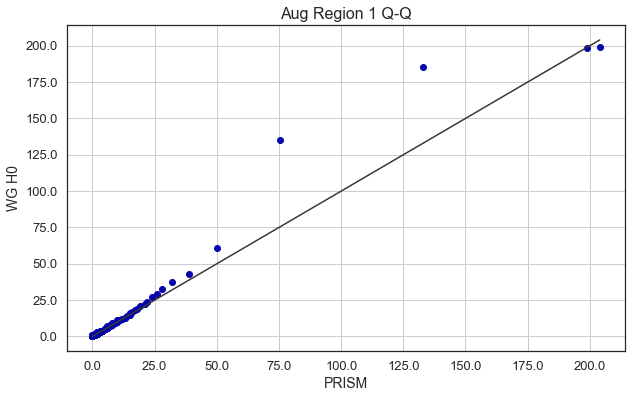

In [319]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs1.values, H0Qs1.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs1.values.max(), H0Qs1.values.max())], 
           [0.0, max( PRQs1.values.max(), H0Qs1.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Aug Region 1 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [320]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

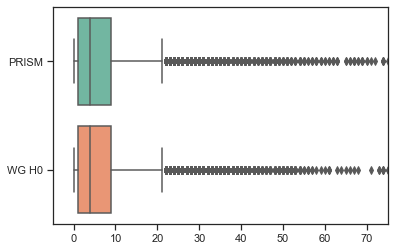

In [321]:
ax = sns.boxplot(data=CompAug1, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [322]:
sns.set(style="white", color_codes=True)

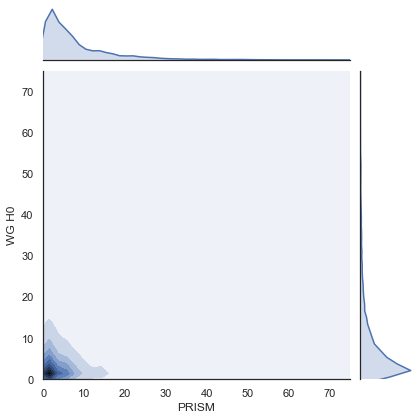

In [323]:
AugG1 = sns.jointplot(x='PRISM', y='WG H0', data=CompAug1, kind="kde", xlim=(0,75), ylim=(0,75))

### R2 Plots

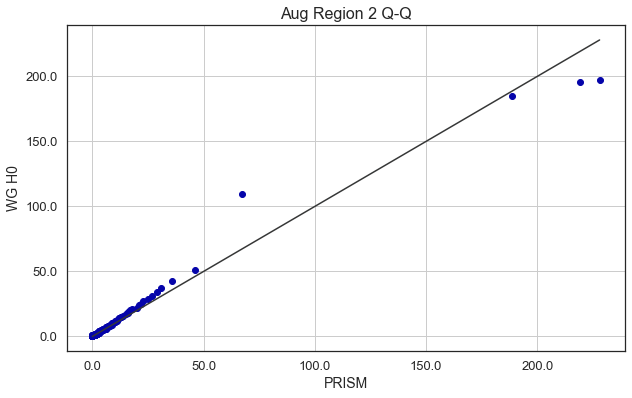

In [324]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs2.values, H0Qs2.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs2.values.max(), H0Qs2.values.max())], 
           [0.0, max( PRQs2.values.max(), H0Qs2.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Aug Region 2 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [325]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

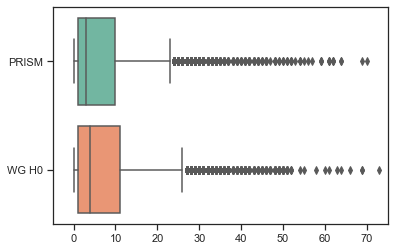

In [326]:
ax = sns.boxplot(data=CompAug2, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [327]:
sns.set(style="white", color_codes=True)

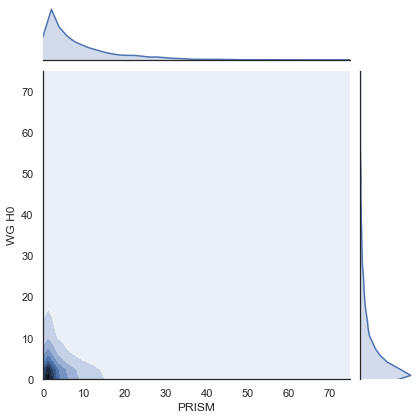

In [328]:
AugG2 = sns.jointplot(x='PRISM', y='WG H0', data=CompAug2, kind="kde", xlim=(0,75), ylim=(0,75))

### R3 Plots

### R4 Plots

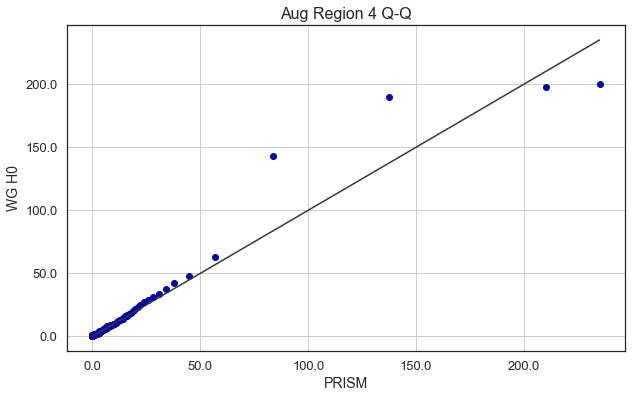

In [329]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs4.values, H0Qs4.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs4.values.max(), H0Qs4.values.max())], 
           [0.0, max( PRQs4.values.max(), H0Qs4.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Aug Region 4 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [330]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

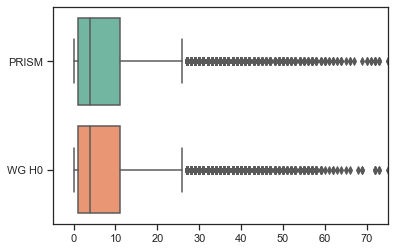

In [331]:
ax = sns.boxplot(data=CompAug4, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [332]:
sns.set(style="white", color_codes=True)

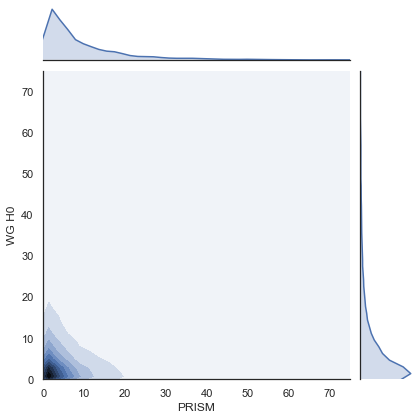

In [333]:
AugG4 = sns.jointplot(x='PRISM', y='WG H0', data=CompAug4, kind="kde", xlim=(0,75), ylim=(0,75))

## Sep

In [334]:
MonthInd = 9

In [335]:
# get lists of CMIP5 grid cells for this month
SepR1List = list()
SepR2List = list()
SepR3List = list()
SepR4List = list()
for gG in LOCA_KEYS:
    MonDict = LOCA_GRID_MAP[gG]
    tRegion = MonDict[MonthInd]
    if tRegion == 1:
        SepR1List.append( gG )
    elif tRegion == 2:
        SepR2List.append( gG )
    elif tRegion == 3:
        SepR3List.append( gG )
    elif tRegion == 4:
        SepR4List.append( gG )
#end for

In [336]:
PrSep1 = PRSepDF[PRSepDF['Region_Id'] == 1].copy()
PrSep2 = PRSepDF[PRSepDF['Region_Id'] == 2].copy()
PrSep3 = PRSepDF[PRSepDF['Region_Id'] == 3].copy()
PrSep4 = PRSepDF[PRSepDF['Region_Id'] == 4].copy()

In [337]:
H0Sep1 = H0SepDF[H0SepDF['Grid_Id'].isin(SepR1List)].copy()
H0Sep2 = H0SepDF[H0SepDF['Grid_Id'].isin(SepR2List)].copy()
H0Sep3 = H0SepDF[H0SepDF['Grid_Id'].isin(SepR3List)].copy()
H0Sep4 = H0SepDF[H0SepDF['Grid_Id'].isin(SepR4List)].copy()

In [338]:
len( H0SepDF ), len( H0Sep1 ) + len( H0Sep2 ) + len( H0Sep3 ) + len( H0Sep4 )

(44940962, 44940962)

In [339]:
len( PRSepDF ), len( PrSep1 ) + len( PrSep2 ) + len( PrSep3 ) + len( PrSep4 )

(38721, 38721)

First get our overall tracking values

In [340]:
AveLister.append( [ PRSepDF['Precip_mm'].mean(), H0SepDF['PDepth_mm'].mean(), 
                    PrSep1['Precip_mm'].mean(), H0Sep1['PDepth_mm'].mean(),
                    PrSep2['Precip_mm'].mean(), H0Sep2['PDepth_mm'].mean(),
                    PrSep3['Precip_mm'].mean(), H0Sep3['PDepth_mm'].mean(),
                    PrSep4['Precip_mm'].mean(), H0Sep4['PDepth_mm'].mean() ] )
VarLister.append( [ PRSepDF['Precip_mm'].var(), H0SepDF['PDepth_mm'].var(),
                    PrSep1['Precip_mm'].var(), H0Sep1['PDepth_mm'].var(),
                    PrSep2['Precip_mm'].var(), H0Sep2['PDepth_mm'].var(),
                    PrSep3['Precip_mm'].var(), H0Sep3['PDepth_mm'].var(),
                    PrSep4['Precip_mm'].var(), H0Sep4['PDepth_mm'].var() ] )
SkewLister.append( [ PRSepDF['Precip_mm'].skew(), H0SepDF['PDepth_mm'].skew(),
                    PrSep1['Precip_mm'].skew(), H0Sep1['PDepth_mm'].skew(),
                    PrSep2['Precip_mm'].skew(), H0Sep2['PDepth_mm'].skew(),
                    PrSep3['Precip_mm'].skew(), H0Sep3['PDepth_mm'].skew(),
                    PrSep4['Precip_mm'].skew(), H0Sep4['PDepth_mm'].skew() ] )
KurtLister.append( [ PRSepDF['Precip_mm'].kurtosis(), H0SepDF['PDepth_mm'].kurtosis(),
                    PrSep1['Precip_mm'].kurtosis(), H0Sep1['PDepth_mm'].kurtosis(),
                    PrSep2['Precip_mm'].kurtosis(), H0Sep2['PDepth_mm'].kurtosis(),
                    PrSep3['Precip_mm'].kurtosis(), H0Sep3['PDepth_mm'].kurtosis(),
                    PrSep4['Precip_mm'].kurtosis(), H0Sep4['PDepth_mm'].kurtosis() ] )
CntLister.append( [ PRSepDF['Precip_mm'].count(), H0SepDF['PDepth_mm'].count(), 
                    PrSep1['Precip_mm'].count(), H0Sep1['PDepth_mm'].count(),
                    PrSep2['Precip_mm'].count(), H0Sep2['PDepth_mm'].count(),
                    PrSep3['Precip_mm'].count(), H0Sep3['PDepth_mm'].count(),
                    PrSep4['Precip_mm'].count(), H0Sep4['PDepth_mm'].count() ] )
MedianLister.append( [ PRSepDF['Precip_mm'].median(), H0SepDF['PDepth_mm'].median(), 
                    PrSep1['Precip_mm'].median(), H0Sep1['PDepth_mm'].median(),
                    PrSep2['Precip_mm'].median(), H0Sep2['PDepth_mm'].median(),
                    PrSep3['Precip_mm'].median(), H0Sep3['PDepth_mm'].median(),
                    PrSep4['Precip_mm'].median(), H0Sep4['PDepth_mm'].median() ] )
MaxLister.append( [ PRSepDF['Precip_mm'].max(), H0SepDF['PDepth_mm'].max(), 
                    PrSep1['Precip_mm'].max(), H0Sep1['PDepth_mm'].max(),
                    PrSep2['Precip_mm'].max(), H0Sep2['PDepth_mm'].max(),
                    PrSep3['Precip_mm'].max(), H0Sep3['PDepth_mm'].max(),
                    PrSep4['Precip_mm'].max(), H0Sep4['PDepth_mm'].max() ] )
MinLister.append( [ PRSepDF['Precip_mm'].min(), H0SepDF['PDepth_mm'].min(), 
                    PrSep1['Precip_mm'].min(), H0Sep1['PDepth_mm'].min(),
                    PrSep2['Precip_mm'].min(), H0Sep2['PDepth_mm'].min(),
                    PrSep3['Precip_mm'].min(), H0Sep3['PDepth_mm'].min(),
                    PrSep4['Precip_mm'].min(), H0Sep4['PDepth_mm'].min() ] )

In [341]:
NumPR1 = len( PrSep1 )
NumH01 = len( H0Sep1 )
NumPR1, NumH01

(3495, 2042771)

In [342]:
NumPR2 = len( PrSep2 )
NumH02 = len( H0Sep2 )
NumPR2, NumH02

(12597, 12256626)

In [343]:
NumPR3 = len( PrSep3 )
NumH03 = len( H0Sep3 )
NumPR3, NumH03

(8070, 16342168)

In [344]:
NumPR4 = len( PrSep4 )
NumH04 = len( H0Sep4 )
NumPR4, NumH04

(14559, 14299397)

In [345]:
CompSep1 = pd.DataFrame( data={ 'PRISM' : np.array( PrSep1['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Sep1['PDepth_mm'].sample(n=NumPR1), 
                                                  dtype=np.int32 ), } )

In [346]:
CompSep2 = pd.DataFrame( data={ 'PRISM' : np.array( PrSep2['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Sep2['PDepth_mm'].sample(n=NumPR2), 
                                                  dtype=np.int32 ), } )

In [347]:
CompSep3 = pd.DataFrame( data={ 'PRISM' : np.array( PrSep3['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Sep3['PDepth_mm'].sample(n=NumPR3), 
                                                  dtype=np.int32 ), } )

In [348]:
CompSep4 = pd.DataFrame( data={ 'PRISM' : np.array( PrSep4['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Sep4['PDepth_mm'].sample(n=NumPR4), 
                                                  dtype=np.int32 ), } )

In [349]:
display( HTML( CompSep1.describe().to_html() ) )

In [350]:
display( HTML( CompSep2.describe().to_html() ) )

In [351]:
display( HTML( CompSep3.describe().to_html() ) )

In [352]:
display( HTML( CompSep4.describe().to_html() ) )

In [353]:
PRQs1 = CompSep1['PRISM'].quantile( q=OurQs )
H0Qs1 = CompSep1['WG H0'].quantile( q=OurQs )

In [354]:
PRQs2 = CompSep2['PRISM'].quantile( q=OurQs )
H0Qs2 = CompSep2['WG H0'].quantile( q=OurQs )

In [355]:
PRQs3 = CompSep3['PRISM'].quantile( q=OurQs )
H0Qs3 = CompSep3['WG H0'].quantile( q=OurQs )

In [356]:
PRQs4 = CompSep4['PRISM'].quantile( q=OurQs )
H0Qs4 = CompSep4['WG H0'].quantile( q=OurQs )

### R1 Plots

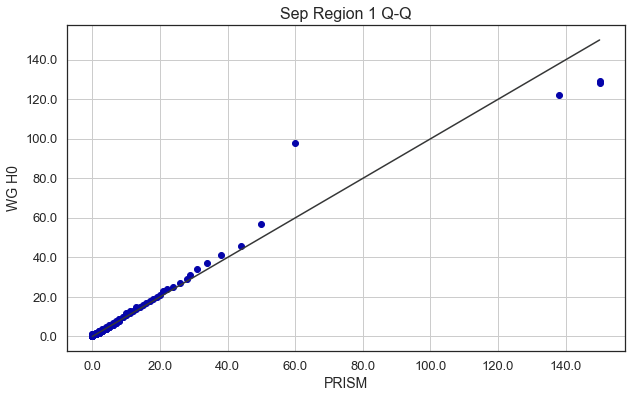

In [357]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs1.values, H0Qs1.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs1.values.max(), H0Qs1.values.max())], 
           [0.0, max( PRQs1.values.max(), H0Qs1.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Sep Region 1 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [358]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

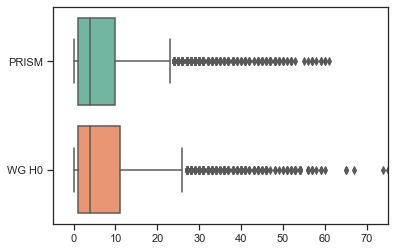

In [359]:
ax = sns.boxplot(data=CompSep1, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [360]:
sns.set(style="white", color_codes=True)

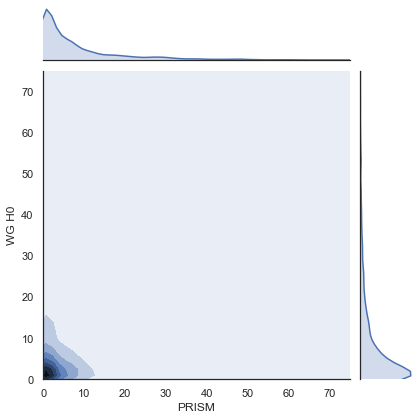

In [361]:
SepG1 = sns.jointplot(x='PRISM', y='WG H0', data=CompSep1, kind="kde", xlim=(0,75), ylim=(0,75))

### R2 Plots

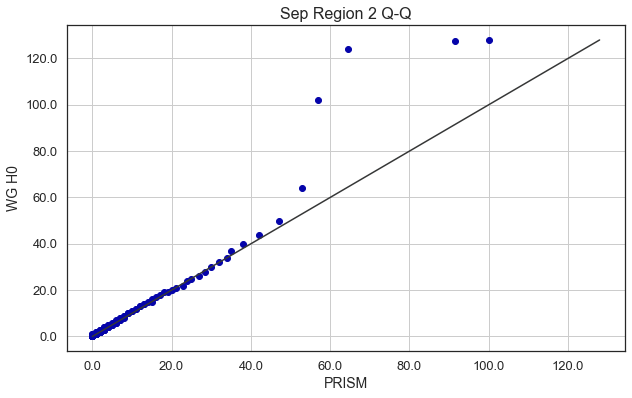

In [362]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs2.values, H0Qs2.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs2.values.max(), H0Qs2.values.max())], 
           [0.0, max( PRQs2.values.max(), H0Qs2.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Sep Region 2 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [363]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

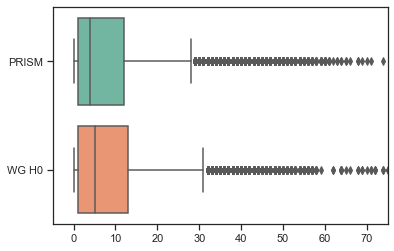

In [364]:
ax = sns.boxplot(data=CompSep2, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [365]:
sns.set(style="white", color_codes=True)

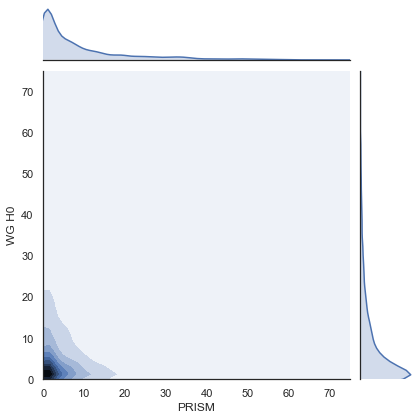

In [366]:
SepG2 = sns.jointplot(x='PRISM', y='WG H0', data=CompSep2, kind="kde", xlim=(0,75), ylim=(0,75))

### R3 Plots

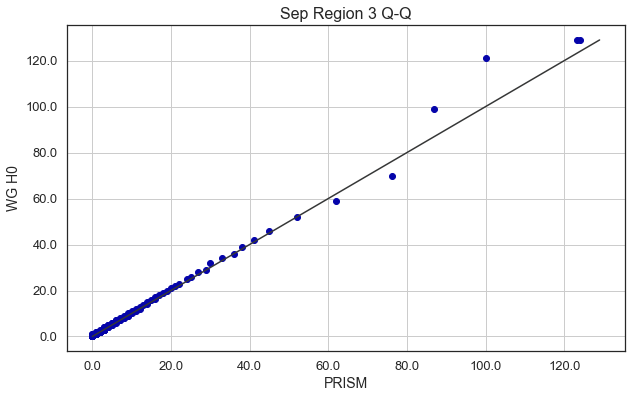

In [367]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs3.values, H0Qs3.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs3.values.max(), H0Qs3.values.max())], 
           [0.0, max( PRQs3.values.max(), H0Qs3.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Sep Region 3 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [368]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

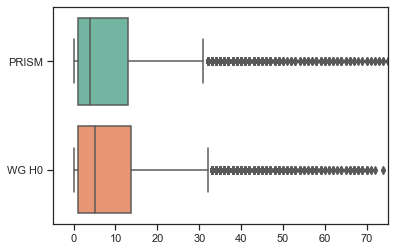

In [369]:
ax = sns.boxplot(data=CompSep3, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [370]:
sns.set(style="white", color_codes=True)

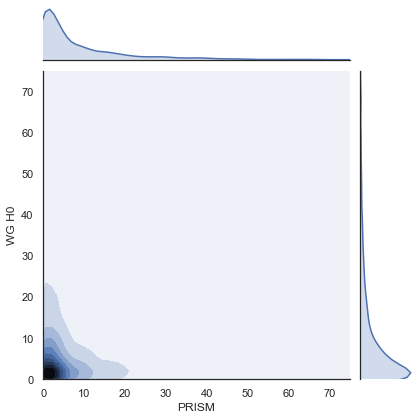

In [371]:
SepG3 = sns.jointplot(x='PRISM', y='WG H0', data=CompSep3, kind="kde", xlim=(0,75), ylim=(0,75))

### R4 Plots

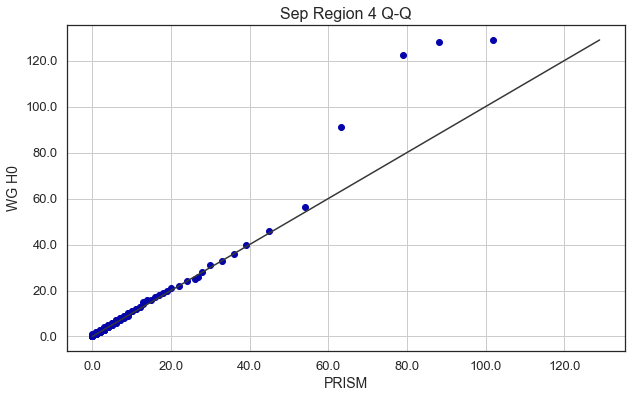

In [372]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs4.values, H0Qs4.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs4.values.max(), H0Qs4.values.max())], 
           [0.0, max( PRQs4.values.max(), H0Qs4.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Sep Region 4 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [373]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

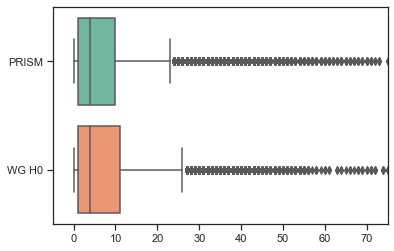

In [374]:
ax = sns.boxplot(data=CompSep4, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [375]:
sns.set(style="white", color_codes=True)

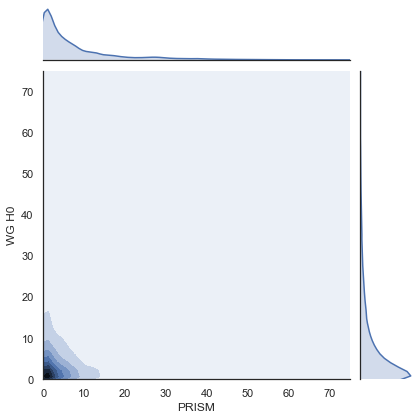

In [376]:
SepG4 = sns.jointplot(x='PRISM', y='WG H0', data=CompSep4, kind="kde", xlim=(0,75), ylim=(0,75))

## Oct

In [377]:
MonthInd = 10

In [378]:
# get lists of CMIP5 grid cells for this month
OctR1List = list()
OctR2List = list()
OctR3List = list()
OctR4List = list()
for gG in LOCA_KEYS:
    MonDict = LOCA_GRID_MAP[gG]
    tRegion = MonDict[MonthInd]
    if tRegion == 1:
        OctR1List.append( gG )
    elif tRegion == 2:
        OctR2List.append( gG )
    elif tRegion == 3:
        OctR3List.append( gG )
    elif tRegion == 4:
        OctR4List.append( gG )
#end for

In [379]:
PrOct1 = PROctDF[PROctDF['Region_Id'] == 1].copy()
PrOct2 = PROctDF[PROctDF['Region_Id'] == 2].copy()
PrOct3 = PROctDF[PROctDF['Region_Id'] == 3].copy()
PrOct4 = PROctDF[PROctDF['Region_Id'] == 4].copy()

In [380]:
H0Oct1 = H0OctDF[H0OctDF['Grid_Id'].isin(OctR1List)].copy()
H0Oct2 = H0OctDF[H0OctDF['Grid_Id'].isin(OctR2List)].copy()
H0Oct3 = H0OctDF[H0OctDF['Grid_Id'].isin(OctR3List)].copy()
H0Oct4 = H0OctDF[H0OctDF['Grid_Id'].isin(OctR4List)].copy()

In [381]:
len( H0OctDF ), len( H0Oct1 ) + len( H0Oct2 ) + len( H0Oct3 ) + len( H0Oct4 )

(43869650, 43869650)

In [382]:
len( PROctDF ), len( PrOct1 ) + len( PrOct2 ) + len( PrOct3 ) + len( PrOct4 )

(42270, 42270)

First get our overall tracking values

In [383]:
AveLister.append( [ PROctDF['Precip_mm'].mean(), H0OctDF['PDepth_mm'].mean(), 
                    PrOct1['Precip_mm'].mean(), H0Oct1['PDepth_mm'].mean(),
                    PrOct2['Precip_mm'].mean(), H0Oct2['PDepth_mm'].mean(),
                    PrOct3['Precip_mm'].mean(), H0Oct3['PDepth_mm'].mean(),
                    PrOct4['Precip_mm'].mean(), H0Oct4['PDepth_mm'].mean() ] )
VarLister.append( [ PROctDF['Precip_mm'].var(), H0OctDF['PDepth_mm'].var(),
                    PrOct1['Precip_mm'].var(), H0Oct1['PDepth_mm'].var(),
                    PrOct2['Precip_mm'].var(), H0Oct2['PDepth_mm'].var(),
                    PrOct3['Precip_mm'].var(), H0Oct3['PDepth_mm'].var(),
                    PrOct4['Precip_mm'].var(), H0Oct4['PDepth_mm'].var() ] )
SkewLister.append( [ PROctDF['Precip_mm'].skew(), H0OctDF['PDepth_mm'].skew(),
                    PrOct1['Precip_mm'].skew(), H0Oct1['PDepth_mm'].skew(),
                    PrOct2['Precip_mm'].skew(), H0Oct2['PDepth_mm'].skew(),
                    PrOct3['Precip_mm'].skew(), H0Oct3['PDepth_mm'].skew(),
                    PrOct4['Precip_mm'].skew(), H0Oct4['PDepth_mm'].skew() ] )
KurtLister.append( [ PROctDF['Precip_mm'].kurtosis(), H0OctDF['PDepth_mm'].kurtosis(),
                    PrOct1['Precip_mm'].kurtosis(), H0Oct1['PDepth_mm'].kurtosis(),
                    PrOct2['Precip_mm'].kurtosis(), H0Oct2['PDepth_mm'].kurtosis(),
                    PrOct3['Precip_mm'].kurtosis(), H0Oct3['PDepth_mm'].kurtosis(),
                    PrOct4['Precip_mm'].kurtosis(), H0Oct4['PDepth_mm'].kurtosis() ] )
CntLister.append( [ PROctDF['Precip_mm'].count(), H0OctDF['PDepth_mm'].count(), 
                    PrOct1['Precip_mm'].count(), H0Oct1['PDepth_mm'].count(),
                    PrOct2['Precip_mm'].count(), H0Oct2['PDepth_mm'].count(),
                    PrOct3['Precip_mm'].count(), H0Oct3['PDepth_mm'].count(),
                    PrOct4['Precip_mm'].count(), H0Oct4['PDepth_mm'].count() ] )
MedianLister.append( [ PROctDF['Precip_mm'].median(), H0OctDF['PDepth_mm'].median(), 
                    PrOct1['Precip_mm'].median(), H0Oct1['PDepth_mm'].median(),
                    PrOct2['Precip_mm'].median(), H0Oct2['PDepth_mm'].median(),
                    PrOct3['Precip_mm'].median(), H0Oct3['PDepth_mm'].median(),
                    PrOct4['Precip_mm'].median(), H0Oct4['PDepth_mm'].median() ] )
MaxLister.append( [ PROctDF['Precip_mm'].max(), H0OctDF['PDepth_mm'].max(), 
                    PrOct1['Precip_mm'].max(), H0Oct1['PDepth_mm'].max(),
                    PrOct2['Precip_mm'].max(), H0Oct2['PDepth_mm'].max(),
                    PrOct3['Precip_mm'].max(), H0Oct3['PDepth_mm'].max(),
                    PrOct4['Precip_mm'].max(), H0Oct4['PDepth_mm'].max() ] )
MinLister.append( [ PROctDF['Precip_mm'].min(), H0OctDF['PDepth_mm'].min(), 
                    PrOct1['Precip_mm'].min(), H0Oct1['PDepth_mm'].min(),
                    PrOct2['Precip_mm'].min(), H0Oct2['PDepth_mm'].min(),
                    PrOct3['Precip_mm'].min(), H0Oct3['PDepth_mm'].min(),
                    PrOct4['Precip_mm'].min(), H0Oct4['PDepth_mm'].min() ] )

In [384]:
NumPR1 = len( PrOct1 )
NumH01 = len( H0Oct1 )
NumPR1, NumH01

(13818, 23928900)

In [385]:
NumPR2 = len( PrOct2 )
NumH02 = len( H0Oct2 )
NumPR2, NumH02

(8693, 3988150)

In [386]:
NumPR3 = len( PrOct3 )
NumH03 = len( H0Oct3 )
NumPR3, NumH03

(11257, 7976300)

In [387]:
NumPR4 = len( PrOct4 )
NumH04 = len( H0Oct4 )
NumPR4, NumH04

(8502, 7976300)

In [388]:
CompOct1 = pd.DataFrame( data={ 'PRISM' : np.array( PrOct1['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Oct1['PDepth_mm'].sample(n=NumPR1), 
                                                  dtype=np.int32 ), } )

In [389]:
CompOct2 = pd.DataFrame( data={ 'PRISM' : np.array( PrOct2['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Oct2['PDepth_mm'].sample(n=NumPR2), 
                                                  dtype=np.int32 ), } )

In [390]:
CompOct3 = pd.DataFrame( data={ 'PRISM' : np.array( PrOct3['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Oct3['PDepth_mm'].sample(n=NumPR3), 
                                                  dtype=np.int32 ), } )

In [391]:
CompOct4 = pd.DataFrame( data={ 'PRISM' : np.array( PrOct4['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Oct4['PDepth_mm'].sample(n=NumPR4), 
                                                  dtype=np.int32 ), } )

In [392]:
display( HTML( CompOct1.describe().to_html() ) )

In [393]:
display( HTML( CompOct2.describe().to_html() ) )

In [394]:
display( HTML( CompOct3.describe().to_html() ) )

In [395]:
display( HTML( CompOct4.describe().to_html() ) )

In [396]:
PRQs1 = CompOct1['PRISM'].quantile( q=OurQs )
H0Qs1 = CompOct1['WG H0'].quantile( q=OurQs )

In [397]:
PRQs2 = CompOct2['PRISM'].quantile( q=OurQs )
H0Qs2 = CompOct2['WG H0'].quantile( q=OurQs )

In [398]:
PRQs3 = CompOct3['PRISM'].quantile( q=OurQs )
H0Qs3 = CompOct3['WG H0'].quantile( q=OurQs )

In [399]:
PRQs4 = CompOct4['PRISM'].quantile( q=OurQs )
H0Qs4 = CompOct4['WG H0'].quantile( q=OurQs )

### R1 Plots

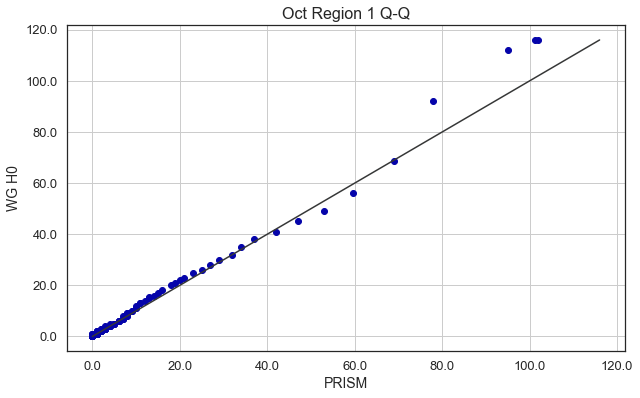

In [400]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs1.values, H0Qs1.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs1.values.max(), H0Qs1.values.max())], 
           [0.0, max( PRQs1.values.max(), H0Qs1.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Oct Region 1 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [401]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

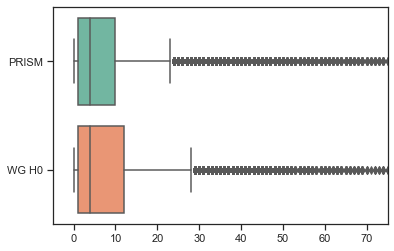

In [402]:
ax = sns.boxplot(data=CompOct1, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [403]:
sns.set(style="white", color_codes=True)

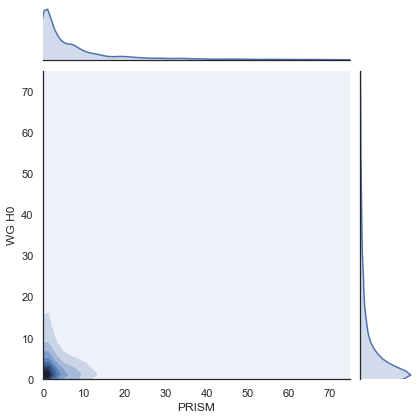

In [404]:
OctG1 = sns.jointplot(x='PRISM', y='WG H0', data=CompOct1, kind="kde", xlim=(0,75), ylim=(0,75))

### R2 Plots

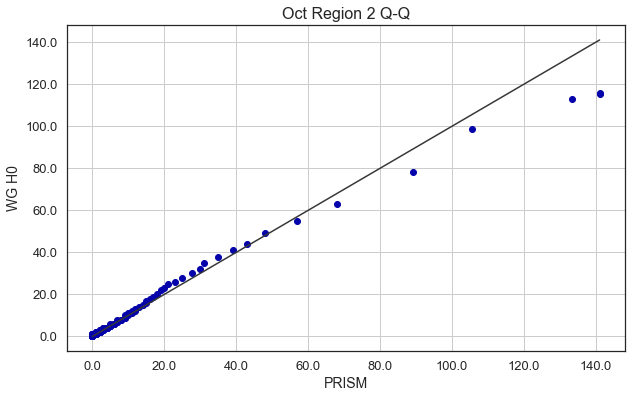

In [405]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs2.values, H0Qs2.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs2.values.max(), H0Qs2.values.max())], 
           [0.0, max( PRQs2.values.max(), H0Qs2.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Oct Region 2 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [406]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

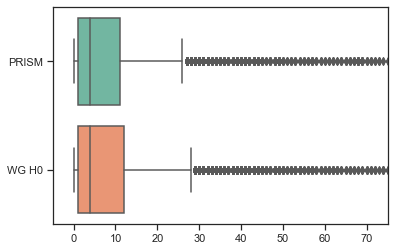

In [407]:
ax = sns.boxplot(data=CompOct2, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [408]:
sns.set(style="white", color_codes=True)

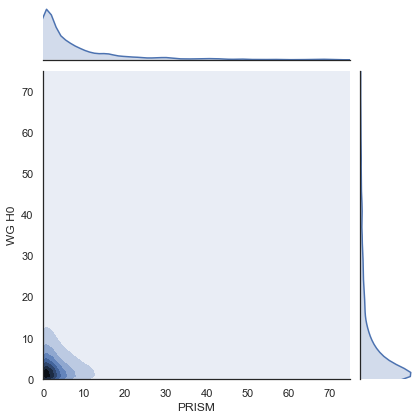

In [409]:
OctG2 = sns.jointplot(x='PRISM', y='WG H0', data=CompOct2, kind="kde", xlim=(0,75), ylim=(0,75))

### R3 Plots

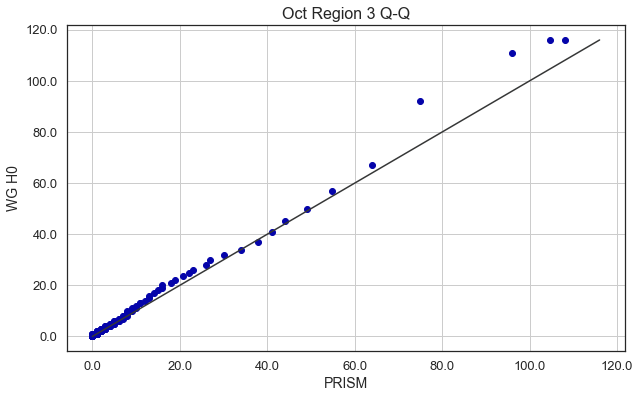

In [410]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs3.values, H0Qs3.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs3.values.max(), H0Qs3.values.max())], 
           [0.0, max( PRQs3.values.max(), H0Qs3.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Oct Region 3 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [411]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

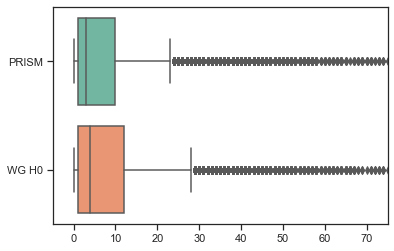

In [412]:
ax = sns.boxplot(data=CompOct3, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [413]:
sns.set(style="white", color_codes=True)

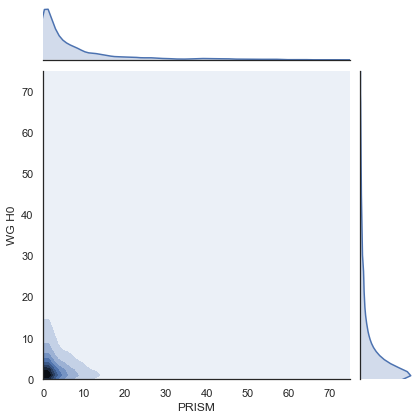

In [414]:
OctG3 = sns.jointplot(x='PRISM', y='WG H0', data=CompOct3, kind="kde", xlim=(0,75), ylim=(0,75))

### R4 Plots

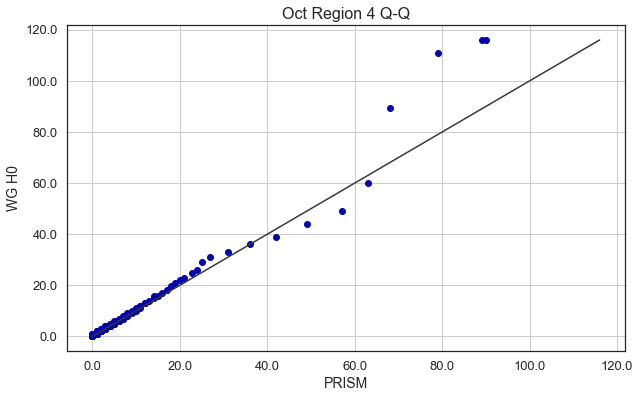

In [415]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs4.values, H0Qs4.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs4.values.max(), H0Qs4.values.max())], 
           [0.0, max( PRQs4.values.max(), H0Qs4.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Oct Region 4 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [416]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

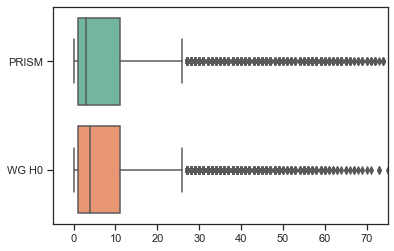

In [417]:
ax = sns.boxplot(data=CompOct4, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [418]:
sns.set(style="white", color_codes=True)

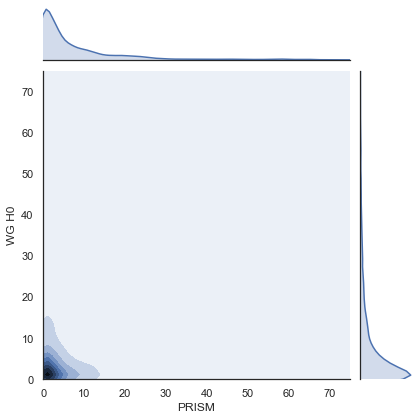

In [419]:
OctG4 = sns.jointplot(x='PRISM', y='WG H0', data=CompOct4, kind="kde", xlim=(0,75), ylim=(0,75))

## Nov

In [420]:
MonthInd = 11

In [421]:
# get lists of CMIP5 grid cells for this month
NovR1List = list()
NovR2List = list()
NovR3List = list()
NovR4List = list()
for gG in LOCA_KEYS:
    MonDict = LOCA_GRID_MAP[gG]
    tRegion = MonDict[MonthInd]
    if tRegion == 1:
        NovR1List.append( gG )
    elif tRegion == 2:
        NovR2List.append( gG )
    elif tRegion == 3:
        NovR3List.append( gG )
    elif tRegion == 4:
        NovR4List.append( gG )
#end for

In [422]:
PrNov1 = PRNovDF[PRNovDF['Region_Id'] == 1].copy()
PrNov2 = PRNovDF[PRNovDF['Region_Id'] == 2].copy()
PrNov3 = PRNovDF[PRNovDF['Region_Id'] == 3].copy()
PrNov4 = PRNovDF[PRNovDF['Region_Id'] == 4].copy()

In [423]:
H0Nov1 = H0NovDF[H0NovDF['Grid_Id'].isin(NovR1List)].copy()
H0Nov2 = H0NovDF[H0NovDF['Grid_Id'].isin(NovR2List)].copy()
H0Nov3 = H0NovDF[H0NovDF['Grid_Id'].isin(NovR3List)].copy()
H0Nov4 = H0NovDF[H0NovDF['Grid_Id'].isin(NovR4List)].copy()

In [424]:
len( H0NovDF ), len( H0Nov1 ) + len( H0Nov2 ) + len( H0Nov3 ) + len( H0Nov4 )

(34090078, 34090078)

In [425]:
len( PRNovDF ), len( PrNov1 ) + len( PrNov2 ) + len( PrNov3 ) + len( PrNov4 )

(26792, 26792)

First get our overall tracking values

In [426]:
AveLister.append( [ PRNovDF['Precip_mm'].mean(), H0NovDF['PDepth_mm'].mean(), 
                    PrNov1['Precip_mm'].mean(), H0Nov1['PDepth_mm'].mean(),
                    PrNov2['Precip_mm'].mean(), H0Nov2['PDepth_mm'].mean(),
                    PrNov3['Precip_mm'].mean(), H0Nov3['PDepth_mm'].mean(),
                    PrNov4['Precip_mm'].mean(), H0Nov4['PDepth_mm'].mean() ] )
VarLister.append( [ PRNovDF['Precip_mm'].var(), H0NovDF['PDepth_mm'].var(),
                    PrNov1['Precip_mm'].var(), H0Nov1['PDepth_mm'].var(),
                    PrNov2['Precip_mm'].var(), H0Nov2['PDepth_mm'].var(),
                    PrNov3['Precip_mm'].var(), H0Nov3['PDepth_mm'].var(),
                    PrNov4['Precip_mm'].var(), H0Nov4['PDepth_mm'].var() ] )
SkewLister.append( [ PRNovDF['Precip_mm'].skew(), H0NovDF['PDepth_mm'].skew(),
                    PrNov1['Precip_mm'].skew(), H0Nov1['PDepth_mm'].skew(),
                    PrNov2['Precip_mm'].skew(), H0Nov2['PDepth_mm'].skew(),
                    PrNov3['Precip_mm'].skew(), H0Nov3['PDepth_mm'].skew(),
                    PrNov4['Precip_mm'].skew(), H0Nov4['PDepth_mm'].skew() ] )
KurtLister.append( [ PRNovDF['Precip_mm'].kurtosis(), H0NovDF['PDepth_mm'].kurtosis(),
                    PrNov1['Precip_mm'].kurtosis(), H0Nov1['PDepth_mm'].kurtosis(),
                    PrNov2['Precip_mm'].kurtosis(), H0Nov2['PDepth_mm'].kurtosis(),
                    PrNov3['Precip_mm'].kurtosis(), H0Nov3['PDepth_mm'].kurtosis(),
                    PrNov4['Precip_mm'].kurtosis(), H0Nov4['PDepth_mm'].kurtosis() ] )
CntLister.append( [ PRNovDF['Precip_mm'].count(), H0NovDF['PDepth_mm'].count(), 
                    PrNov1['Precip_mm'].count(), H0Nov1['PDepth_mm'].count(),
                    PrNov2['Precip_mm'].count(), H0Nov2['PDepth_mm'].count(),
                    PrNov3['Precip_mm'].count(), H0Nov3['PDepth_mm'].count(),
                    PrNov4['Precip_mm'].count(), H0Nov4['PDepth_mm'].count() ] )
MedianLister.append( [ PRNovDF['Precip_mm'].median(), H0NovDF['PDepth_mm'].median(), 
                    PrNov1['Precip_mm'].median(), H0Nov1['PDepth_mm'].median(),
                    PrNov2['Precip_mm'].median(), H0Nov2['PDepth_mm'].median(),
                    PrNov3['Precip_mm'].median(), H0Nov3['PDepth_mm'].median(),
                    PrNov4['Precip_mm'].median(), H0Nov4['PDepth_mm'].median() ] )
MaxLister.append( [ PRNovDF['Precip_mm'].max(), H0NovDF['PDepth_mm'].max(), 
                    PrNov1['Precip_mm'].max(), H0Nov1['PDepth_mm'].max(),
                    PrNov2['Precip_mm'].max(), H0Nov2['PDepth_mm'].max(),
                    PrNov3['Precip_mm'].max(), H0Nov3['PDepth_mm'].max(),
                    PrNov4['Precip_mm'].max(), H0Nov4['PDepth_mm'].max() ] )
MinLister.append( [ PRNovDF['Precip_mm'].min(), H0NovDF['PDepth_mm'].min(), 
                    PrNov1['Precip_mm'].min(), H0Nov1['PDepth_mm'].min(),
                    PrNov2['Precip_mm'].min(), H0Nov2['PDepth_mm'].min(),
                    PrNov3['Precip_mm'].min(), H0Nov3['PDepth_mm'].min(),
                    PrNov4['Precip_mm'].min(), H0Nov4['PDepth_mm'].min() ] )

In [427]:
NumPR1 = len( PrNov1 )
NumH01 = len( H0Nov1 )
NumPR1, NumH01

(12744, 23243235)

In [428]:
NumPR2 = len( PrNov2 )
NumH02 = len( H0Nov2 )
NumPR2, NumH02

(4295, 0)

In [429]:
NumPR3 = len( PrNov3 )
NumH03 = len( H0Nov3 )
NumPR3, NumH03

(5286, 7747745)

In [430]:
NumPR4 = len( PrNov4 )
NumH04 = len( H0Nov4 )
NumPR4, NumH04

(4467, 3099098)

In [431]:
CompNov1 = pd.DataFrame( data={ 'PRISM' : np.array( PrNov1['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Nov1['PDepth_mm'].sample(n=NumPR1), 
                                                  dtype=np.int32 ), } )

In [432]:
#CompNov2 = pd.DataFrame( data={ 'PRISM' : np.array( PrNov2['Precip_mm'], dtype=np.int32),
#                                "WG H0" : np.array( H0Nov2['PDepth_mm'].sample(n=NumPR2), 
#                                                  dtype=np.int32 ), } )

In [433]:
CompNov3 = pd.DataFrame( data={ 'PRISM' : np.array( PrNov3['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Nov3['PDepth_mm'].sample(n=NumPR3), 
                                                  dtype=np.int32 ), } )

In [434]:
CompNov4 = pd.DataFrame( data={ 'PRISM' : np.array( PrNov4['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Nov4['PDepth_mm'].sample(n=NumPR4), 
                                                  dtype=np.int32 ), } )

In [435]:
display( HTML( CompNov1.describe().to_html() ) )

In [436]:
#display( HTML( CompNov2.describe().to_html() ) )

In [437]:
display( HTML( CompNov3.describe().to_html() ) )

In [438]:
display( HTML( CompNov4.describe().to_html() ) )

In [439]:
PRQs1 = CompNov1['PRISM'].quantile( q=OurQs )
H0Qs1 = CompNov1['WG H0'].quantile( q=OurQs )

In [440]:
#PRQs2 = CompNov2['PRISM'].quantile( q=OurQs )
#H0Qs2 = CompNov2['WG H0'].quantile( q=OurQs )

In [441]:
PRQs3 = CompNov3['PRISM'].quantile( q=OurQs )
H0Qs3 = CompNov3['WG H0'].quantile( q=OurQs )

In [442]:
PRQs4 = CompNov4['PRISM'].quantile( q=OurQs )
H0Qs4 = CompNov4['WG H0'].quantile( q=OurQs )

### R1 Plots

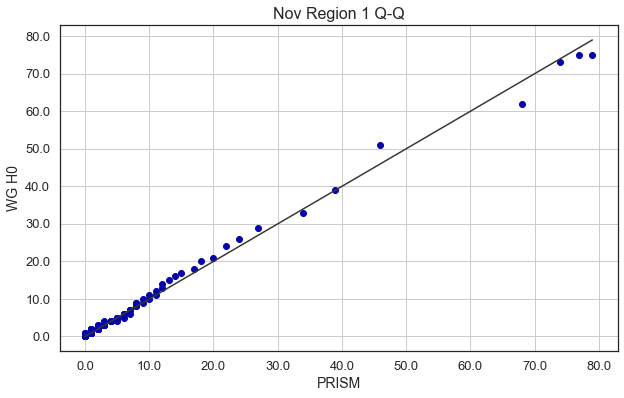

In [443]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs1.values, H0Qs1.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs1.values.max(), H0Qs1.values.max())], 
           [0.0, max( PRQs1.values.max(), H0Qs1.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Nov Region 1 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [444]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

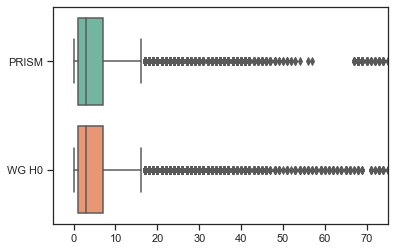

In [445]:
ax = sns.boxplot(data=CompNov1, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [446]:
sns.set(style="white", color_codes=True)

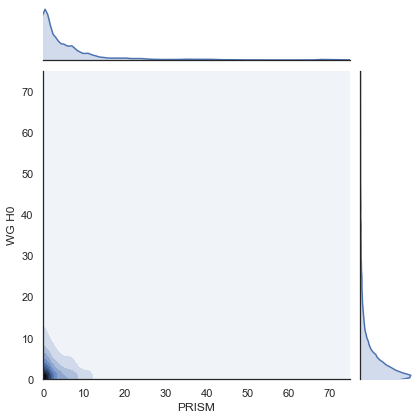

In [447]:
NovG1 = sns.jointplot(x='PRISM', y='WG H0', data=CompNov1, kind="kde", xlim=(0,75), ylim=(0,75))

### R2 Plots

### R3 Plots

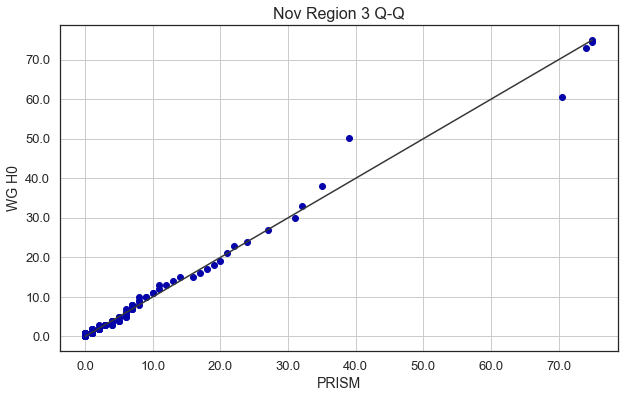

In [448]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs3.values, H0Qs3.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs3.values.max(), H0Qs3.values.max())], 
           [0.0, max( PRQs3.values.max(), H0Qs3.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Nov Region 3 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [449]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

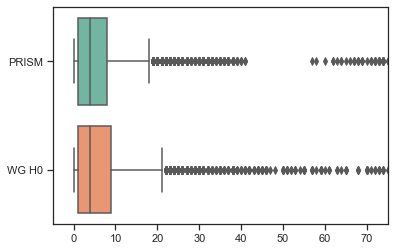

In [450]:
ax = sns.boxplot(data=CompNov3, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [451]:
sns.set(style="white", color_codes=True)

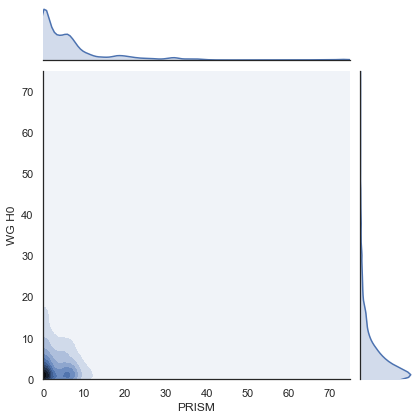

In [452]:
NovG3 = sns.jointplot(x='PRISM', y='WG H0', data=CompNov3, kind="kde", xlim=(0,75), ylim=(0,75))

### R4 Plots

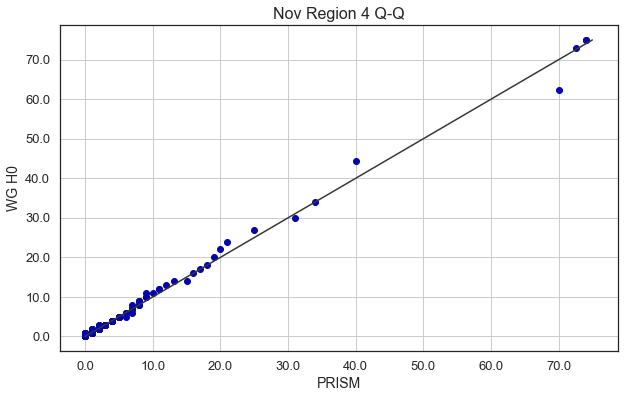

In [453]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs4.values, H0Qs4.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs4.values.max(), H0Qs4.values.max())], 
           [0.0, max( PRQs4.values.max(), H0Qs4.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Nov Region 4 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [454]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

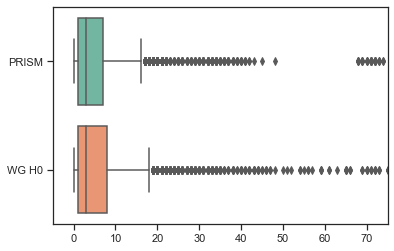

In [455]:
ax = sns.boxplot(data=CompNov4, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [456]:
sns.set(style="white", color_codes=True)

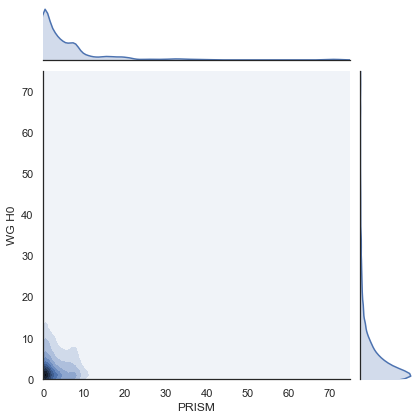

In [457]:
NovG4 = sns.jointplot(x='PRISM', y='WG H0', data=CompNov4, kind="kde", xlim=(0,75), ylim=(0,75))

## Dec

Need to divide up our input sets into the four regions

In [458]:
MonthInd = 12

In [459]:
# get lists of CMIP5 grid cells for this month
DecR1List = list()
DecR2List = list()
DecR3List = list()
DecR4List = list()
for gG in LOCA_KEYS:
    MonDict = LOCA_GRID_MAP[gG]
    tRegion = MonDict[MonthInd]
    if tRegion == 1:
        DecR1List.append( gG )
    elif tRegion == 2:
        DecR2List.append( gG )
    elif tRegion == 3:
        DecR3List.append( gG )
    elif tRegion == 4:
        DecR4List.append( gG )
#end for

In [460]:
PrDec1 = PRDecDF[PRDecDF['Region_Id'] == 1].copy()
PrDec2 = PRDecDF[PRDecDF['Region_Id'] == 2].copy()
PrDec3 = PRDecDF[PRDecDF['Region_Id'] == 3].copy()
PrDec4 = PRDecDF[PRDecDF['Region_Id'] == 4].copy()

In [461]:
H0Dec1 = H0DecDF[H0DecDF['Grid_Id'].isin(DecR1List)].copy()
H0Dec2 = H0DecDF[H0DecDF['Grid_Id'].isin(DecR2List)].copy()
H0Dec3 = H0DecDF[H0DecDF['Grid_Id'].isin(DecR3List)].copy()
H0Dec4 = H0DecDF[H0DecDF['Grid_Id'].isin(DecR4List)].copy()

In [462]:
len( H0DecDF ), len( H0Dec1 ) + len( H0Dec2 ) + len( H0Dec3 ) + len( H0Dec4 )

(33290488, 33290488)

In [463]:
len( PRDecDF ), len( PrDec1 ) + len( PrDec2 ) + len( PrDec3 ) + len( PrDec4 )

(25103, 25103)

First get our overall tracking values

In [464]:
AveLister.append( [ PRDecDF['Precip_mm'].mean(), H0DecDF['PDepth_mm'].mean(), 
                    PrDec1['Precip_mm'].mean(), H0Dec1['PDepth_mm'].mean(),
                    PrDec2['Precip_mm'].mean(), H0Dec2['PDepth_mm'].mean(),
                    PrDec3['Precip_mm'].mean(), H0Dec3['PDepth_mm'].mean(),
                    PrDec4['Precip_mm'].mean(), H0Dec4['PDepth_mm'].mean() ] )
VarLister.append( [ PRDecDF['Precip_mm'].var(), H0DecDF['PDepth_mm'].var(),
                    PrDec1['Precip_mm'].var(), H0Dec1['PDepth_mm'].var(),
                    PrDec2['Precip_mm'].var(), H0Dec2['PDepth_mm'].var(),
                    PrDec3['Precip_mm'].var(), H0Dec3['PDepth_mm'].var(),
                    PrDec4['Precip_mm'].var(), H0Dec4['PDepth_mm'].var() ] )
SkewLister.append( [ PRDecDF['Precip_mm'].skew(), H0DecDF['PDepth_mm'].skew(),
                    PrDec1['Precip_mm'].skew(), H0Dec1['PDepth_mm'].skew(),
                    PrDec2['Precip_mm'].skew(), H0Dec2['PDepth_mm'].skew(),
                    PrDec3['Precip_mm'].skew(), H0Dec3['PDepth_mm'].skew(),
                    PrDec4['Precip_mm'].skew(), H0Dec4['PDepth_mm'].skew() ] )
KurtLister.append( [ PRDecDF['Precip_mm'].kurtosis(), H0DecDF['PDepth_mm'].kurtosis(),
                    PrDec1['Precip_mm'].kurtosis(), H0Dec1['PDepth_mm'].kurtosis(),
                    PrDec2['Precip_mm'].kurtosis(), H0Dec2['PDepth_mm'].kurtosis(),
                    PrDec3['Precip_mm'].kurtosis(), H0Dec3['PDepth_mm'].kurtosis(),
                    PrDec4['Precip_mm'].kurtosis(), H0Dec4['PDepth_mm'].kurtosis() ] )
CntLister.append( [ PRDecDF['Precip_mm'].count(), H0DecDF['PDepth_mm'].count(), 
                    PrDec1['Precip_mm'].count(), H0Dec1['PDepth_mm'].count(),
                    PrDec2['Precip_mm'].count(), H0Dec2['PDepth_mm'].count(),
                    PrDec3['Precip_mm'].count(), H0Dec3['PDepth_mm'].count(),
                    PrDec4['Precip_mm'].count(), H0Dec4['PDepth_mm'].count() ] )
MedianLister.append( [ PRDecDF['Precip_mm'].median(), H0DecDF['PDepth_mm'].median(), 
                    PrDec1['Precip_mm'].median(), H0Dec1['PDepth_mm'].median(),
                    PrDec2['Precip_mm'].median(), H0Dec2['PDepth_mm'].median(),
                    PrDec3['Precip_mm'].median(), H0Dec3['PDepth_mm'].median(),
                    PrDec4['Precip_mm'].median(), H0Dec4['PDepth_mm'].median() ] )
MaxLister.append( [ PRDecDF['Precip_mm'].max(), H0DecDF['PDepth_mm'].max(), 
                    PrDec1['Precip_mm'].max(), H0Dec1['PDepth_mm'].max(),
                    PrDec2['Precip_mm'].max(), H0Dec2['PDepth_mm'].max(),
                    PrDec3['Precip_mm'].max(), H0Dec3['PDepth_mm'].max(),
                    PrDec4['Precip_mm'].max(), H0Dec4['PDepth_mm'].max() ] )
MinLister.append( [ PRDecDF['Precip_mm'].min(), H0DecDF['PDepth_mm'].min(), 
                    PrDec1['Precip_mm'].min(), H0Dec1['PDepth_mm'].min(),
                    PrDec2['Precip_mm'].min(), H0Dec2['PDepth_mm'].min(),
                    PrDec3['Precip_mm'].min(), H0Dec3['PDepth_mm'].min(),
                    PrDec4['Precip_mm'].min(), H0Dec4['PDepth_mm'].min() ] )

In [465]:
NumPR1 = len( PrDec1 )
NumH01 = len( H0Dec1 )
NumPR1, NumH01

(5864, 4539612)

In [466]:
NumPR2 = len( PrDec2 )
NumH02 = len( H0Dec2 )
NumPR2, NumH02

(2484, 0)

In [467]:
NumPR3 = len( PrDec3 )
NumH03 = len( H0Dec3 )
NumPR3, NumH03

(10178, 18158448)

In [468]:
NumPR4 = len( PrDec4 )
NumH04 = len( H0Dec4 )
NumPR4, NumH04

(6577, 10592428)

In [469]:
CompDec1 = pd.DataFrame( data={ 'PRISM' : np.array( PrDec1['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Dec1['PDepth_mm'].sample(n=NumPR1), 
                                                  dtype=np.int32 ), } )

In [470]:
#CompDec2 = pd.DataFrame( data={ 'PRISM' : np.array( PrDec2['Precip_mm'], dtype=np.int32),
#                                "WG H0" : np.array( H0Dec2['PDepth_mm'].sample(n=NumPR2), 
#                                                  dtype=np.int32 ), } )

In [471]:
CompDec3 = pd.DataFrame( data={ 'PRISM' : np.array( PrDec3['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Dec3['PDepth_mm'].sample(n=NumPR3), 
                                                  dtype=np.int32 ), } )

In [472]:
CompDec4 = pd.DataFrame( data={ 'PRISM' : np.array( PrDec4['Precip_mm'], dtype=np.int32),
                                "WG H0" : np.array( H0Dec4['PDepth_mm'].sample(n=NumPR4), 
                                                  dtype=np.int32 ), } )

In [473]:
display( HTML( CompDec1.describe().to_html() ) )

In [474]:
#display( HTML( CompDec2.describe().to_html() ) )

In [475]:
display( HTML( CompDec3.describe().to_html() ) )

In [476]:
display( HTML( CompDec4.describe().to_html() ) )

In [477]:
PRQs1 = CompDec1['PRISM'].quantile( q=OurQs )
H0Qs1 = CompDec1['WG H0'].quantile( q=OurQs )

In [478]:
#PRQs2 = CompDec2['PRISM'].quantile( q=OurQs )
#H0Qs2 = CompDec2['WG H0'].quantile( q=OurQs )

In [479]:
PRQs3 = CompDec3['PRISM'].quantile( q=OurQs )
H0Qs3 = CompDec3['WG H0'].quantile( q=OurQs )

In [480]:
PRQs4 = CompDec4['PRISM'].quantile( q=OurQs )
H0Qs4 = CompDec4['WG H0'].quantile( q=OurQs )

### R1 Plots

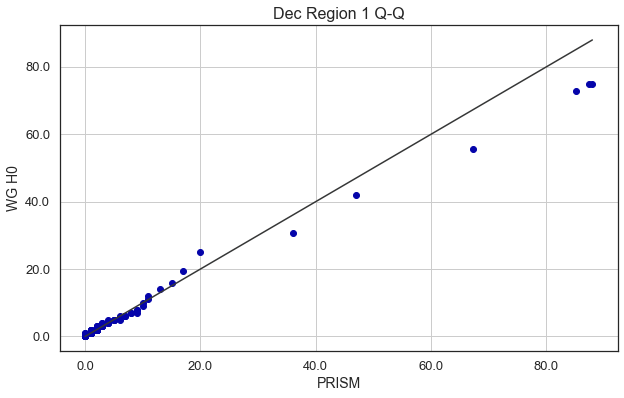

In [481]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs1.values, H0Qs1.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs1.values.max(), H0Qs1.values.max())], 
           [0.0, max( PRQs1.values.max(), H0Qs1.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Dec Region 1 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [482]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

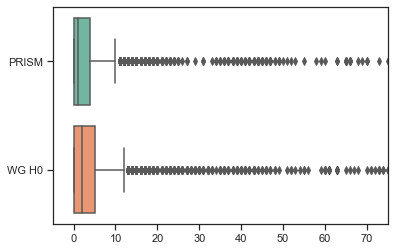

In [483]:
ax = sns.boxplot(data=CompDec1, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [484]:
sns.set(style="white", color_codes=True)

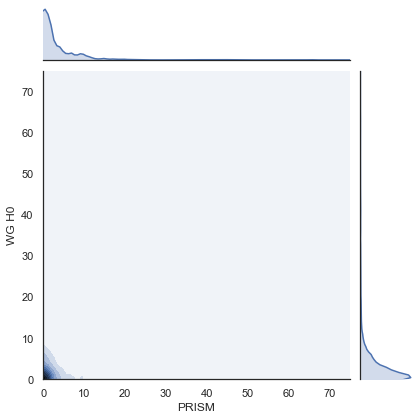

In [485]:
DecG1 = sns.jointplot(x='PRISM', y='WG H0', data=CompDec1, kind="kde", xlim=(0,75), ylim=(0,75))

### R2 Plots

### R3 Plots

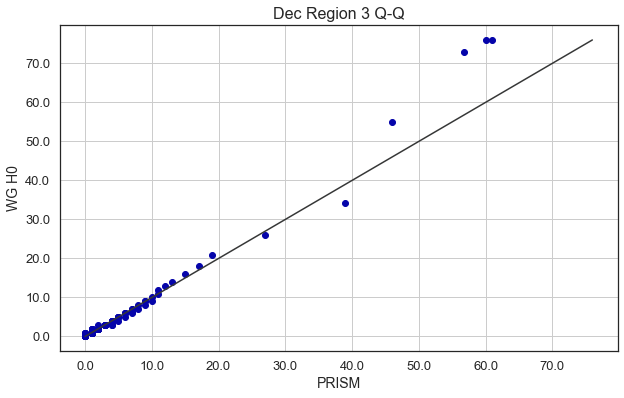

In [486]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs3.values, H0Qs3.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs3.values.max(), H0Qs3.values.max())], 
           [0.0, max( PRQs3.values.max(), H0Qs3.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Dec Region 3 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [487]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

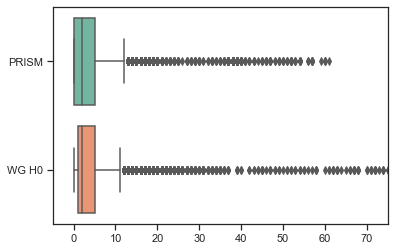

In [488]:
ax = sns.boxplot(data=CompDec3, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [489]:
sns.set(style="white", color_codes=True)

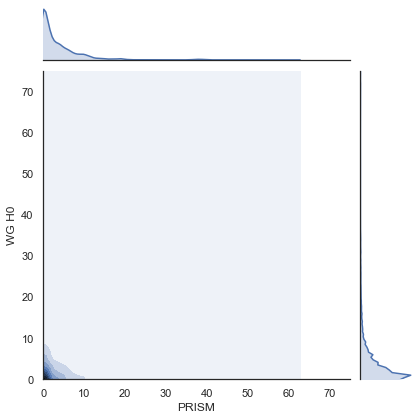

In [490]:
DecG3 = sns.jointplot(x='PRISM', y='WG H0', data=CompDec3, kind="kde", xlim=(0,75), ylim=(0,75))

### R4 Plots

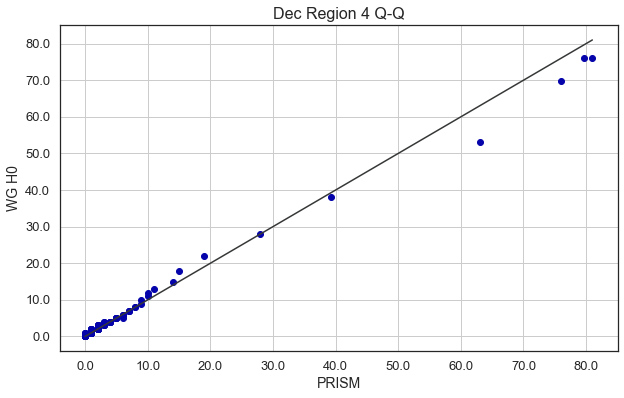

In [491]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs4.values, H0Qs4.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, max( PRQs4.values.max(), H0Qs4.values.max())], 
           [0.0, max( PRQs4.values.max(), H0Qs4.values.max())], 
           linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Dec Region 4 Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [492]:
sns.set(style="ticks", color_codes=True)

(-5.0, 75.0)

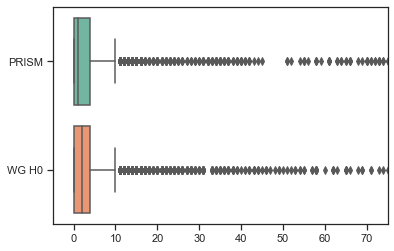

In [493]:
ax = sns.boxplot(data=CompDec4, orient="h", palette="Set2")
ax.set_xlim( (-5.0, 75.0) )

In [494]:
sns.set(style="white", color_codes=True)

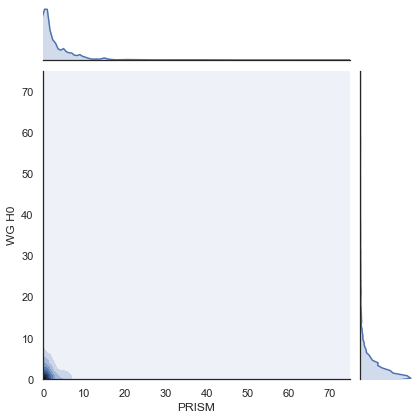

In [495]:
DecG4 = sns.jointplot(x='PRISM', y='WG H0', data=CompDec4, kind="kde", xlim=(0,75), ylim=(0,75))

## Output

Now collate all our summary calculations and regional percentiles and output to the spreadsheet.

In [496]:
DataDict = { MonthLister[0] : np.array( H0Jan1['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[1] : np.array( H0Feb1['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[2] : np.array( H0Mar1['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[3] : np.array( H0Apr1['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[4] : np.array( H0May1['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[5] : np.array( H0Jun1['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[6] : np.array( H0Jul1['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[7] : np.array( H0Aug1['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[8] : np.array( H0Sep1['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[9] : np.array( H0Oct1['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[10] : np.array( H0Nov1['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[11] : np.array( H0Dec1['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ), }
H0MonthR1 = pd.DataFrame( index=OurQs, data=DataDict )

In [497]:
DataDict = { MonthLister[0] : np.array( PrJan1['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[1] : np.array( PrFeb1['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[2] : np.array( PrMar1['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[3] : np.array( PrApr1['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[4] : np.array( PrMay1['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[5] : np.array( PrJun1['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[6] : np.array( PrJul1['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[7] : np.array( PrAug1['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[8] : np.array( PrSep1['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[9] : np.array( PrOct1['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[10] : np.array( PrNov1['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[11] : np.array( PrDec1['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ), }
PRMonthR1 = pd.DataFrame( index=OurQs, data=DataDict )

In [498]:
DataDict = { MonthLister[0] : np.array( H0Jan2['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[1] : np.array( H0Feb2['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[2] : np.array( H0Mar2['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[3] : np.array( H0Apr2['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[4] : np.array( H0May2['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[5] : np.array( H0Jun2['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[6] : np.array( H0Jul2['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[7] : np.array( H0Aug2['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[8] : np.array( H0Sep2['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[9] : np.array( H0Oct2['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[10] : np.array( H0Nov2['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[11] : np.array( H0Dec2['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ), }
H0MonthR2 = pd.DataFrame( index=OurQs, data=DataDict )

In [499]:
DataDict = { MonthLister[0] : np.array( PrJan2['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[1] : np.array( PrFeb2['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[2] : np.array( PrMar2['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[3] : np.array( PrApr2['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[4] : np.array( PrMay2['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[5] : np.array( PrJun2['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[6] : np.array( PrJul2['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[7] : np.array( PrAug2['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[8] : np.array( PrSep2['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[9] : np.array( PrOct2['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[10] : np.array( PrNov2['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[11] : np.array( PrDec2['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ), }
PRMonthR2 = pd.DataFrame( index=OurQs, data=DataDict )

In [500]:
DataDict = { MonthLister[0] : np.array( H0Jan3['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[1] : np.array( H0Feb3['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[2] : np.array( H0Mar3['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[3] : np.array( H0Apr3['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[4] : np.array( H0May3['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[5] : np.array( H0Jun3['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[6] : np.array( H0Jul3['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[7] : np.array( H0Aug3['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[8] : np.array( H0Sep3['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[9] : np.array( H0Oct3['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[10] : np.array( H0Nov3['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[11] : np.array( H0Dec3['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ), }
H0MonthR3 = pd.DataFrame( index=OurQs, data=DataDict )

In [501]:
DataDict = { MonthLister[0] : np.array( PrJan3['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[1] : np.array( PrFeb3['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[2] : np.array( PrMar3['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[3] : np.array( PrApr3['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[4] : np.array( PrMay3['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[5] : np.array( PrJun3['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[6] : np.array( PrJul3['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[7] : np.array( PrAug3['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[8] : np.array( PrSep3['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[9] : np.array( PrOct3['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[10] : np.array( PrNov3['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[11] : np.array( PrDec3['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ), }
PRMonthR3 = pd.DataFrame( index=OurQs, data=DataDict )

In [502]:
DataDict = { MonthLister[0] : np.array( H0Jan4['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[1] : np.array( H0Feb4['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[2] : np.array( H0Mar4['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[3] : np.array( H0Apr4['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[4] : np.array( H0May4['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[5] : np.array( H0Jun4['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[6] : np.array( H0Jul4['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[7] : np.array( H0Aug4['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[8] : np.array( H0Sep4['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[9] : np.array( H0Oct4['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[10] : np.array( H0Nov4['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[11] : np.array( H0Dec4['PDepth_mm'].quantile(q=OurQs), dtype=np.float64 ), }
H0MonthR4 = pd.DataFrame( index=OurQs, data=DataDict )

In [503]:
DataDict = { MonthLister[0] : np.array( PrJan4['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[1] : np.array( PrFeb4['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[2] : np.array( PrMar4['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[3] : np.array( PrApr4['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[4] : np.array( PrMay4['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[5] : np.array( PrJun4['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[6] : np.array( PrJul4['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[7] : np.array( PrAug4['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[8] : np.array( PrSep4['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[9] : np.array( PrOct4['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[10] : np.array( PrNov4['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ),
             MonthLister[11] : np.array( PrDec4['Precip_mm'].quantile(q=OurQs), dtype=np.float64 ), }
PRMonthR4 = pd.DataFrame( index=OurQs, data=DataDict )

In [504]:
OutFileFP = os.path.normpath( os.path.join( OUT_DIR, "%s_WG_PDepth_Verification.xlsx" % OUT_ROOT ) )
with pd.ExcelWriter( OutFileFP, engine="openpyxl", mode='a' ) as writer:
    H0MonthR1.to_excel( writer, sheet_name="H0_R1" )
    PRMonthR1.to_excel( writer, sheet_name="PRISM_R1" )
    H0MonthR2.to_excel( writer, sheet_name="H0_R2" )
    PRMonthR2.to_excel( writer, sheet_name="PRISM_R2" )
    H0MonthR3.to_excel( writer, sheet_name="H0_R3" )
    PRMonthR3.to_excel( writer, sheet_name="PRISM_R3" )
    H0MonthR4.to_excel( writer, sheet_name="H0_R4" )
    PRMonthR4.to_excel( writer, sheet_name="PRISM_R4" )
# end of with block

In [505]:
DataDict = dict()
DataDict["PRISM_Ave"] = np.array( [x[0] for x in AveLister], np.float32 )
DataDict["H0_Ave"] = np.array( [x[1] for x in AveLister], np.float32 )
DataDict["PRISM_R1Ave"] = np.array( [x[2] for x in AveLister], np.float32 )
DataDict["H0_R1Ave"] = np.array( [x[3] for x in AveLister], np.float32 )
DataDict["PRISM_R2Ave"] = np.array( [x[4] for x in AveLister], np.float32 )
DataDict["H0_R2Ave"] = np.array( [x[5] for x in AveLister], np.float32 )
DataDict["PRISM_R3Ave"] = np.array( [x[6] for x in AveLister], np.float32 )
DataDict["H0_R3Ave"] = np.array( [x[7] for x in AveLister], np.float32 )
DataDict["PRISM_R4Ave"] = np.array( [x[8] for x in AveLister], np.float32 )
DataDict["H0_R4Ave"] = np.array( [x[9] for x in AveLister], np.float32 )
DataDict["PRISM_Med"] = np.array( [x[0] for x in MedianLister], np.float32 )
DataDict["H0_Med"] = np.array( [x[1] for x in MedianLister], np.float32 )
DataDict["PRISM_R1Med"] = np.array( [x[2] for x in MedianLister], np.float32 )
DataDict["H0_R1Med"] = np.array( [x[3] for x in MedianLister], np.float32 )
DataDict["PRISM_R2Med"] = np.array( [x[4] for x in MedianLister], np.float32 )
DataDict["H0_R2Med"] = np.array( [x[5] for x in MedianLister], np.float32 )
DataDict["PRISM_R3Med"] = np.array( [x[6] for x in MedianLister], np.float32 )
DataDict["H0_R3Med"] = np.array( [x[7] for x in MedianLister], np.float32 )
DataDict["PRISM_R4Med"] = np.array( [x[8] for x in MedianLister], np.float32 )
DataDict["H0_R4Med"] = np.array( [x[9] for x in MedianLister], np.float32 )
DataDict["PRISM_Max"] = np.array( [x[0] for x in MaxLister], np.float32 )
DataDict["H0_Max"] = np.array( [x[1] for x in MaxLister], np.float32 )
DataDict["PRISM_R1Max"] = np.array( [x[2] for x in MaxLister], np.float32 )
DataDict["H0_R1Max"] = np.array( [x[3] for x in MaxLister], np.float32 )
DataDict["PRISM_R2Max"] = np.array( [x[4] for x in MaxLister], np.float32 )
DataDict["H0_R2Max"] = np.array( [x[5] for x in MaxLister], np.float32 )
DataDict["PRISM_R3Max"] = np.array( [x[6] for x in MaxLister], np.float32 )
DataDict["H0_R3Max"] = np.array( [x[7] for x in MaxLister], np.float32 )
DataDict["PRISM_R4Max"] = np.array( [x[8] for x in MaxLister], np.float32 )
DataDict["H0_R4Max"] = np.array( [x[9] for x in MaxLister], np.float32 )
DataDict["PRISM_Min"] = np.array( [x[0] for x in MinLister], np.float32 )
DataDict["H0_Min"] = np.array( [x[1] for x in MinLister], np.float32 )
DataDict["PRISM_R1Min"] = np.array( [x[2] for x in MinLister], np.float32 )
DataDict["H0_R1Min"] = np.array( [x[3] for x in MinLister], np.float32 )
DataDict["PRISM_R2Min"] = np.array( [x[4] for x in MinLister], np.float32 )
DataDict["H0_R2Min"] = np.array( [x[5] for x in MinLister], np.float32 )
DataDict["PRISM_R3Min"] = np.array( [x[6] for x in MinLister], np.float32 )
DataDict["H0_R3Min"] = np.array( [x[7] for x in MinLister], np.float32 )
DataDict["PRISM_R4Min"] = np.array( [x[8] for x in MinLister], np.float32 )
DataDict["H0_R4Min"] = np.array( [x[9] for x in MinLister], np.float32 )
DataDict["PRISM_Var"] = np.array( [x[0] for x in VarLister], np.float32 )
DataDict["H0_Var"] = np.array( [x[1] for x in VarLister], np.float32 )
DataDict["PRISM_R1Var"] = np.array( [x[2] for x in VarLister], np.float32 )
DataDict["H0_R1Var"] = np.array( [x[3] for x in VarLister], np.float32 )
DataDict["PRISM_R2Var"] = np.array( [x[4] for x in VarLister], np.float32 )
DataDict["H0_R2Var"] = np.array( [x[5] for x in VarLister], np.float32 )
DataDict["PRISM_R3Var"] = np.array( [x[6] for x in VarLister], np.float32 )
DataDict["H0_R3Var"] = np.array( [x[7] for x in VarLister], np.float32 )
DataDict["PRISM_R4Var"] = np.array( [x[8] for x in VarLister], np.float32 )
DataDict["H0_R4Var"] = np.array( [x[9] for x in VarLister], np.float32 )
DataDict["PRISM_Skew"] = np.array( [x[0] for x in SkewLister], np.float32 )
DataDict["H0_Skew"] = np.array( [x[1] for x in SkewLister], np.float32 )
DataDict["PRISM_R1Skew"] = np.array( [x[2] for x in SkewLister], np.float32 )
DataDict["H0_R1Skew"] = np.array( [x[3] for x in SkewLister], np.float32 )
DataDict["PRISM_R2Skew"] = np.array( [x[4] for x in SkewLister], np.float32 )
DataDict["H0_R2Skew"] = np.array( [x[5] for x in SkewLister], np.float32 )
DataDict["PRISM_R3Skew"] = np.array( [x[6] for x in SkewLister], np.float32 )
DataDict["H0_R3Skew"] = np.array( [x[7] for x in SkewLister], np.float32 )
DataDict["PRISM_R4Skew"] = np.array( [x[8] for x in SkewLister], np.float32 )
DataDict["H0_R4Skew"] = np.array( [x[9] for x in SkewLister], np.float32 )
DataDict["PRISM_Kurt"] = np.array( [x[0] for x in KurtLister], np.float32 )
DataDict["H0_Kurt"] = np.array( [x[1] for x in KurtLister], np.float32 )
DataDict["PRISM_R1Kurt"] = np.array( [x[2] for x in KurtLister], np.float32 )
DataDict["H0_R1Kurt"] = np.array( [x[3] for x in KurtLister], np.float32 )
DataDict["PRISM_R2Kurt"] = np.array( [x[4] for x in KurtLister], np.float32 )
DataDict["H0_R2Kurt"] = np.array( [x[5] for x in KurtLister], np.float32 )
DataDict["PRISM_R3Kurt"] = np.array( [x[6] for x in KurtLister], np.float32 )
DataDict["H0_R3Kurt"] = np.array( [x[7] for x in KurtLister], np.float32 )
DataDict["PRISM_R4Kurt"] = np.array( [x[8] for x in KurtLister], np.float32 )
DataDict["H0_R4Kurt"] = np.array( [x[9] for x in KurtLister], np.float32 )
DataDict["PRISM_Cnt"] = np.array( [x[0] for x in CntLister], np.float32 )
DataDict["H0_Cnt"] = np.array( [x[1] for x in CntLister], np.float32 )
DataDict["PRISM_R1Cnt"] = np.array( [x[2] for x in CntLister], np.float32 )
DataDict["H0_R1Cnt"] = np.array( [x[3] for x in CntLister], np.float32 )
DataDict["PRISM_R2Cnt"] = np.array( [x[4] for x in CntLister], np.float32 )
DataDict["H0_R2Cnt"] = np.array( [x[5] for x in CntLister], np.float32 )
DataDict["PRISM_R3Cnt"] = np.array( [x[6] for x in CntLister], np.float32 )
DataDict["H0_R3Cnt"] = np.array( [x[7] for x in CntLister], np.float32 )
DataDict["PRISM_R4Cnt"] = np.array( [x[8] for x in CntLister], np.float32 )
DataDict["H0_R4Cnt"] = np.array( [x[9] for x in CntLister], np.float32 )
SumCompDF = pd.DataFrame( index=MonthLister, data=DataDict )

In [506]:
OutFileFP = os.path.normpath( os.path.join( OUT_DIR, "%s_WG_PDepth_Verification.xlsx" % OUT_ROOT ) )
with pd.ExcelWriter( OutFileFP, engine="openpyxl", mode='a' ) as writer:
    SumCompDF.to_excel( writer, sheet_name="Summary" )

## More Plots

### Jan

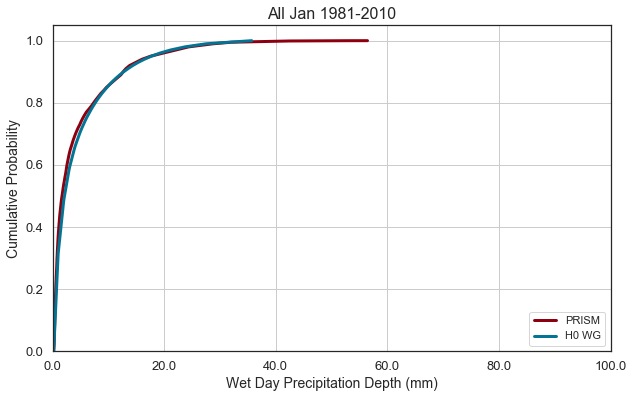

In [507]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRJanDF['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0JanDF['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("All Jan 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

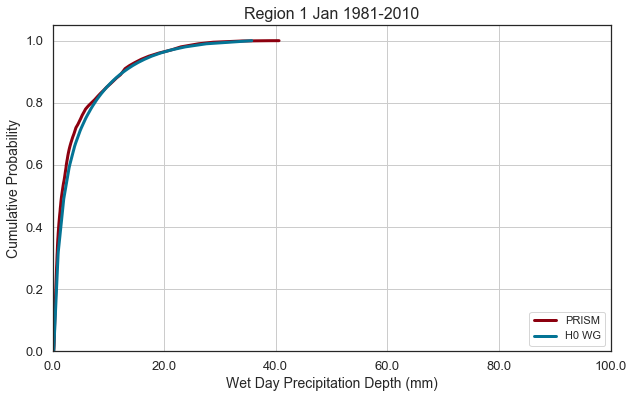

In [508]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrJan1['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Jan1['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 1 Jan 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

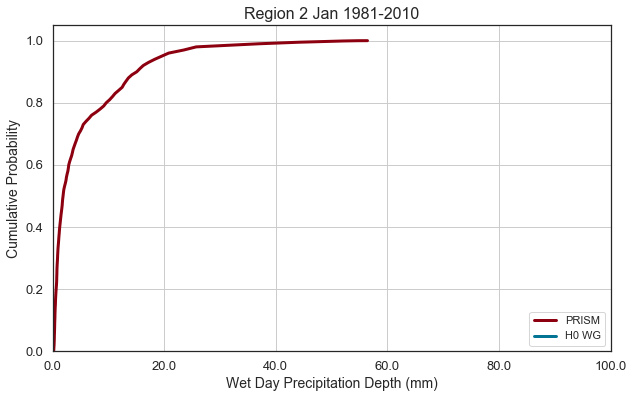

In [509]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrJan2['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Jan2['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 2 Jan 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

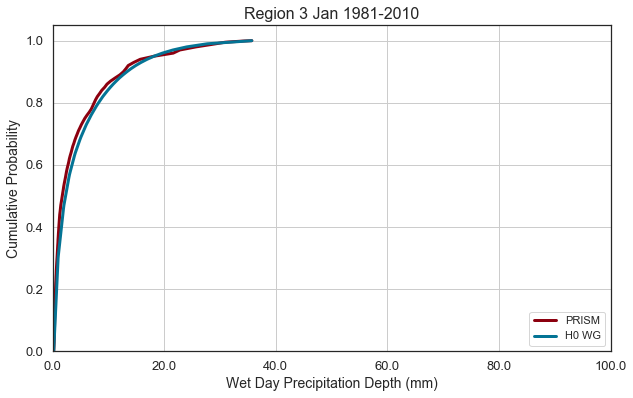

In [510]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrJan3['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Jan3['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 3 Jan 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

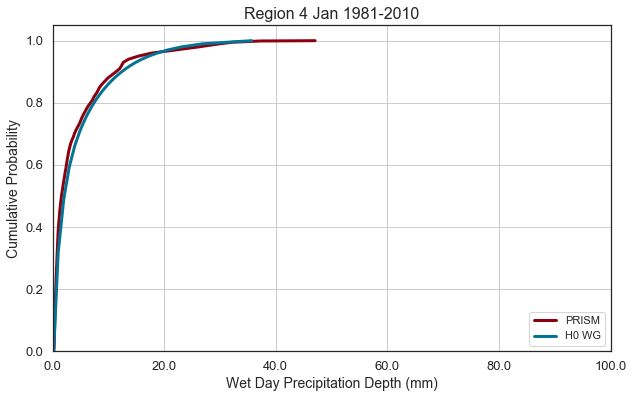

In [511]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrJan4['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Jan4['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 4 Jan 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

### Feb

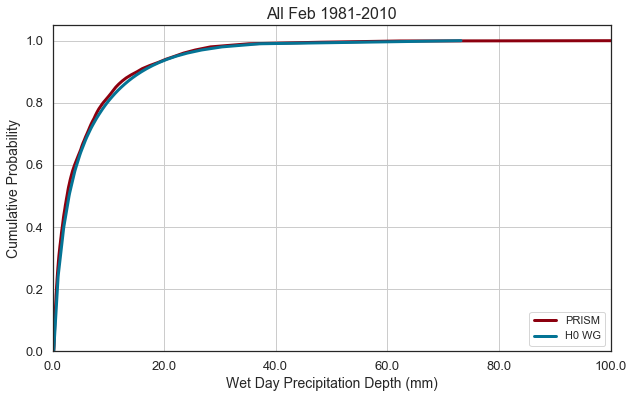

In [512]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRFebDF['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0FebDF['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("All Feb 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

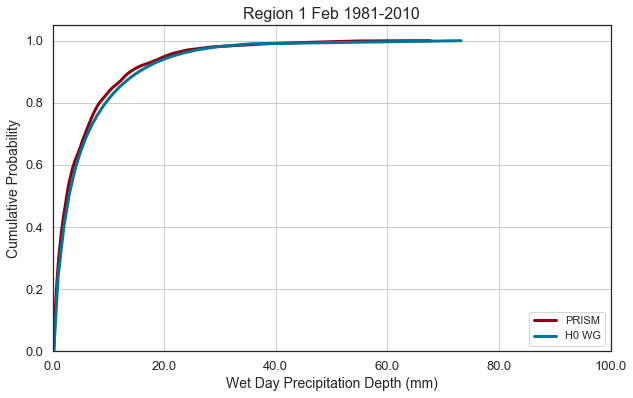

In [513]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrFeb1['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Feb1['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 1 Feb 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

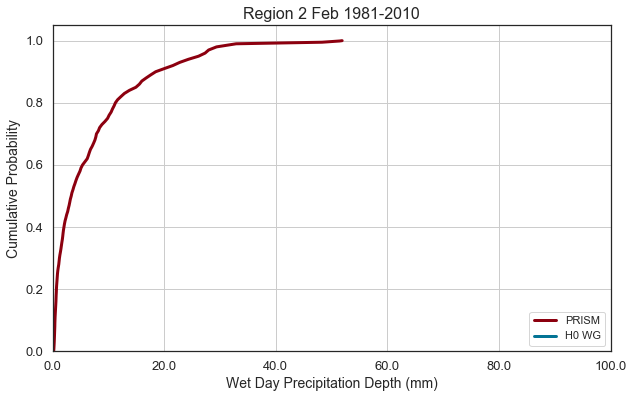

In [514]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrFeb2['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Feb2['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 2 Feb 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

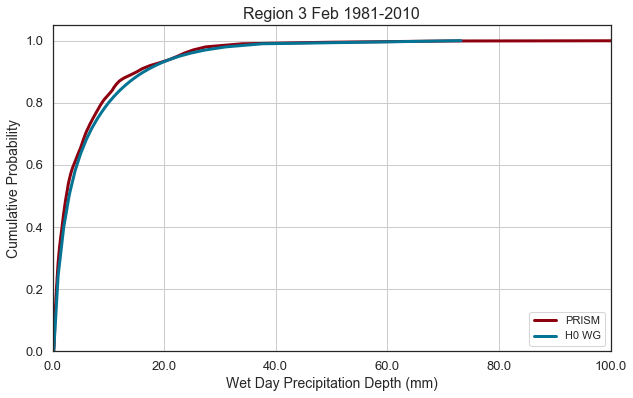

In [515]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrFeb3['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Feb3['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 3 Feb 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

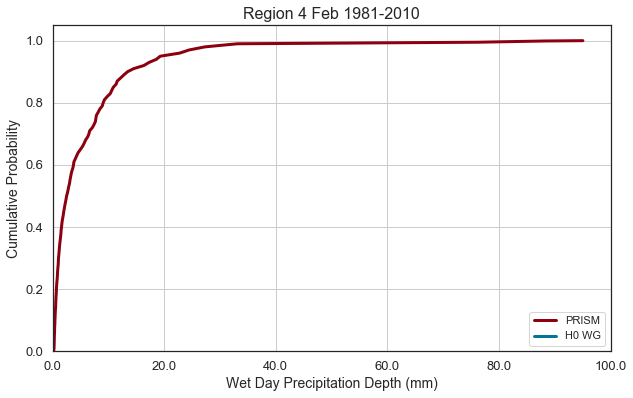

In [516]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrFeb4['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Feb4['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 4 Feb 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

### Mar

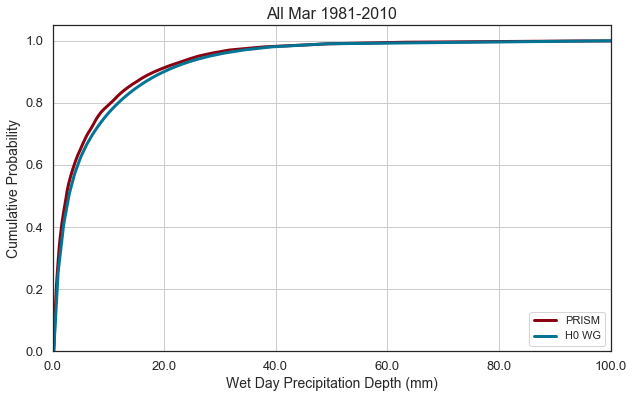

In [517]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRMarDF['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0MarDF['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("All Mar 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

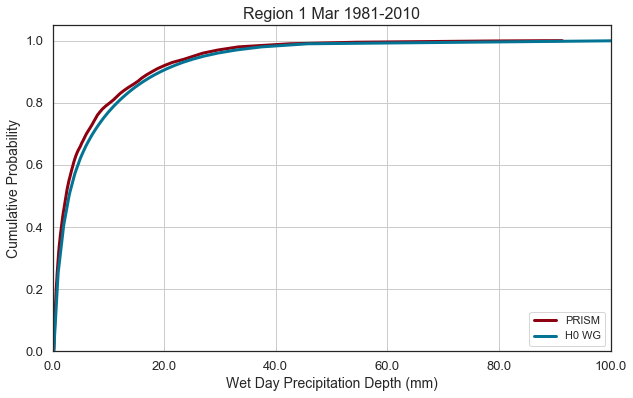

In [518]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrMar1['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Mar1['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 1 Mar 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

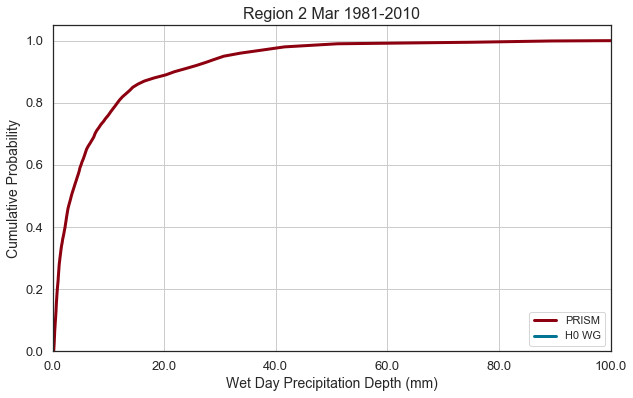

In [519]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrMar2['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Mar2['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 2 Mar 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

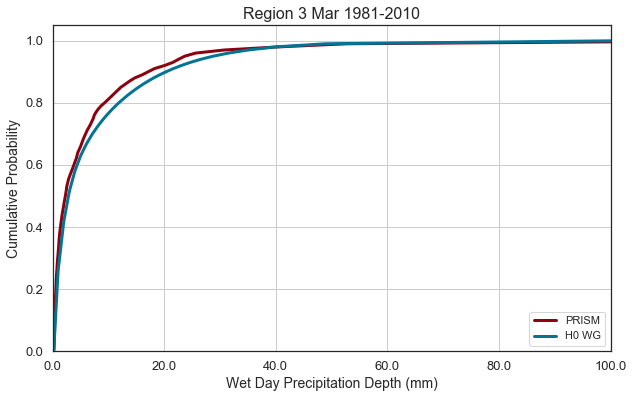

In [520]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrMar3['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Mar3['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 3 Mar 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

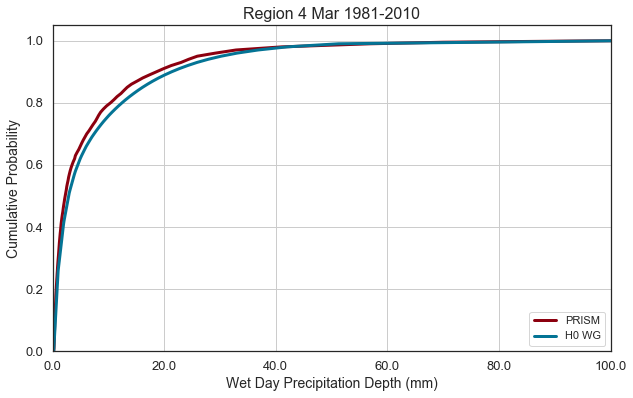

In [521]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrMar4['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Mar4['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 4 Mar 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

### Apr

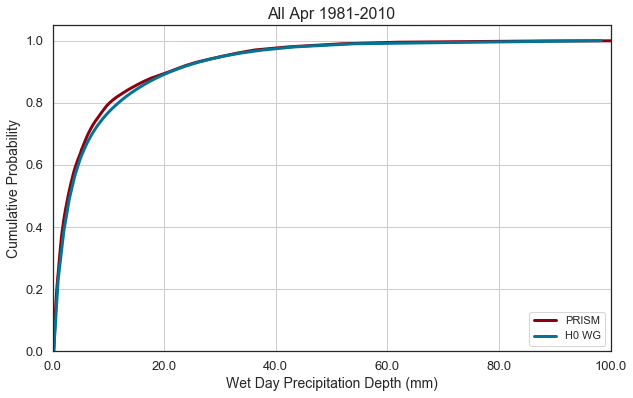

In [522]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRAprDF['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0AprDF['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("All Apr 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

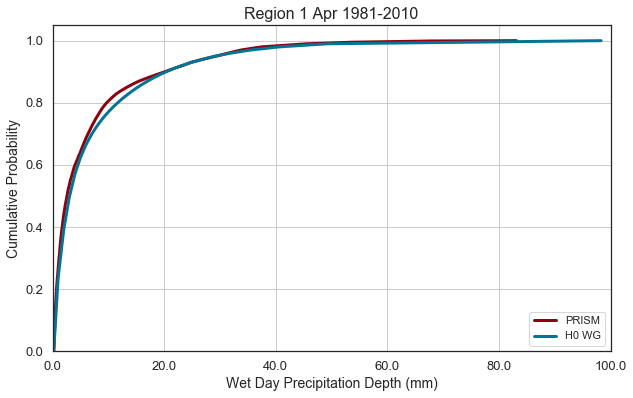

In [523]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrApr1['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Apr1['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 1 Apr 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

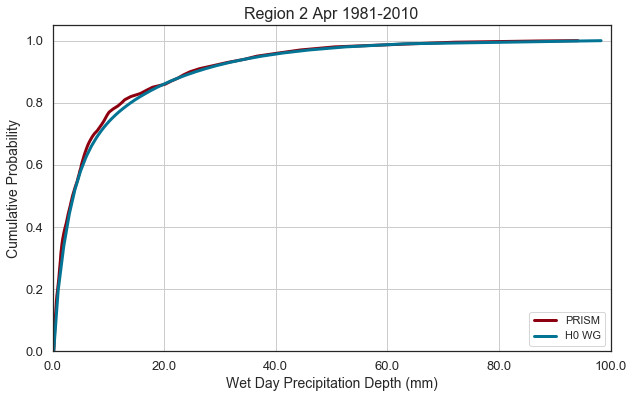

In [524]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrApr2['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Apr2['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 2 Apr 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

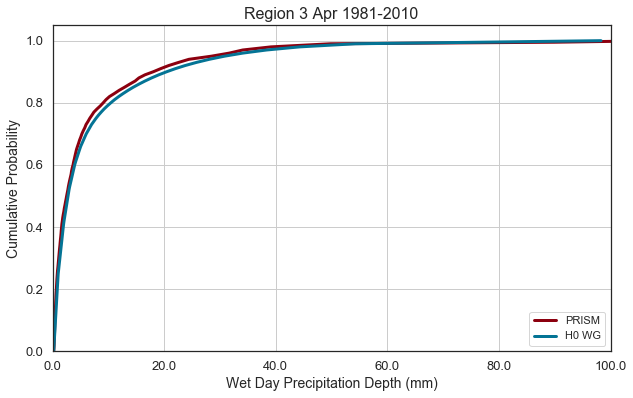

In [525]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrApr3['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Apr3['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 3 Apr 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

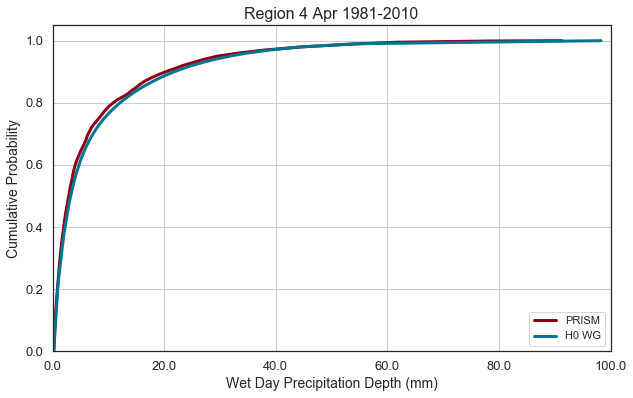

In [526]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrApr4['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Apr4['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 4 Apr 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

### May

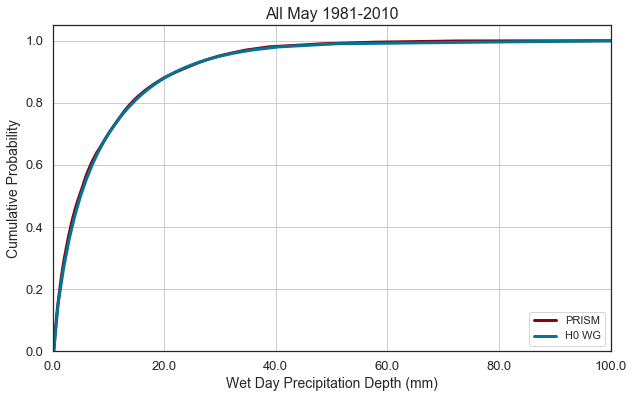

In [527]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRMayDF['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0MayDF['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("All May 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

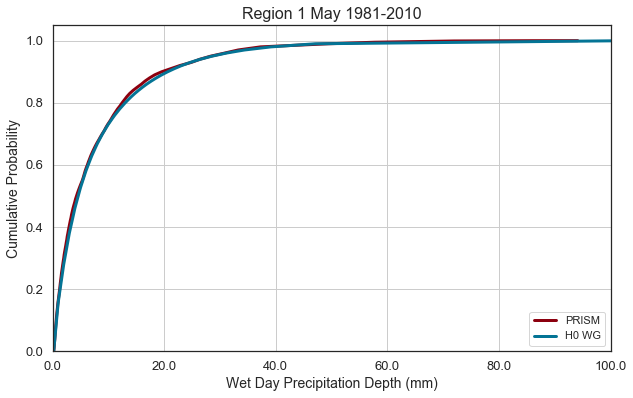

In [528]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrMay1['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0May1['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 1 May 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

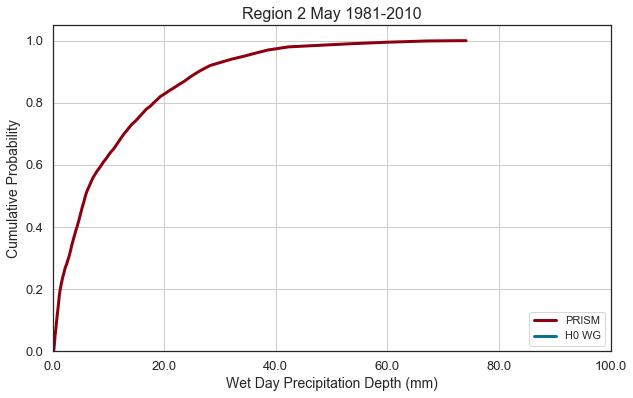

In [529]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrMay2['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0May2['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 2 May 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

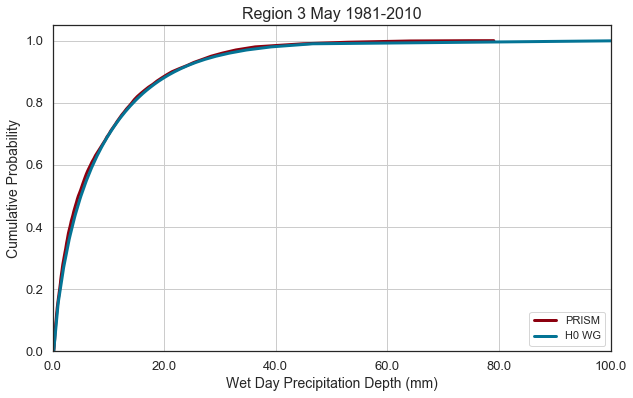

In [530]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrMay3['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0May3['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 3 May 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

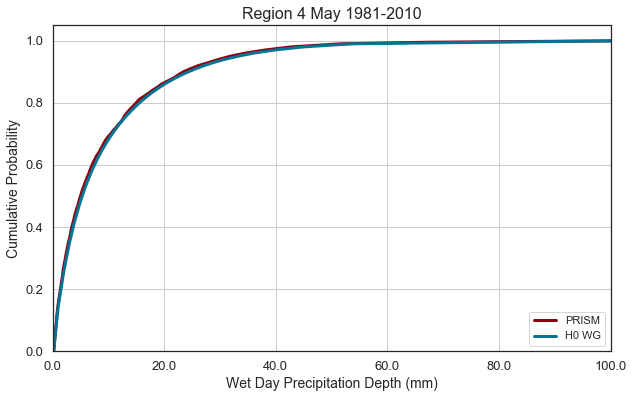

In [531]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrMay4['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0May4['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 4 May 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

### Jun

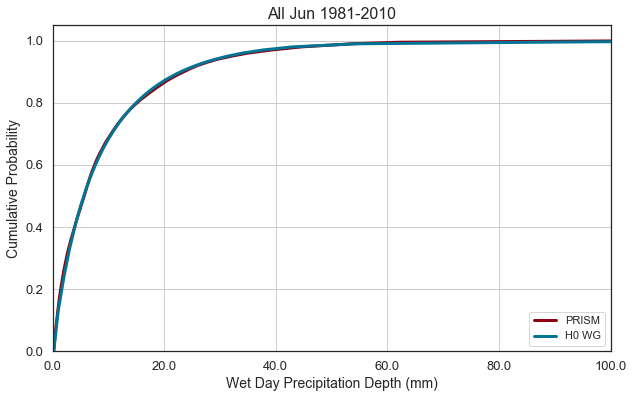

In [532]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRJunDF['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0JunDF['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("All Jun 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

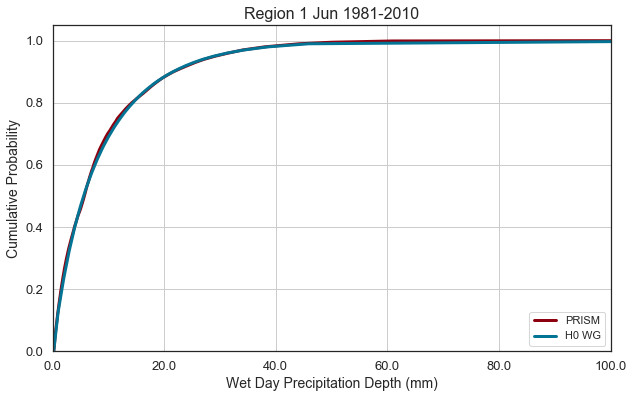

In [533]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrJun1['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Jun1['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 1 Jun 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

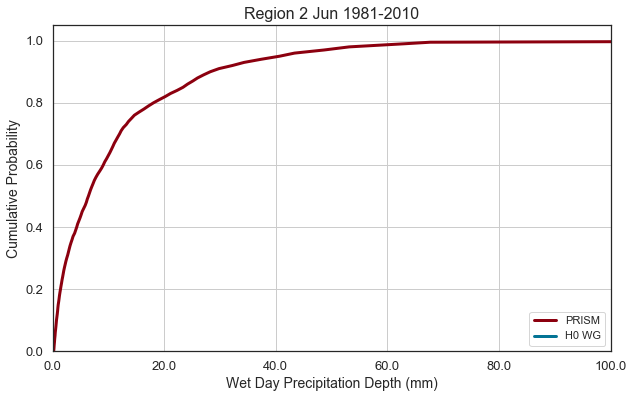

In [534]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrJun2['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Jun2['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 2 Jun 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

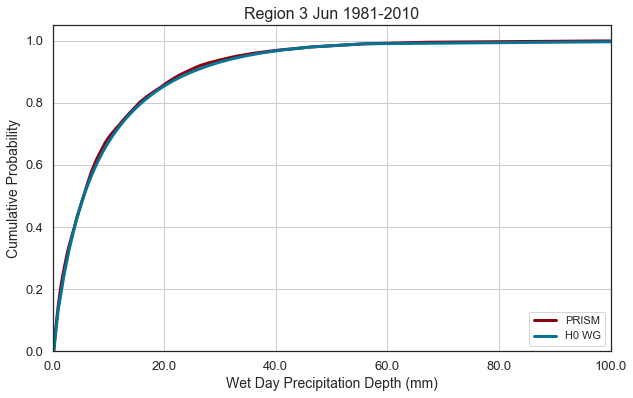

In [535]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrJun3['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Jun3['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 3 Jun 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

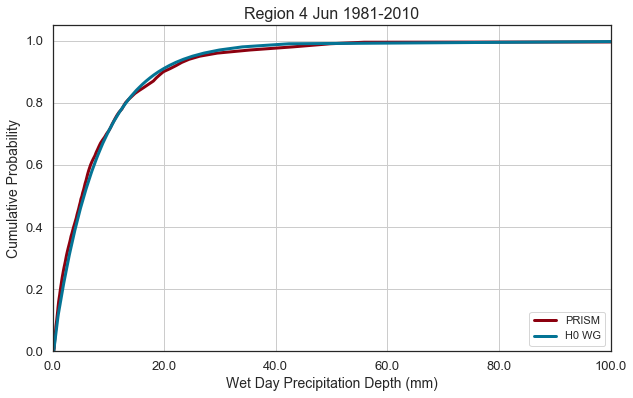

In [536]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrJun4['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Jun4['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 4 Jun 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

### Jul

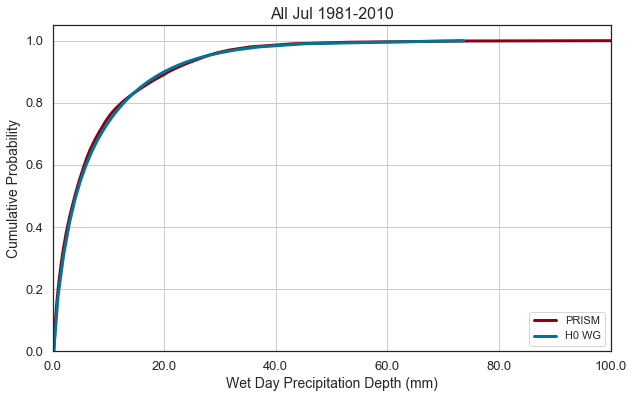

In [537]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRJulDF['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0JulDF['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("All Jul 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

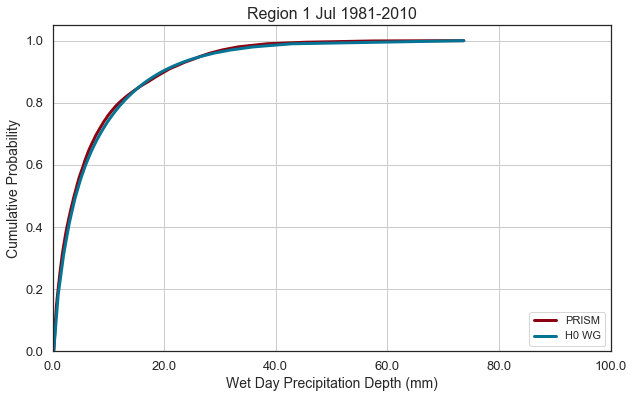

In [538]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrJul1['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Jul1['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 1 Jul 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

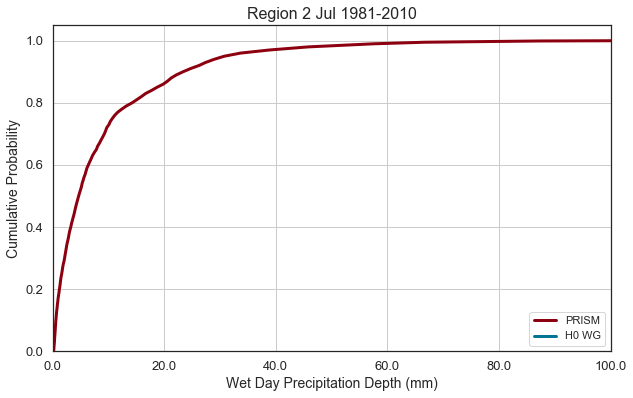

In [539]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrJul2['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Jul2['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 2 Jul 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

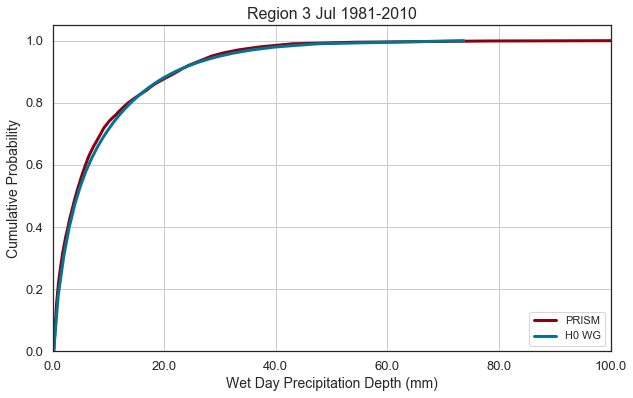

In [540]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrJul3['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Jul3['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 3 Jul 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

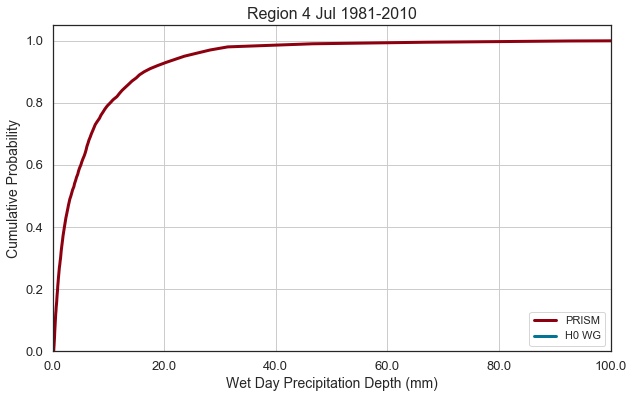

In [541]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrJul4['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Jul4['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 4 Jul 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

### Aug

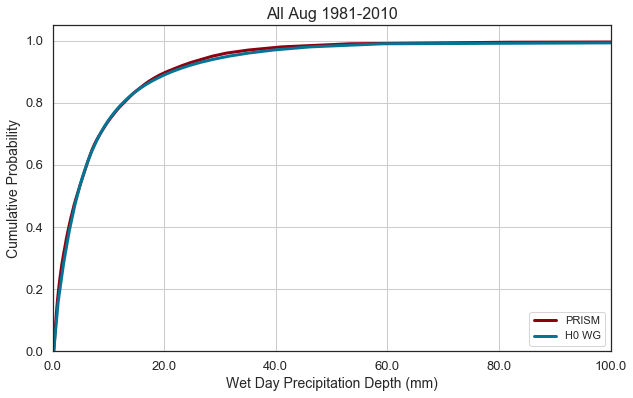

In [542]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRAugDF['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0AugDF['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("All Aug 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

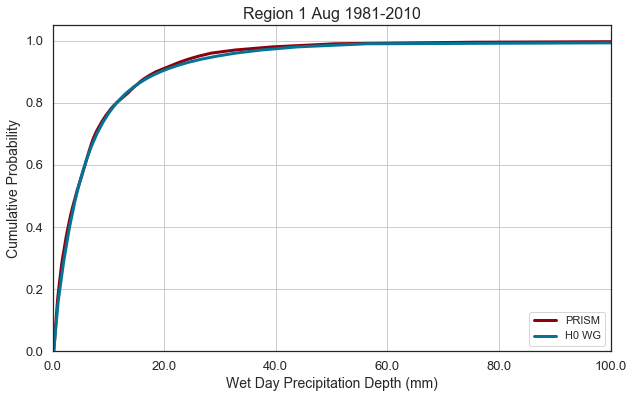

In [543]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrAug1['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Aug1['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 1 Aug 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

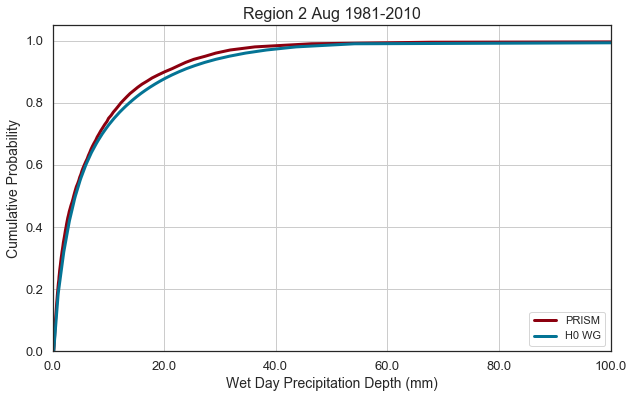

In [544]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrAug2['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Aug2['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 2 Aug 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

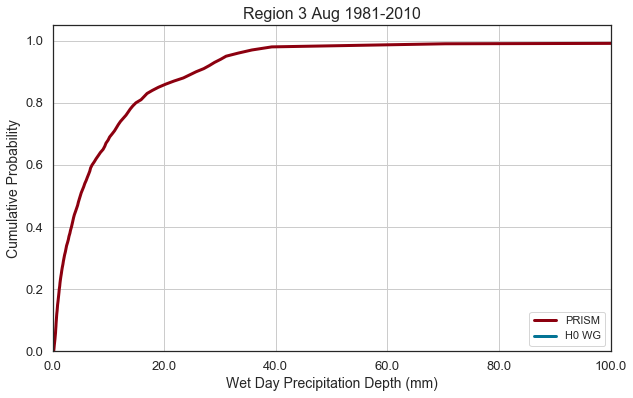

In [545]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrAug3['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Aug3['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 3 Aug 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

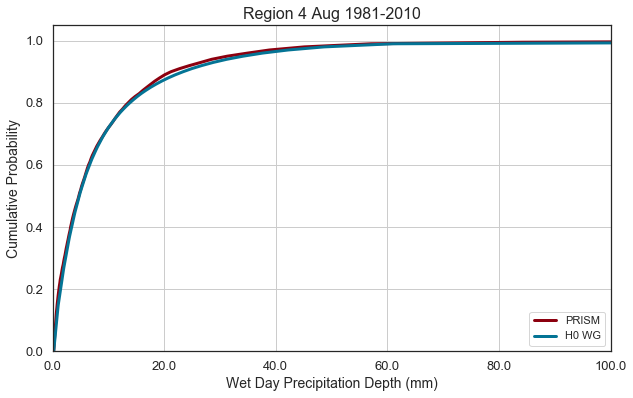

In [546]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrAug4['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Aug4['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 4 Aug 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

### Sep

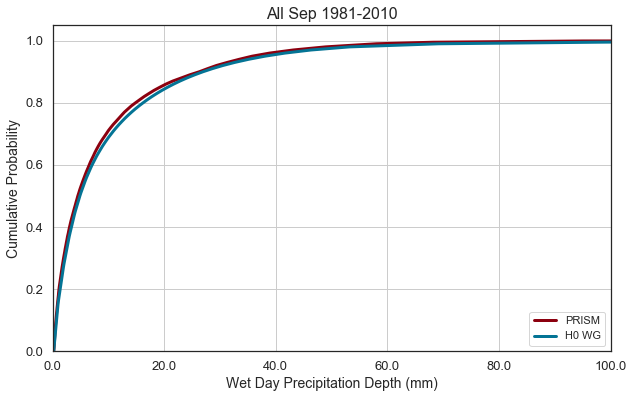

In [547]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRSepDF['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0SepDF['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("All Sep 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

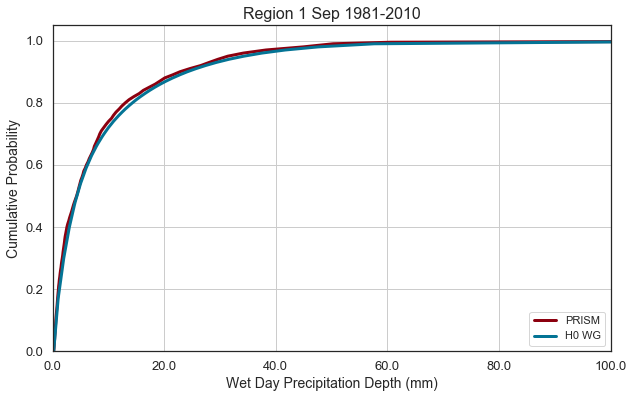

In [548]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrSep1['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Sep1['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 1 Sep 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

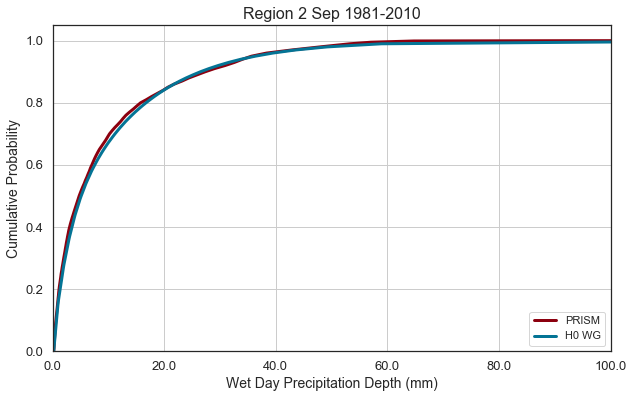

In [549]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrSep2['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Sep2['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 2 Sep 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

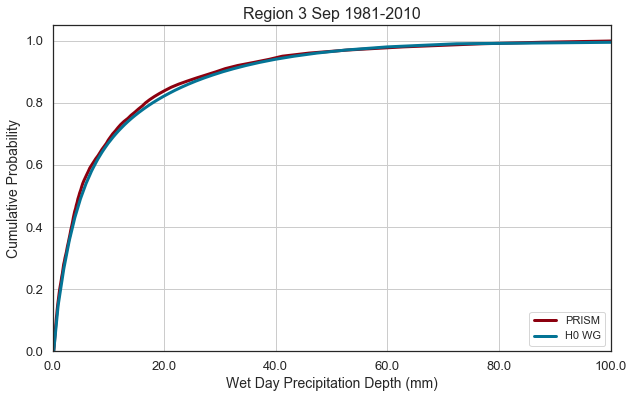

In [550]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrSep3['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Sep3['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 3 Sep 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

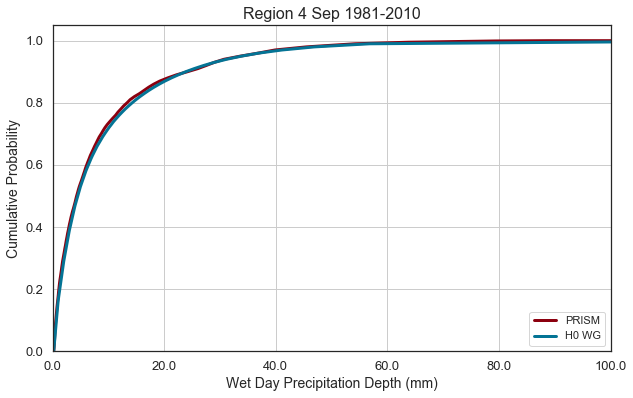

In [551]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrSep4['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Sep4['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 4 Sep 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

### Oct

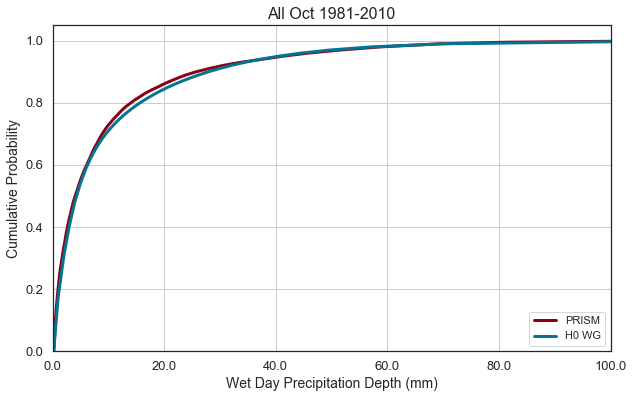

In [552]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PROctDF['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0OctDF['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("All Oct 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

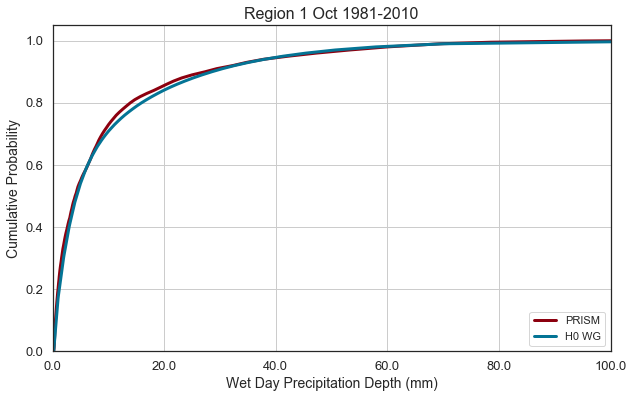

In [553]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrOct1['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Oct1['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 1 Oct 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

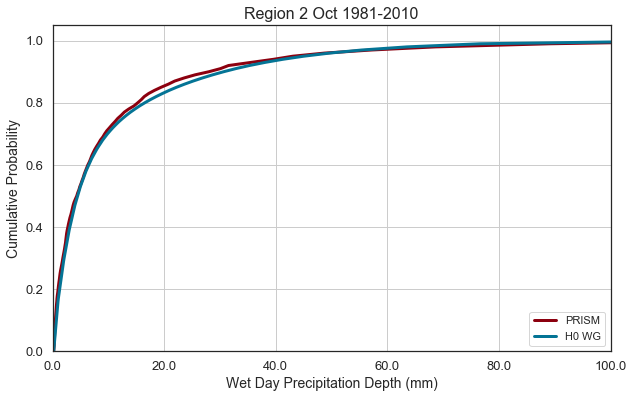

In [554]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrOct2['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Oct2['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 2 Oct 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

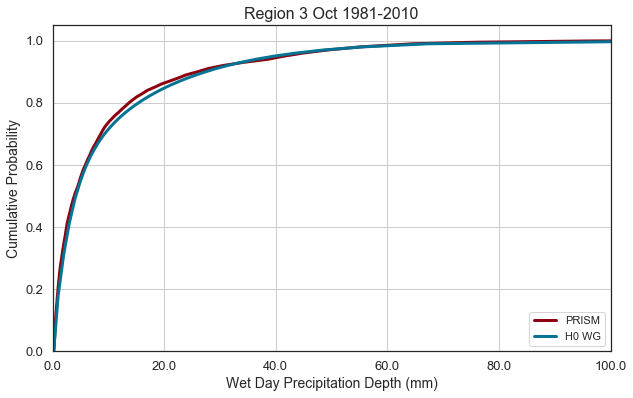

In [555]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrOct3['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Oct3['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 3 Oct 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

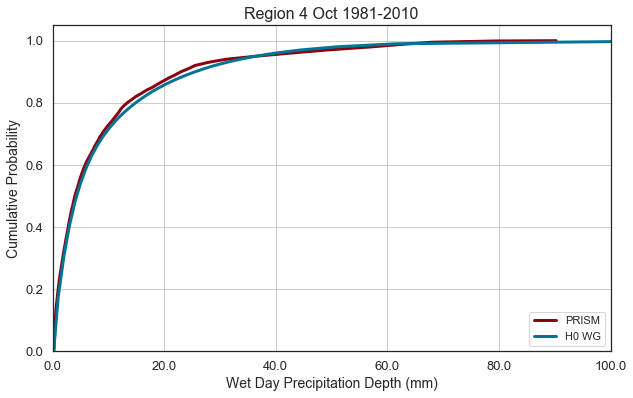

In [556]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrOct4['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Oct4['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 4 Oct 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

### Nov

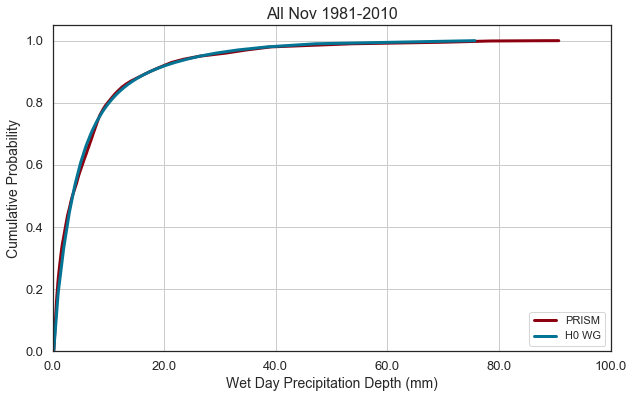

In [557]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRNovDF['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0NovDF['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("All Nov 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

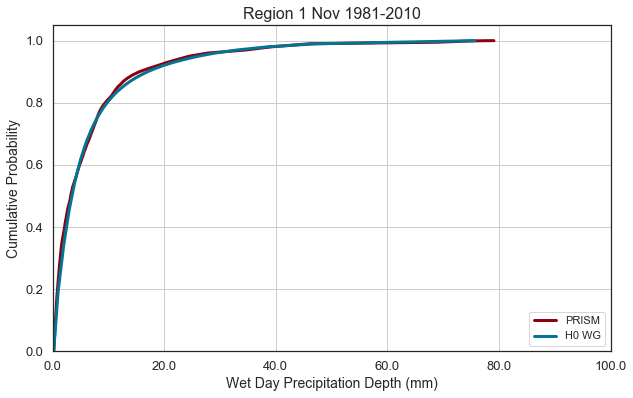

In [558]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrNov1['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Nov1['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 1 Nov 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

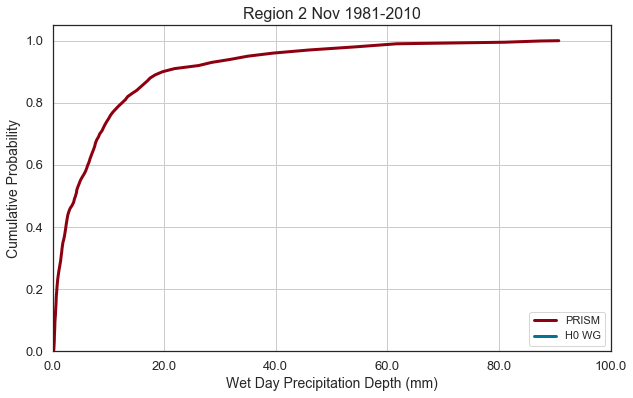

In [559]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrNov2['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Nov2['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 2 Nov 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

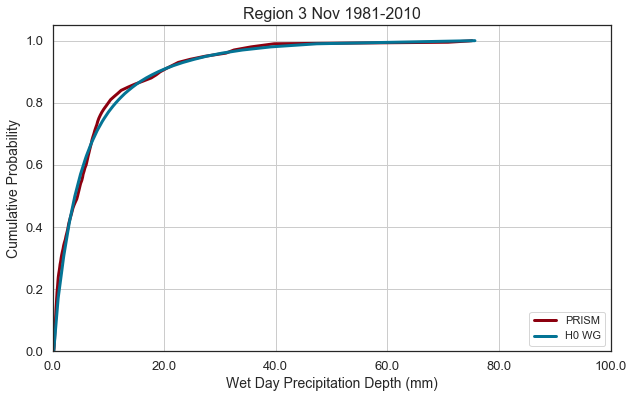

In [560]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrNov3['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Nov3['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 3 Nov 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

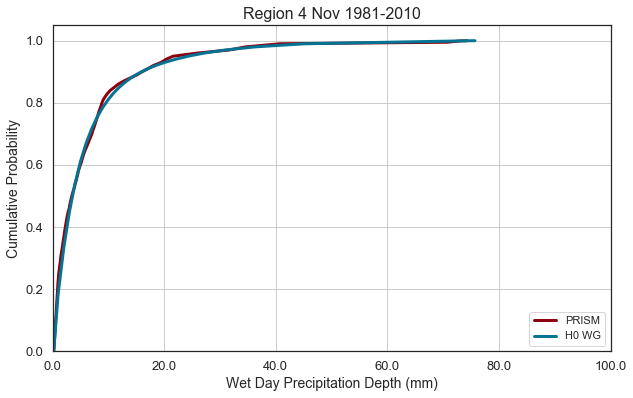

In [561]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrNov4['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Nov4['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 4 Nov 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

### Dec

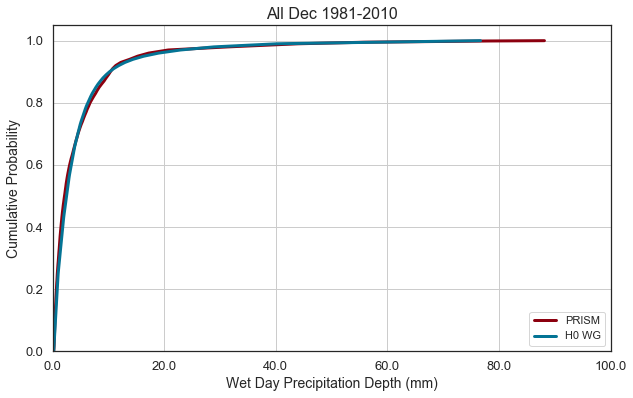

In [562]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRDecDF['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0DecDF['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("All Dec 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

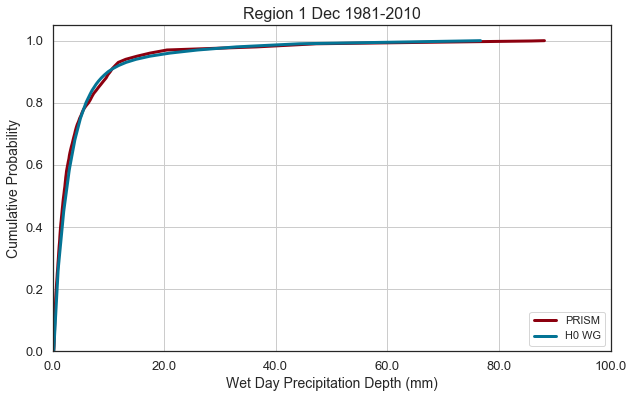

In [563]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrDec1['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Dec1['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 1 Dec 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

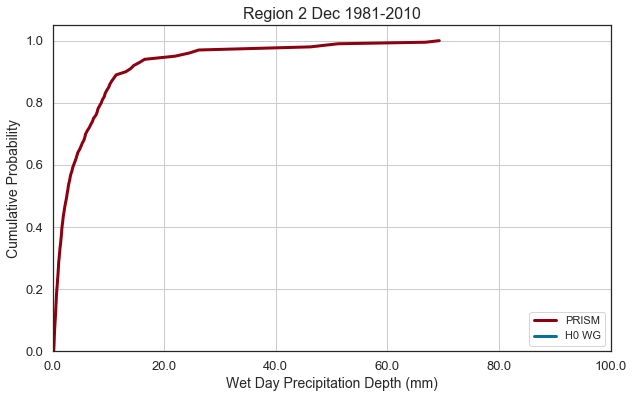

In [564]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrDec2['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Dec2['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 2 Dec 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

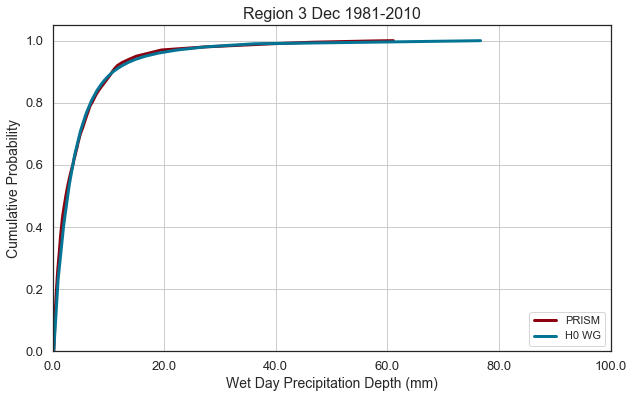

In [565]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrDec3['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Dec3['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 3 Dec 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

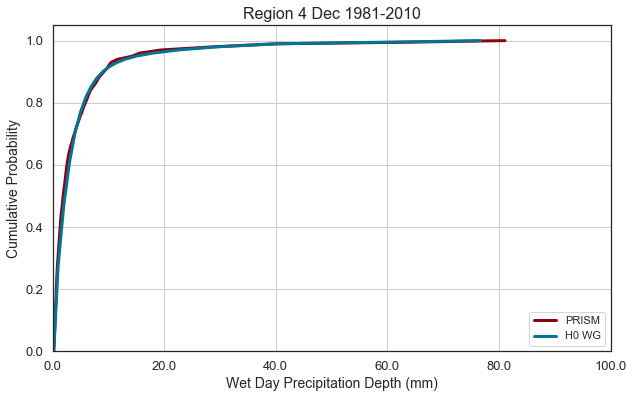

In [566]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PrDec4['Precip_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:crimson', label='PRISM')
ax11.plot( H0Dec4['PDepth_mm'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:sea blue', label='H0 WG')
ax11.set_xlim( (0.0, 100.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("Region 4 Dec 1981-2010", fontsize=16)
ax11.set_xlabel('Wet Day Precipitation Depth (mm)', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )